In [93]:
library(leaps)
library(glmnet)
library(reshape2)
library(ggplot2)
library(corrplot)
library(grDevices)

## IMPORTATION DES DONNEES

In [44]:
data_tot = read.csv('./Donnees/Plusieurs_pays/Total.csv', header = TRUE)
data_tot = data_tot[-c(47,60)]

Création d'un nouveau dataframe sans les variables `Rating` et `Pays`, utilisé après. on enlève aussi toutes les variables liées aux buts, aux assists et aux key passes.

In [45]:
data = data_tot[,-c(81,82,83,84)]
data_but = data_tot[,-c(34:46,55:60,72:84)]

Création de dataFrames qui contiendront les différentes variables influentes

In [54]:
nb.variables = length(data_but[1,])
#df.variables.rating = data.frame("Noms" = colnames(data), "BIC" = rep(0,nb.variables), "Lasso" = rep(0,nb.variables), 
                          #"ElasticNet" = rep(0,nb.variables))#, "NombreDeButs" = rep(0,nb.variables), 
                                 #"NombreDePoints" = rep(0,nb.variables))

df.variables.buts = data.frame("Noms" = colnames(data_but), "BIC" = rep(0,nb.variables), "Lasso" = rep(0,nb.variables), 
                          "ElasticNet" = rep(0,nb.variables), "NombreDeButs" = rep(0,nb.variables), 
                                 "NombreDePoints" = rep(0,nb.variables))

In [55]:
df.variables.pays = data.frame("Noms" = colnames(data_but), "France" = rep(0,nb.variables), "Espagne" = rep(0,nb.variables), 
                          "Italie" = rep(0,nb.variables), "Argentine" = rep(0,nb.variables), 
                                 "Angleterre" = rep(0,nb.variables), "Allemagne" = rep(0,nb.variables))

## Sélection de variables

### BIC

In [56]:
choixb <- regsubsets(data_tot$Points~., data=data_but,nbest=1, nvmax=10, method="seqrep")
#choixb_buts <- regsubsets(data_tot$Rating~., data=data_but,nbest=1, nvmax=10, method="seqrep")

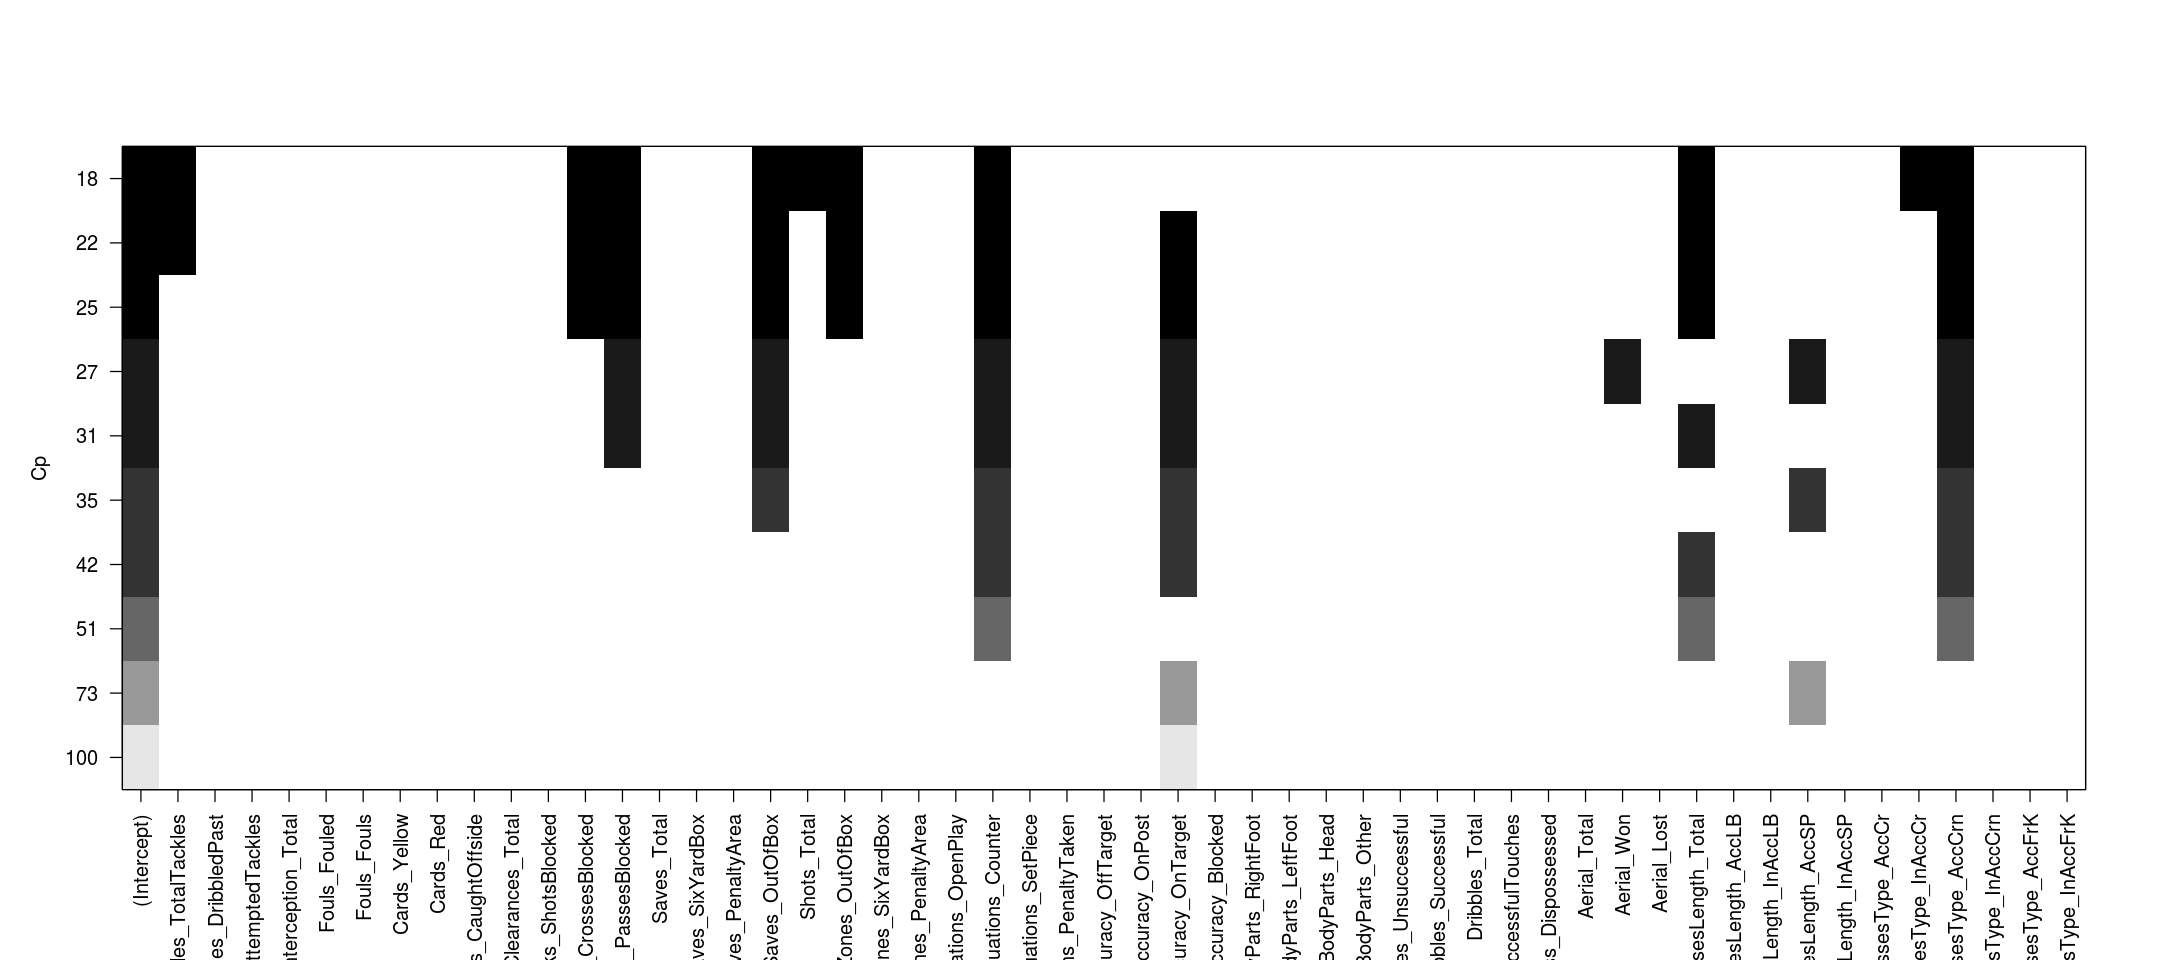

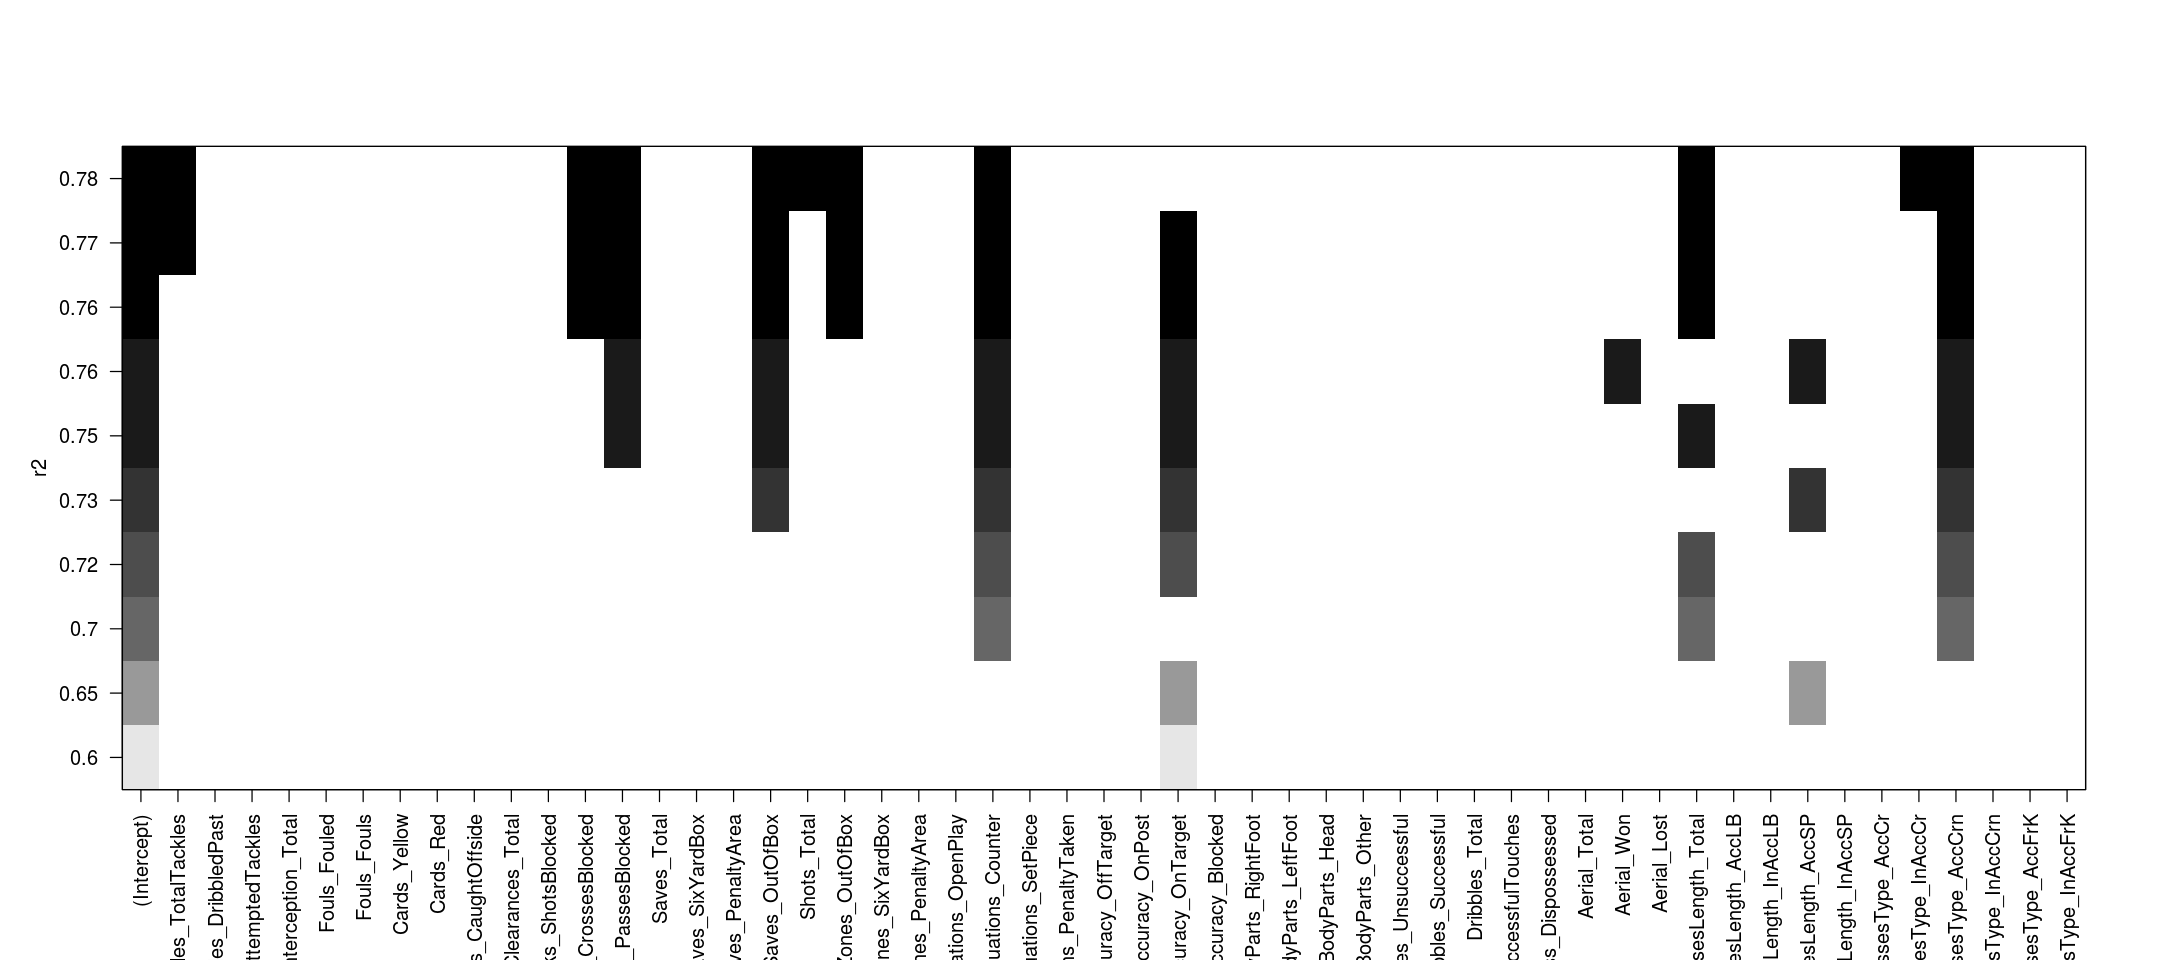

In [57]:
options(repr.plot.width=18, repr.plot.height=8)
plot(choixb,scale="Cp")
plot(choixb,scale="r2")

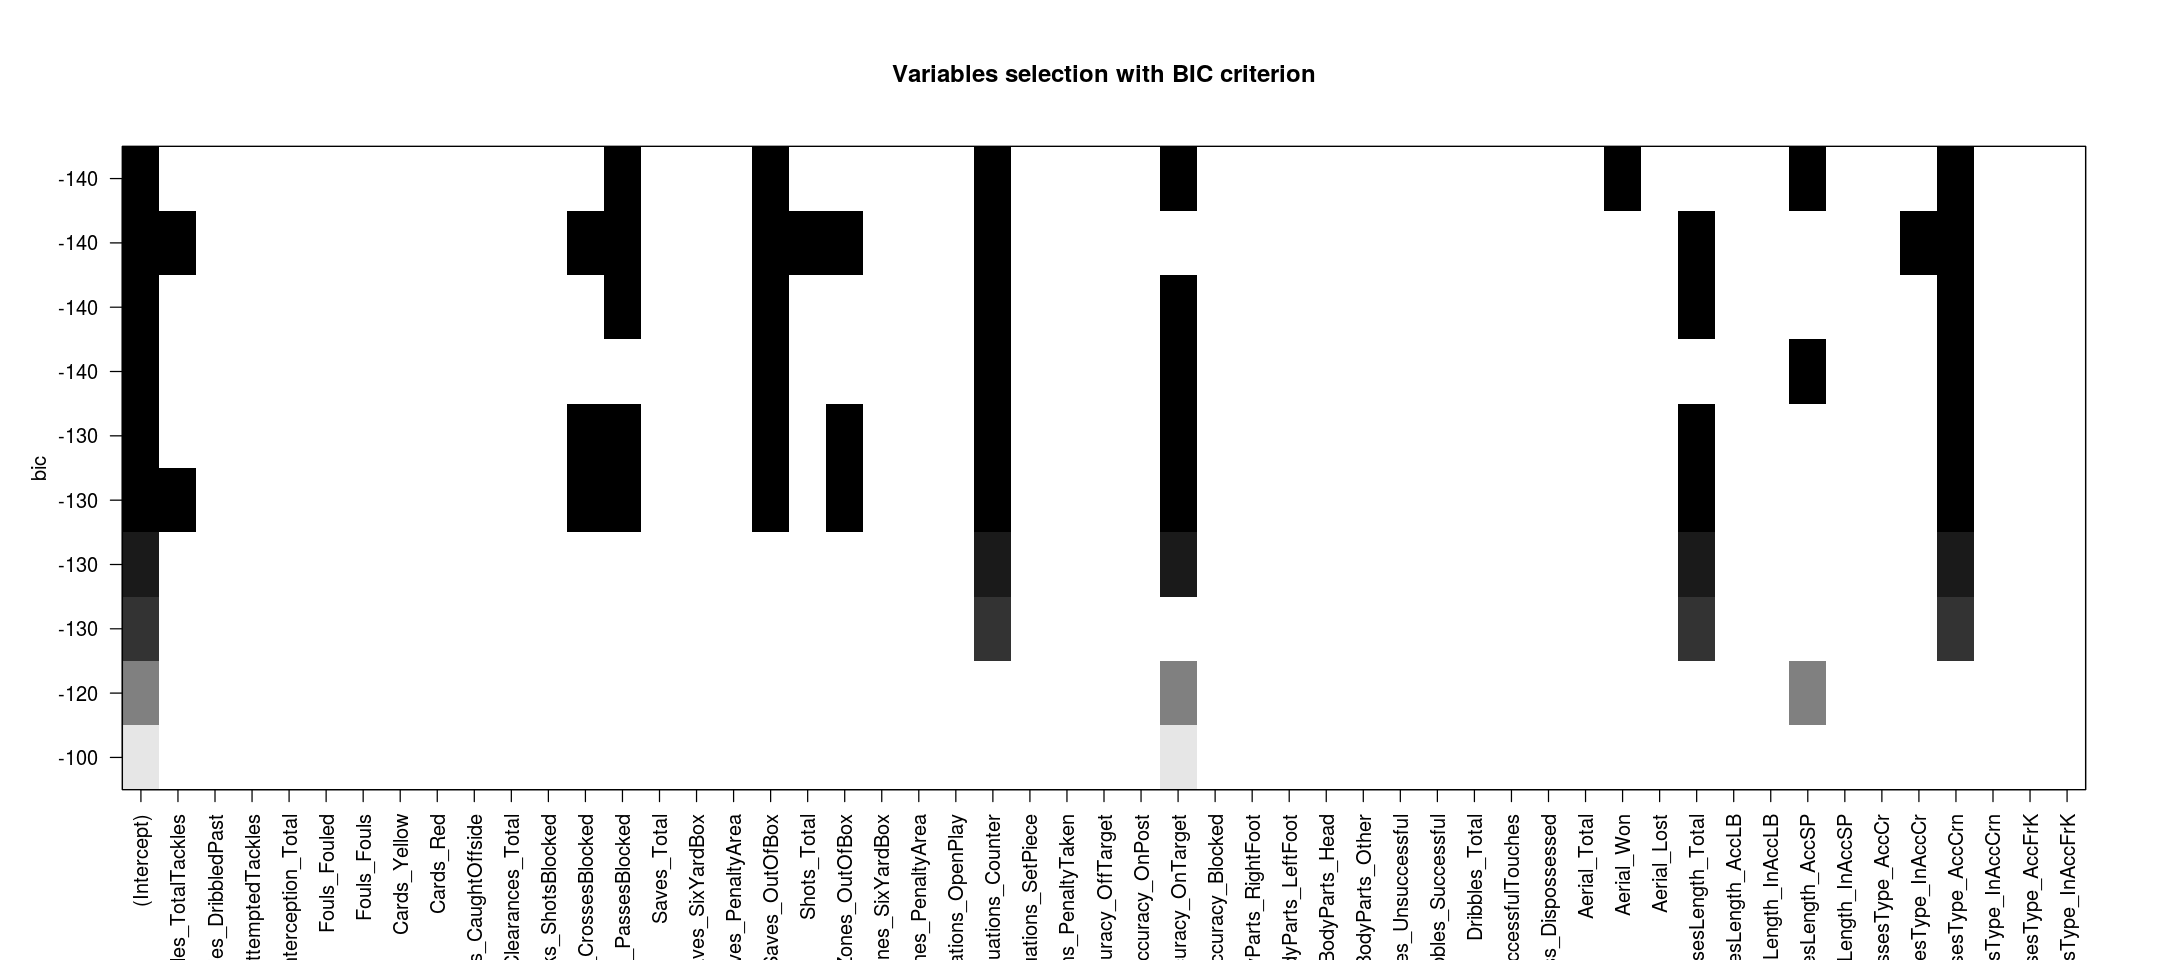

In [58]:
plot(choixb,scale="bic", main = "Variables selection with BIC criterion")

Les trois différents critères utilisés ci-dessus pour la sélection de modèle (Cp de Mallows, R2 et BIC) semblent donner les mêmes résultats.  
Suivant le critère choisi, il faut soit le maximiser (R2), soit le minimiser (Cp et BIC). Dans les deux cas, il s'agit de trouver les variables mises en noir sur la ligne du haut.

In [145]:
nb_min = which.min(summary(choixb)$bic)
vect = round(coef(choixb, nb_min),3)
vect

(Intercept)    Blocks_PassesBlocked          Saves_OutOfBox 
                 -6.593                  -2.335                  -8.581 
shotsSituations_Counter  ShotsAccuracy_OnTarget              Aerial_Won 
                 20.218                   6.277                   0.777 
     PassesLength_AccSP       PassesType_AccCrn 
                  0.062                   6.413

In [61]:
for (i in 1:nb.variables){
    for (j in 1:(length(names(vect))-1)){
        if (choixb$xnames[i+1] == names(vect)[j+1]){
            df.variables.rating$BIC[i] = round(vect[j+1],3)
        }
    } 
}

In [164]:
#variables = matrix(, nrow = nrow(data_but), ncol = length(vect)+1)
data_bic = data_tot$Points
noms = "Points"
for (i in 1:(length(vect)-1)){
    text = names(vect)[i+1]
    data_bic = cbind(data_bic,data_but[text])
    noms = c(noms, text)
}

In [165]:
names(data_bic)[1] = "Points"

In [166]:
data_bic

Points Blocks_PassesBlocked Saves_OutOfBox
Paris Saint-Germain   91     6.4                  1.2           
Lyon                  75     7.1                  1.2           
Lille                 72     7.1                  0.9           
Montpellier           66     8.1                  1.2           
Saint-Etienne         61     6.9                  1.1           
Marseille             59     6.5                  0.9           
Nice                  56     8.0                  1.2           
Nimes                 55     6.8                  1.1           
Rennes                53     7.5                  1.1           
Strasbourg            52     6.5                  1.1           
Reims                 49     6.6                  1.4           
Nantes                48     7.3                  0.8           
Angers                46     7.7                  0.9           
Bordeaux              41     7.4                  1.2           
Toulouse              38     8.1                  1.3           
Monaco                38     6.5                  0.9           
Dijon                 36     7.8                  1.3           
Caen                  34     6.9                  1.4           
Amiens                33     6.5                  1.2           
Guingamp              27     8.0                  1.3           
Juventus              90     6.7                  0.9           
Napoli                79     6.4                  1.0           
Atalanta              69     8.8                  0.8           
Roma                  69     6.2                  1.3           
Torino                68     9.2                  0.9           
AC Milan              66     7.9                  1.0           
Inter                 63     7.5                  0.9           
Lazio                 59     7.3                  1.1           
Sampdoria             53     7.8                  1.0           
Fiorentina            44     7.1                  1.3           
⋮                     ⋮      ⋮                    ⋮             
Cardiff               36      9.0                 1.1           
Brighton              34      6.4                 1.2           
Fulham                26      7.4                 1.0           
Huddersfield          16      9.6                 0.9           
Boca Juniors          57      8.0                 1.9           
Racing Club           53      9.6                 1.0           
River Plate           51      9.1                 1.0           
Defensa y Justicia    45      8.2                 0.9           
Atletico Tucuman      42      9.3                 1.3           
Newells Old Boys      40      9.2                 1.5           
Velez Sarsfield       38      9.7                 0.9           
Talleres              36     10.0                 1.0           
Union                 36     10.1                 1.0           
Tigre                 35      8.1                 1.5           
Independiente         34      8.0                 1.6           
Aldosivi              33      8.7                 0.9           
Lanus                 33      8.1                 1.1           
Huracan               32      8.7                 1.3           
Banfield              29      8.8                 1.1           
Belgrano              29      8.6                 1.4           
San Lorenzo           29      8.6                 1.1           
Estudiantes           29      9.4                 1.2           
Patronato de Parana   26      9.5                 1.1           
San Martin San Juan   26      9.4                 1.1           
Godoy Cruz            25      9.4                 0.6           
San Martin de Tucuman 24      7.5                 1.2           
Rosario Central       23      9.0                 1.2           
Colon                 23      8.6                 0.9           
Argentinos Juniors    23      9.0                 1.0           
Gimnasia LP           22      9.4                 1.4    

In [169]:
reg_bic = lm(Points~(.)^2, data = data_bic)

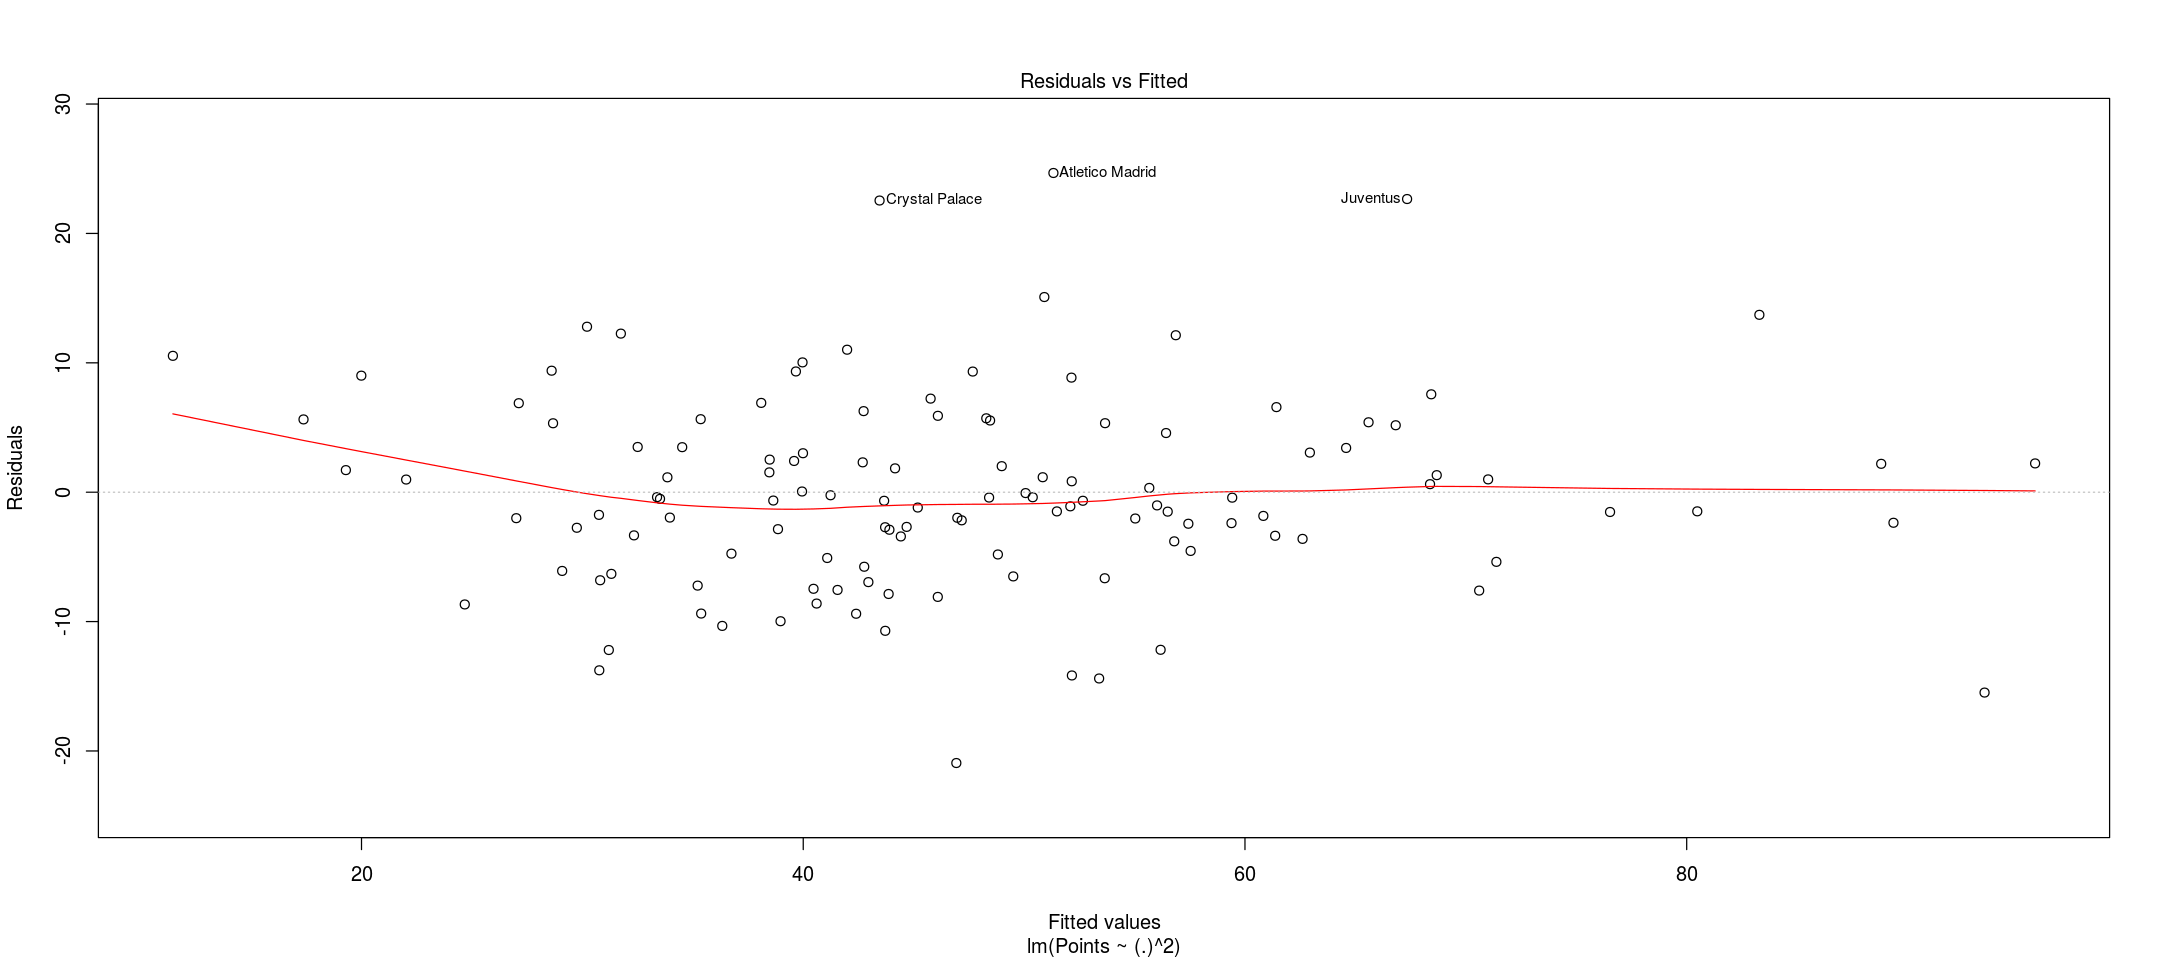

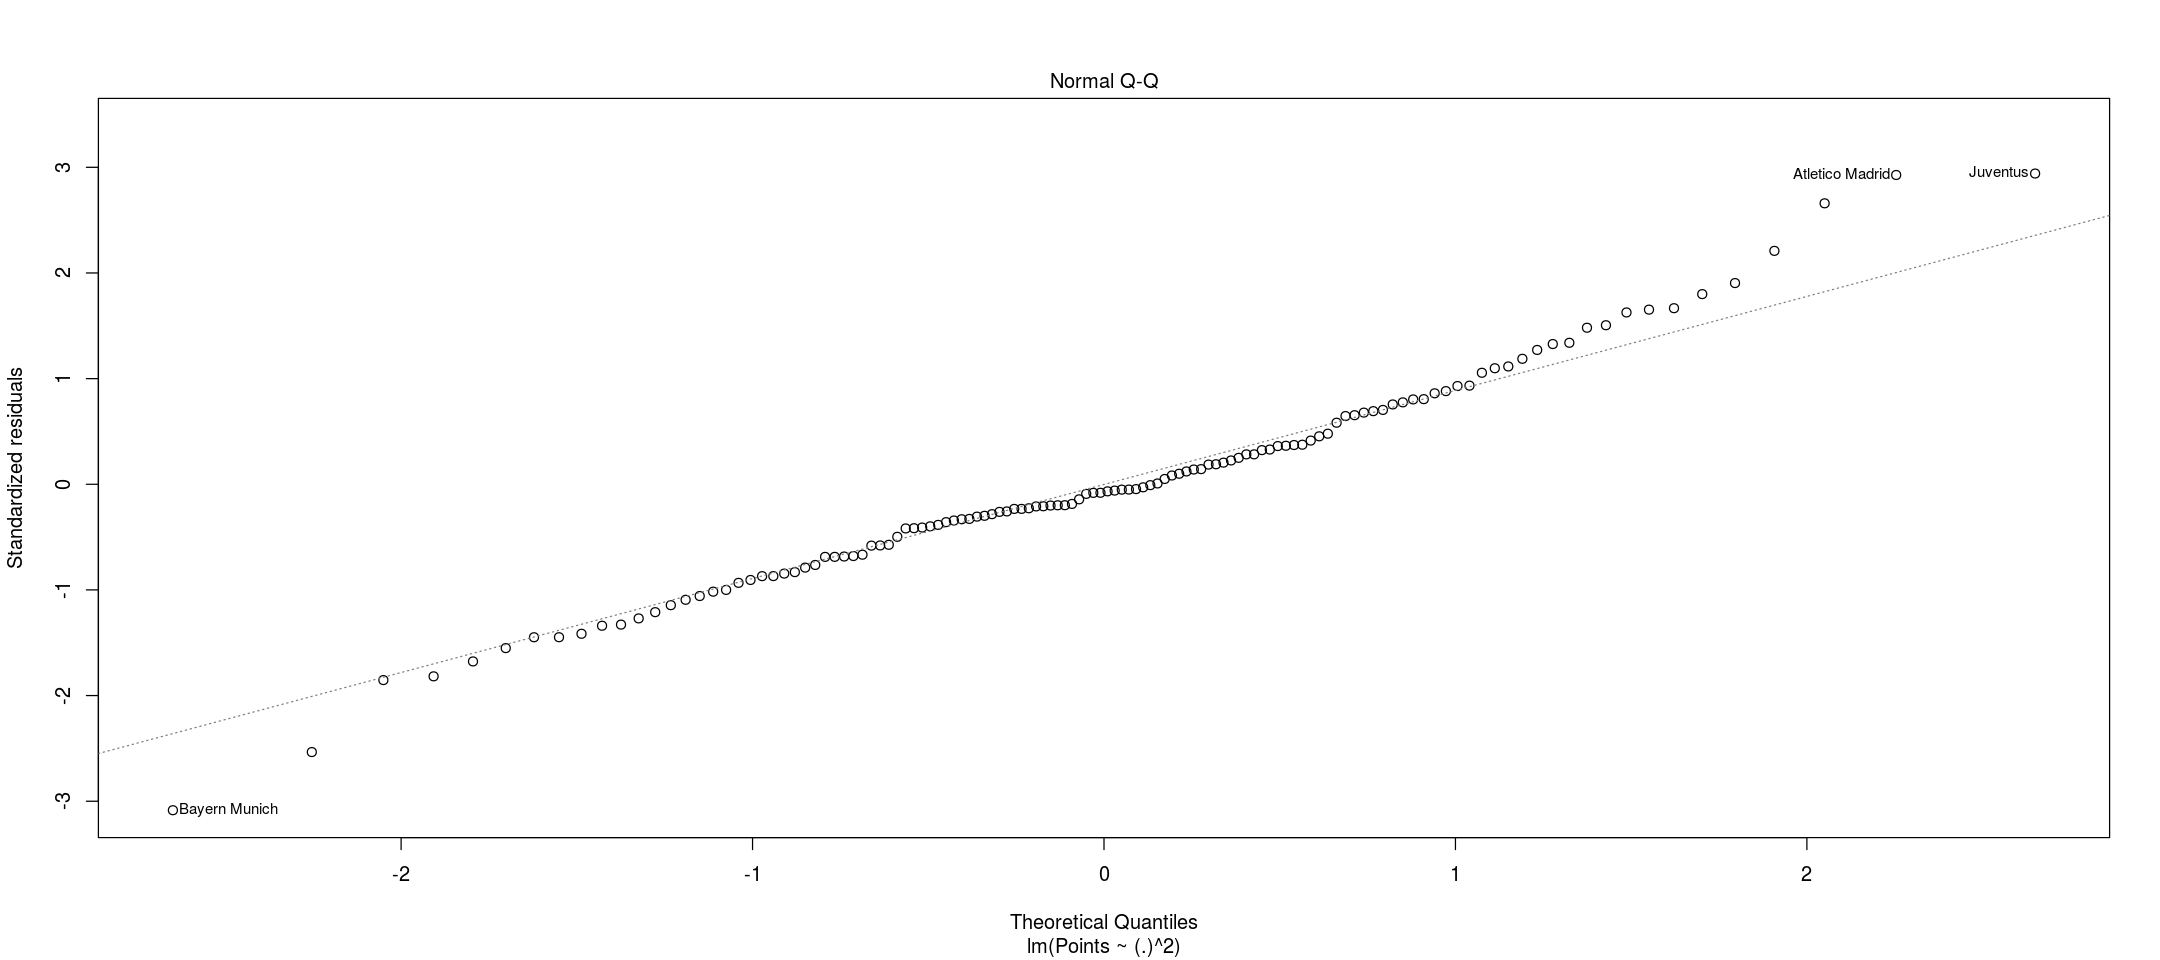

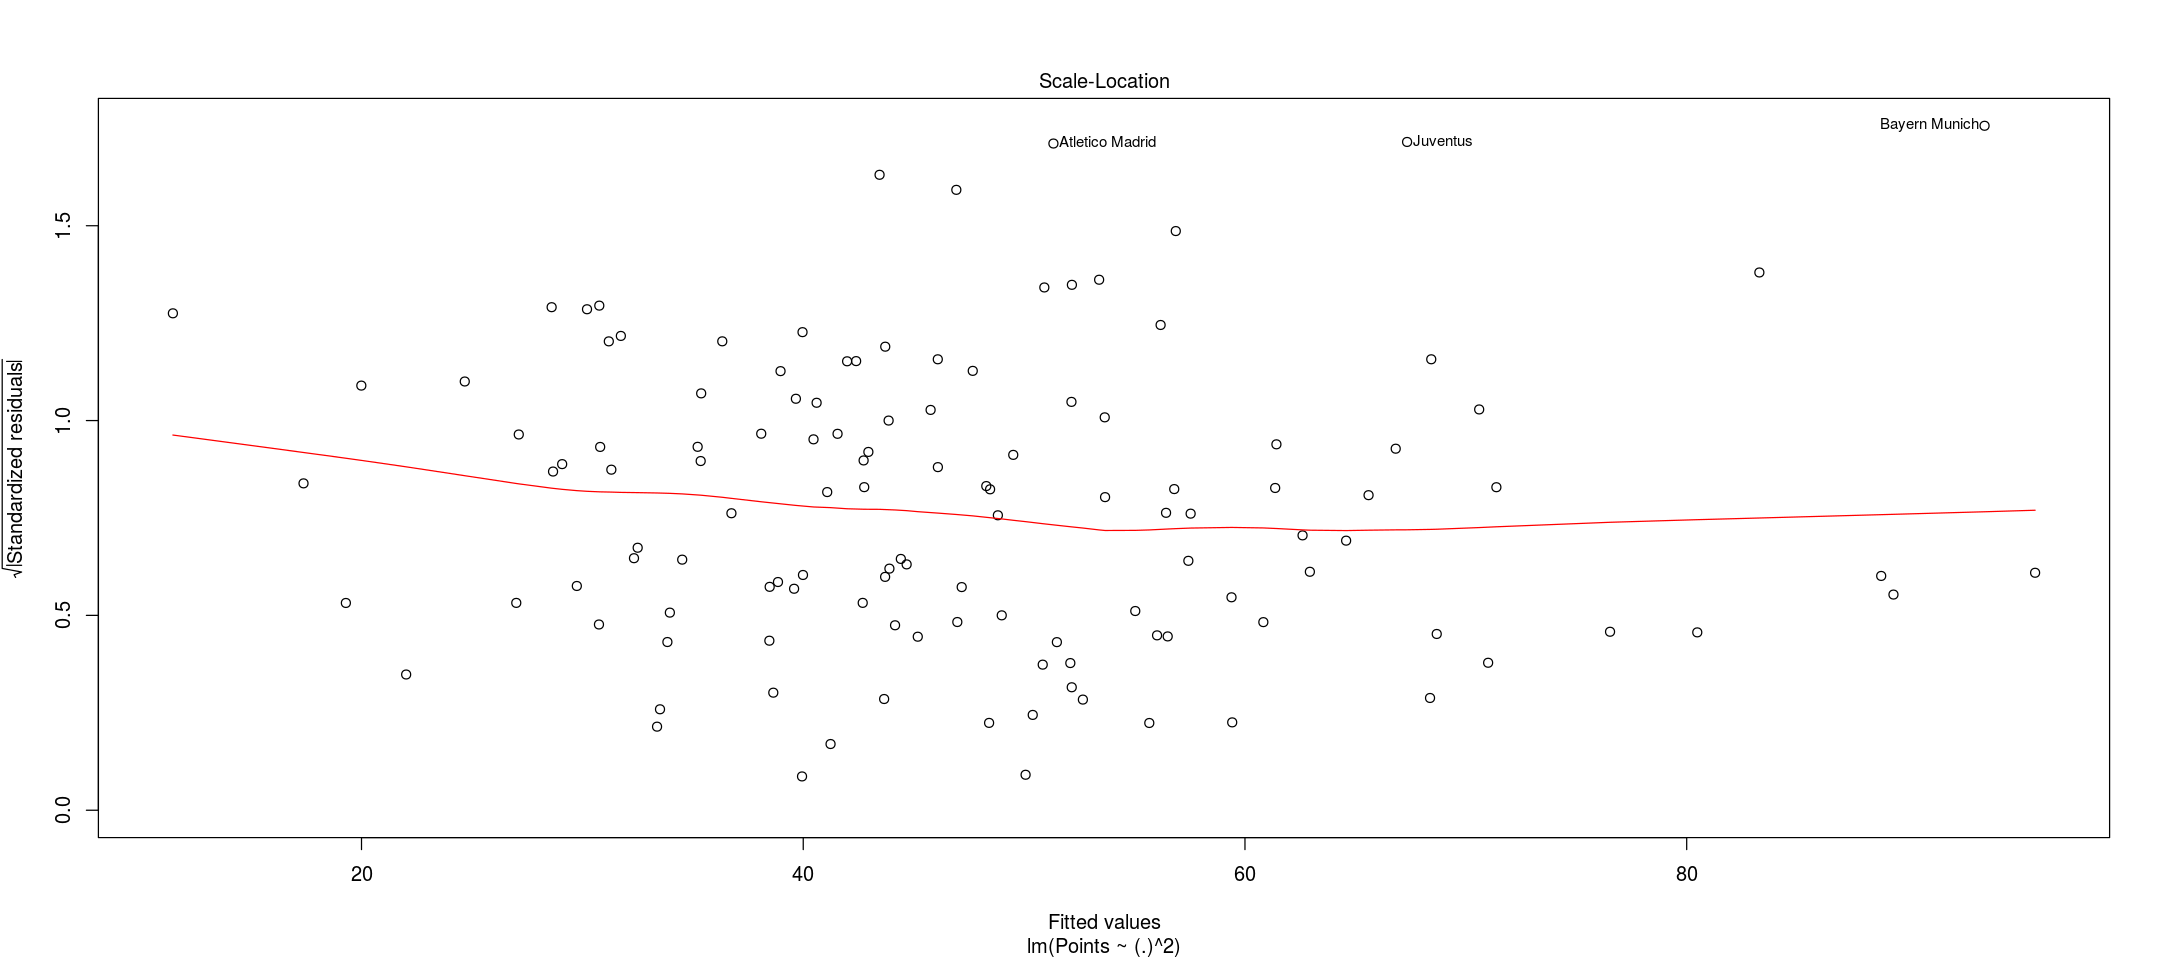

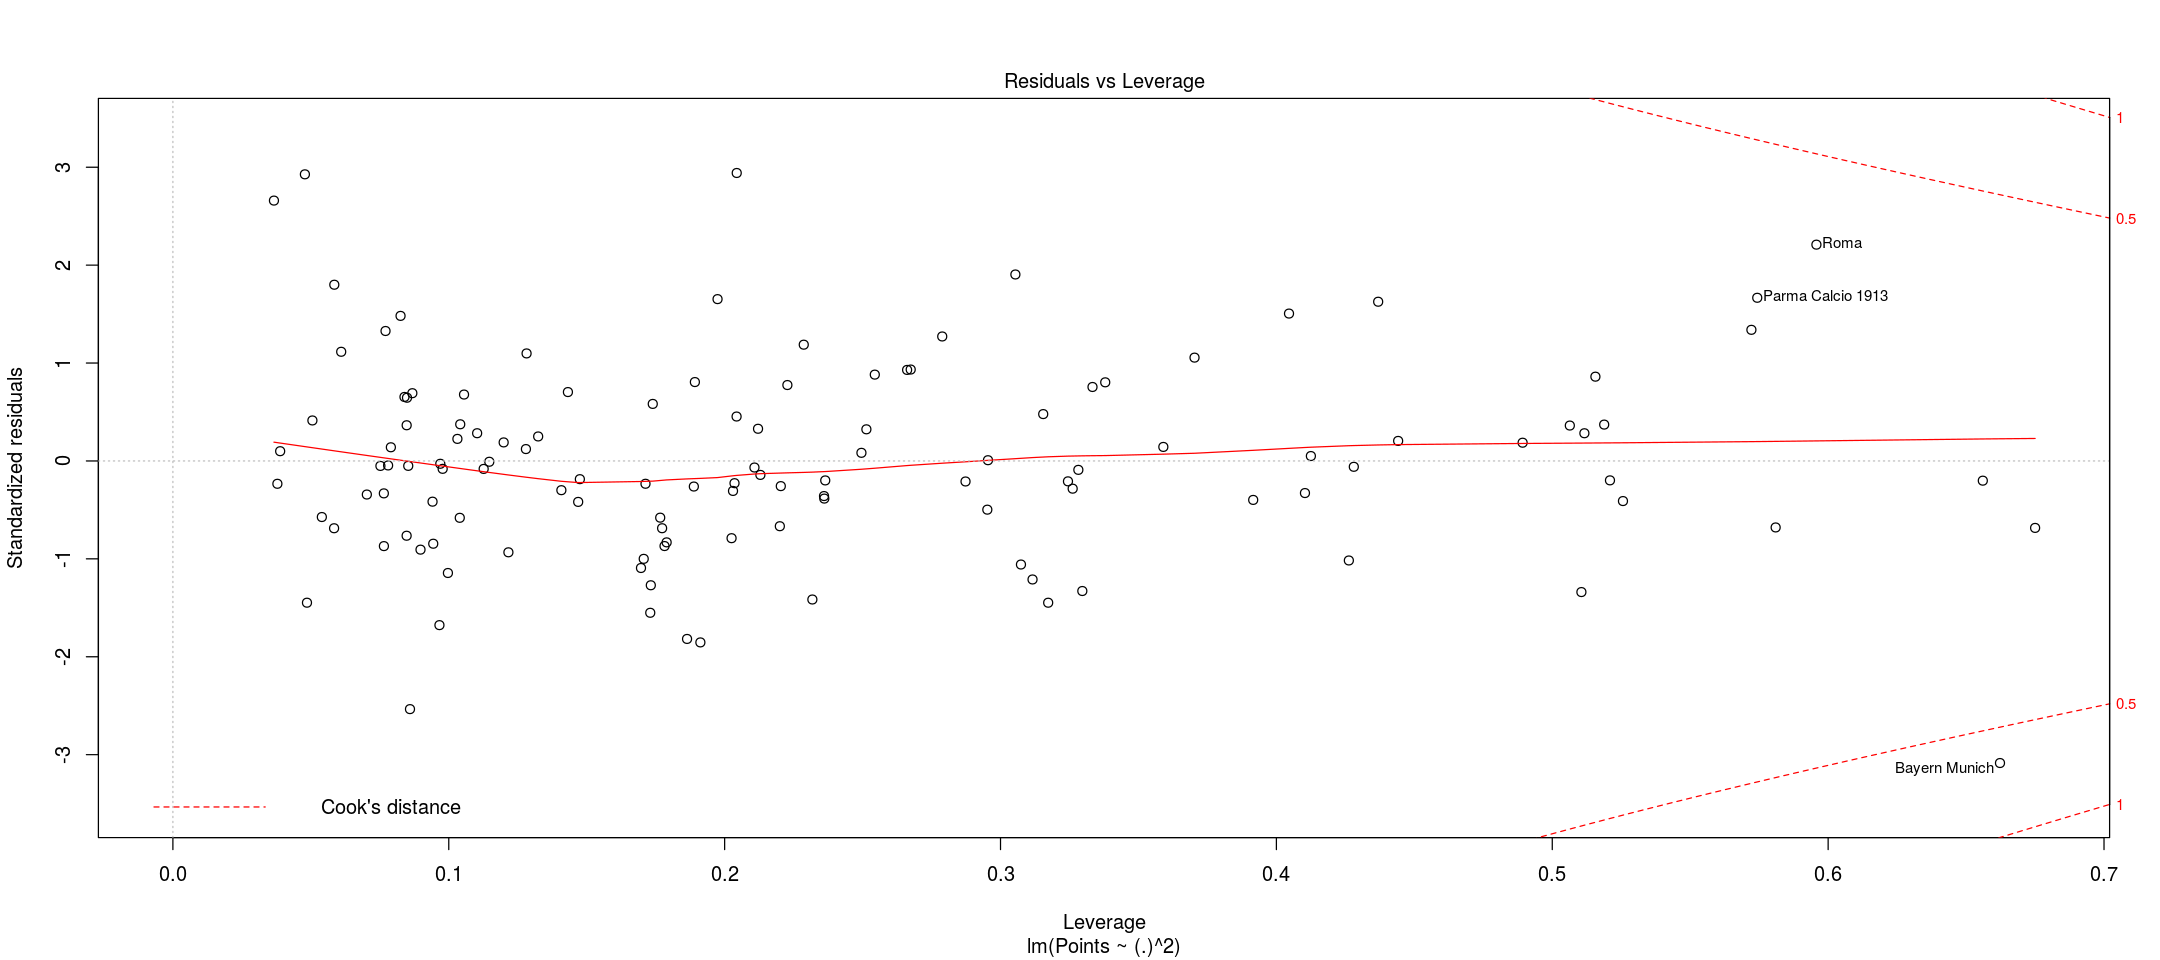

In [170]:
plot(reg_bic)

On voit que le graphe des résidus ne présente pas de forme particulière. De plus, le graphe quantile-quantile est plus ou moins aligné (quelques soucis sur les petits et grands quantiles).

On va refaire de la sélection de variables, mais pour chaque pays, et ainsi observer les variables vraiment influentes.

In [171]:
France = data_but[data_tot$Pays == "France",]
Allemagne = data_but[data_tot$Pays == "Allemagne",]
Italie = data_but[data_tot$Pays == "Italie",]
Espagne = data_but[data_tot$Pays == "Espagne",]
Argentine = data_but[data_tot$Pays == "Argentine",]
Angleterre = data_but[data_tot$Pays == "Angleterre",]

In [172]:
choix_France <- regsubsets(data_tot[data_tot$Pays=="France",]$Points~., data=France,nbest=1, nvmax=10, method="seqrep")
choix_Allemagne <- regsubsets(data_tot[data_tot$Pays=="Allemagne",]$Points~., data=Allemagne,nbest=1, nvmax=10, method="seqrep")
choix_Italie <- regsubsets(data_tot[data_tot$Pays=="Italie",]$Points~., data=Italie,nbest=1, nvmax=10, method="seqrep")
choix_Espagne <- regsubsets(data_tot[data_tot$Pays=="Espagne",]$Points~., data=Espagne,nbest=1, nvmax=10, method="seqrep")
choix_Argentine <- regsubsets(data_tot[data_tot$Pays=="Argentine",]$Points~., data=Argentine, nbest=1, nvmax=10, method="seqrep")
choix_Angleterre <- regsubsets(data_tot[data_tot$Pays=="Angleterre",]$Points~., data=Angleterre, nbest=1, nvmax=10, method="seqrep")

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“33  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“35  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“33  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“33  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“27  linear dependencies found”
Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“33  linear dependencies found”


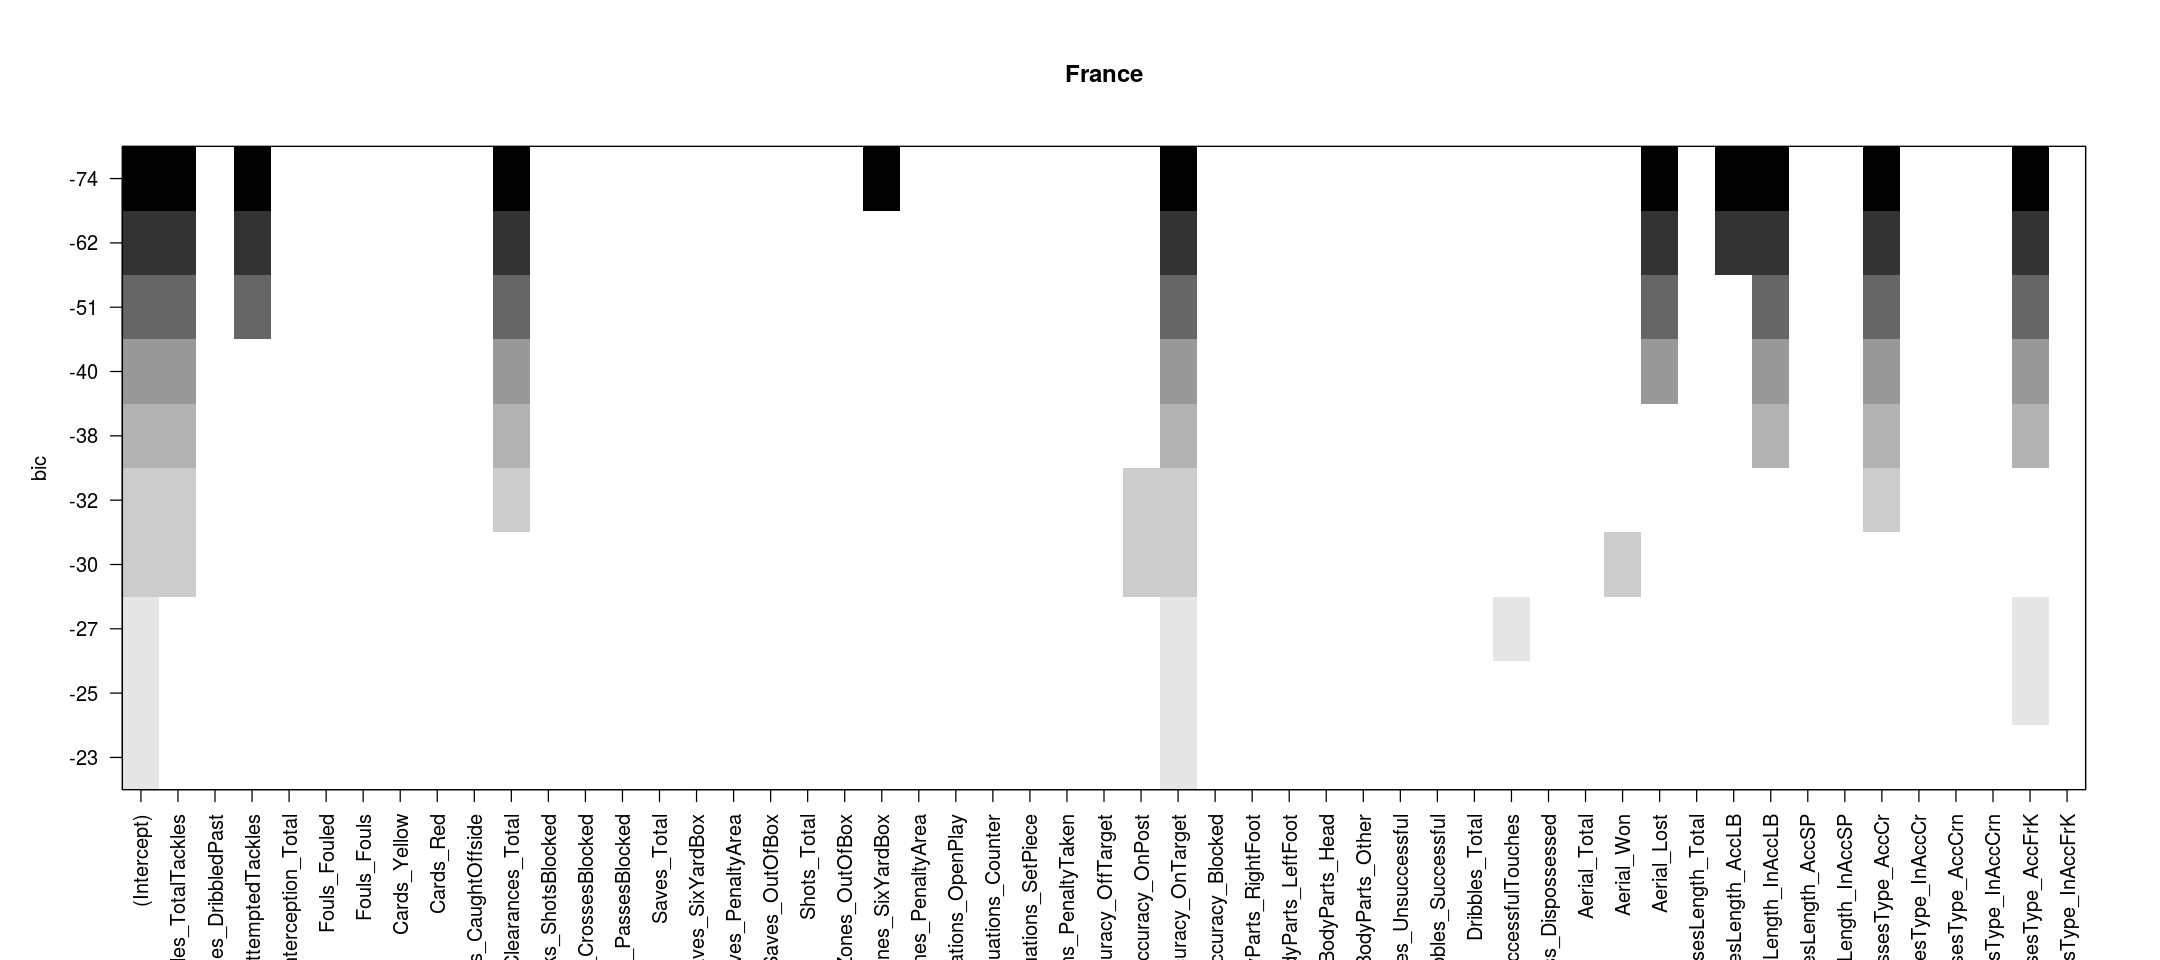

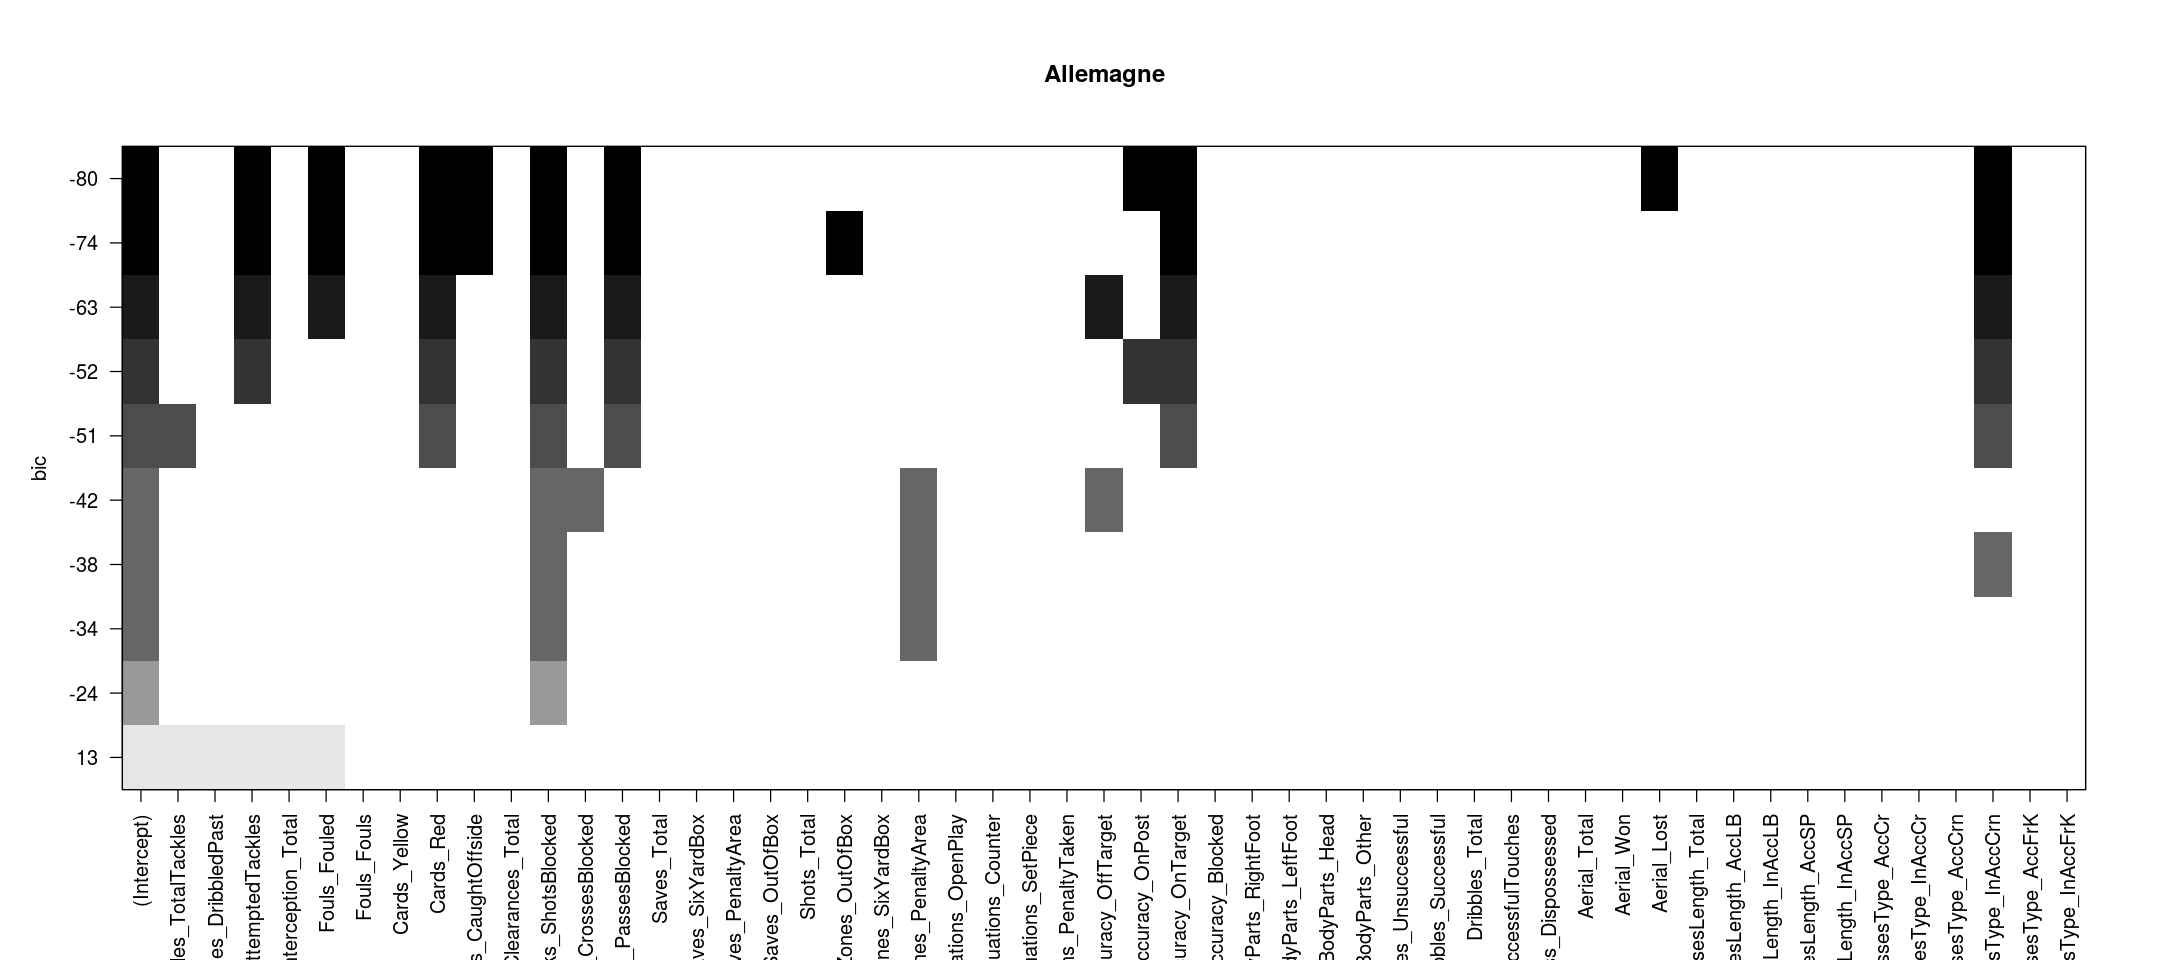

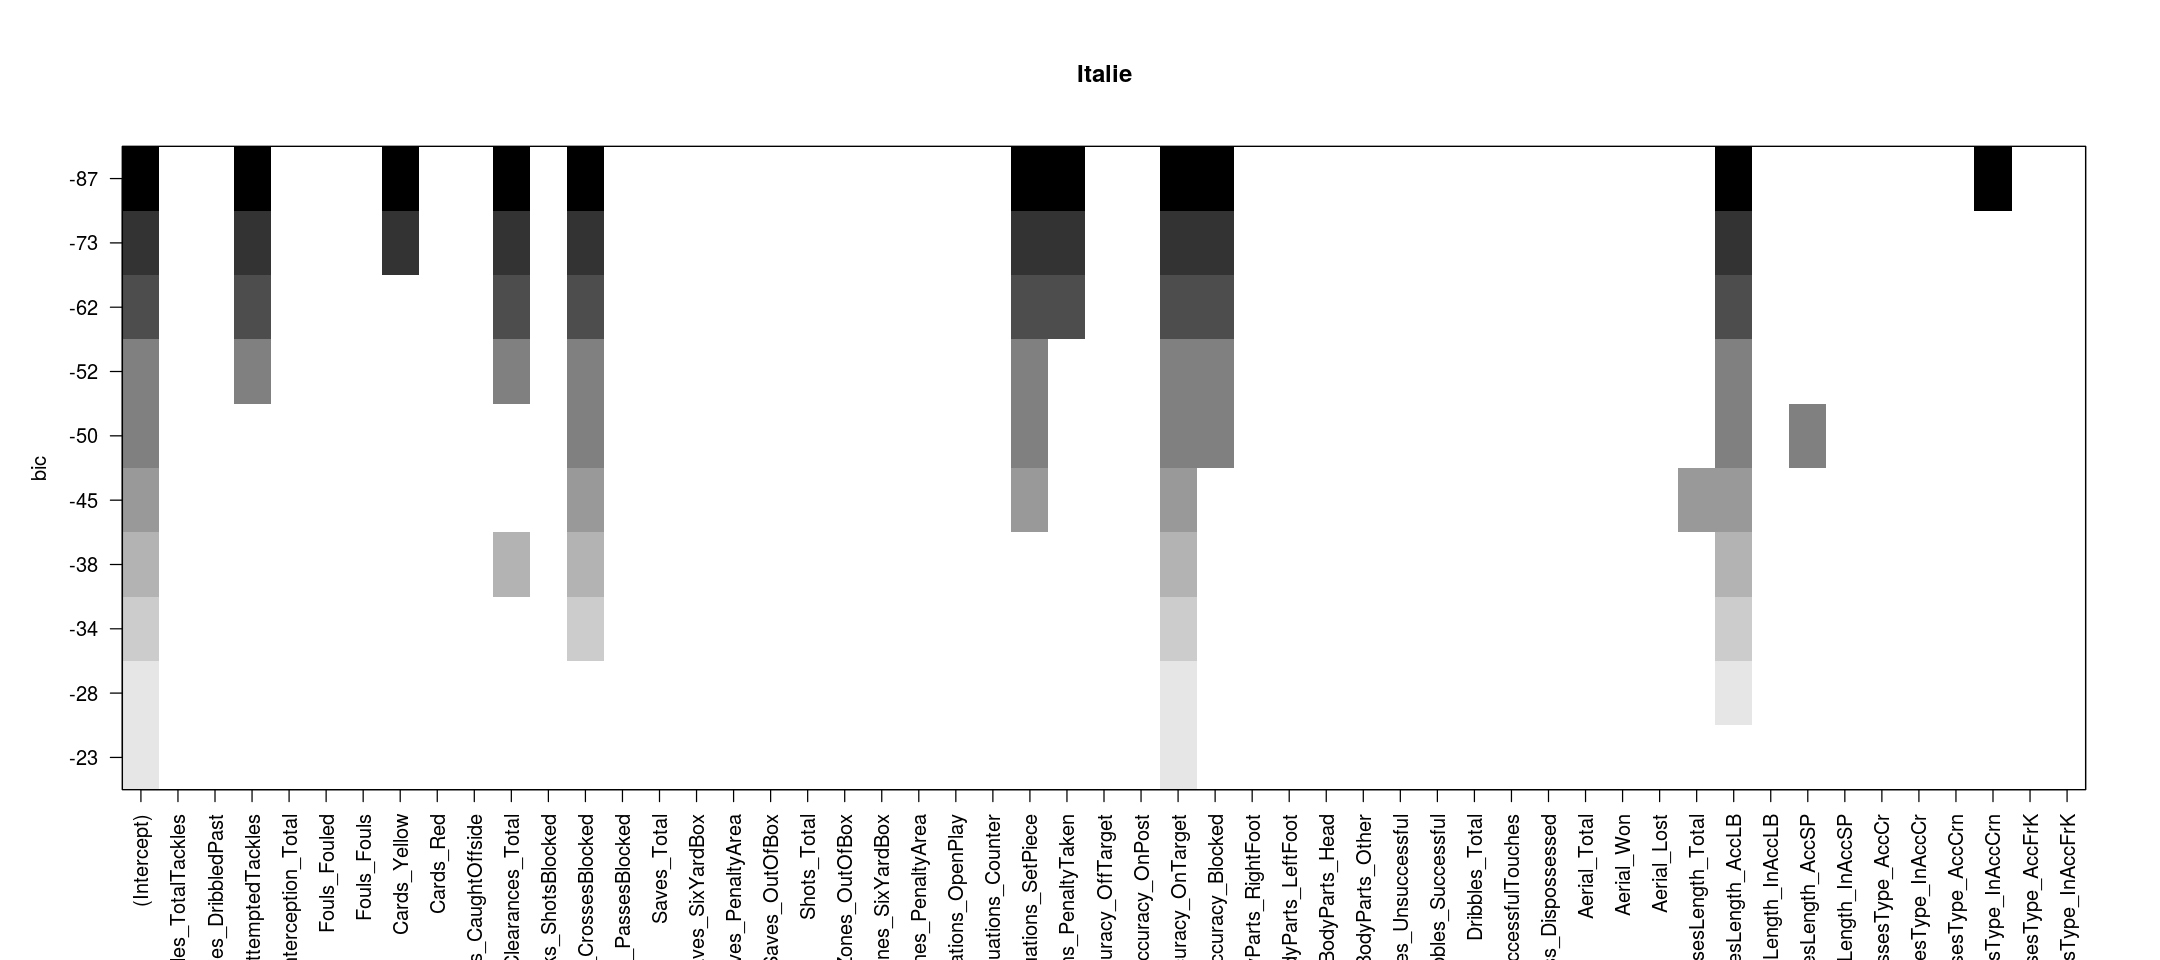

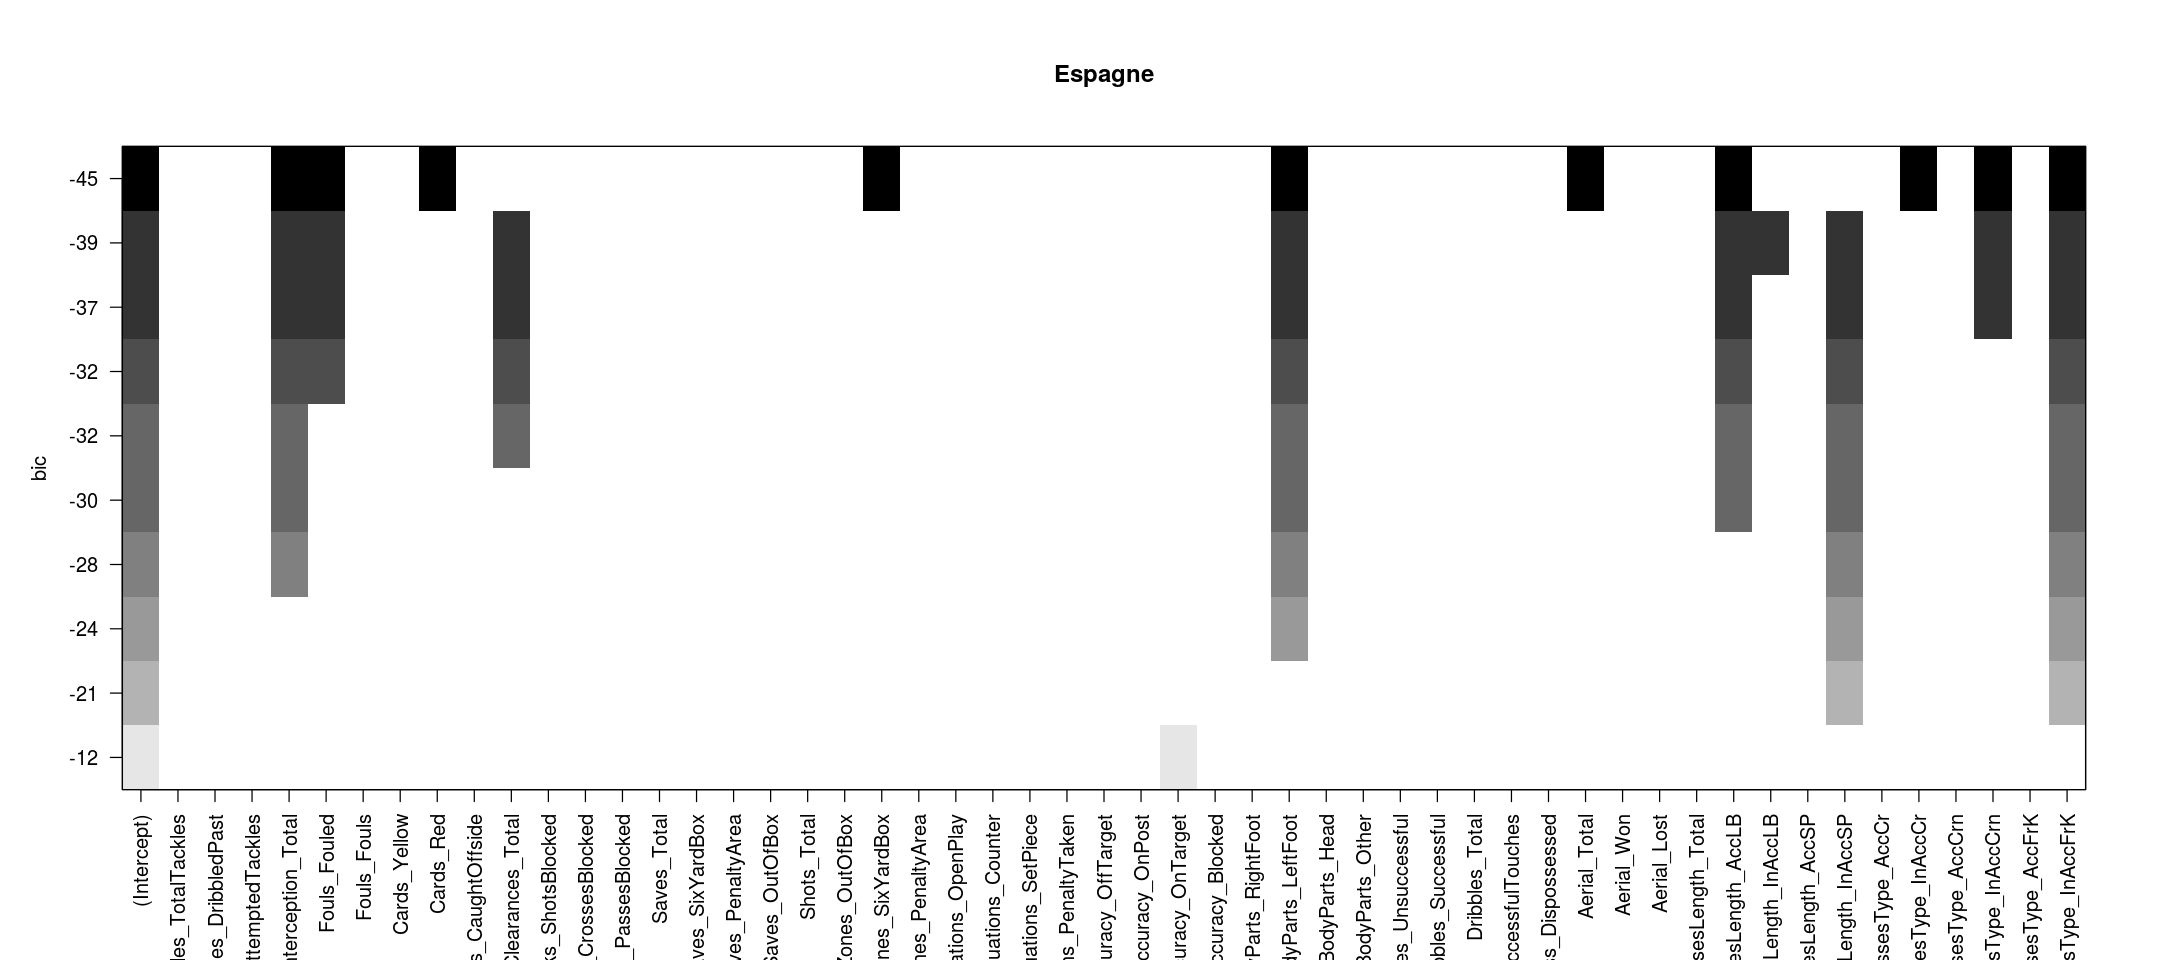

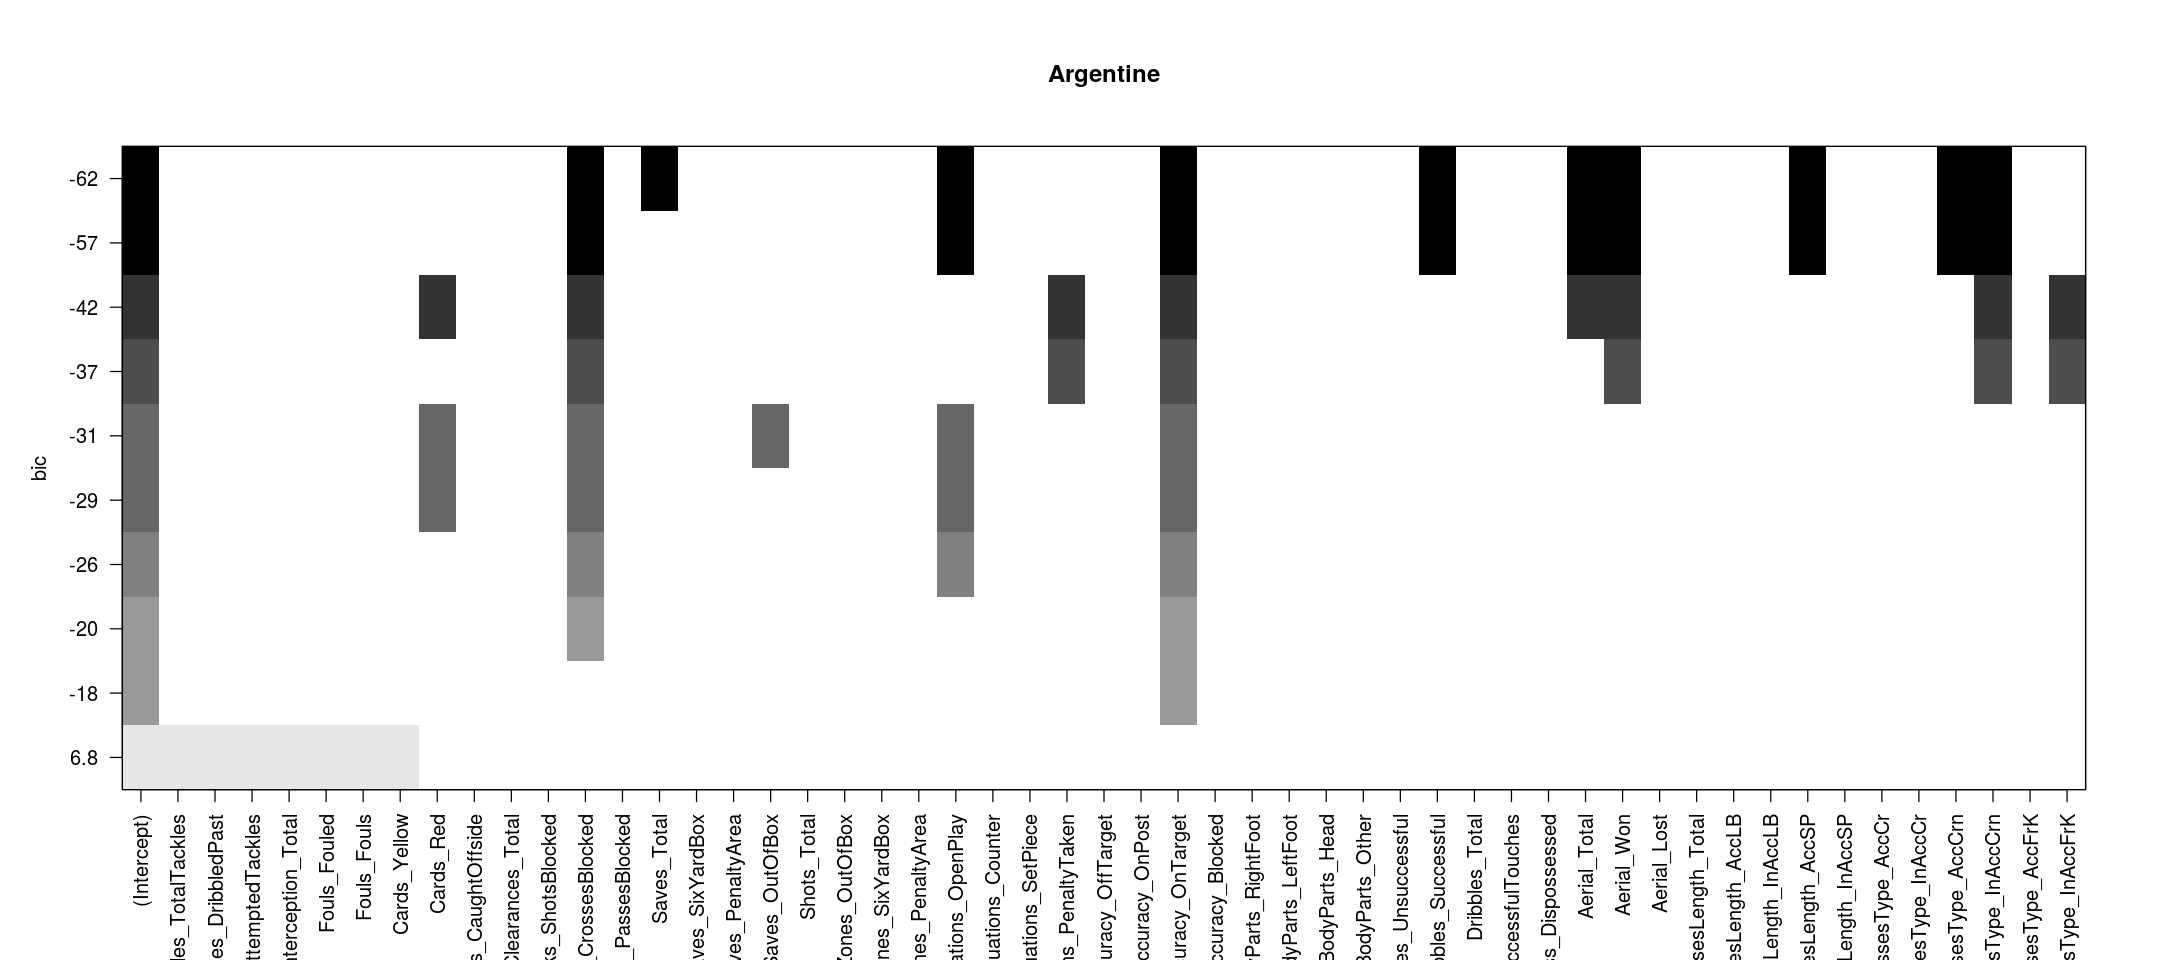

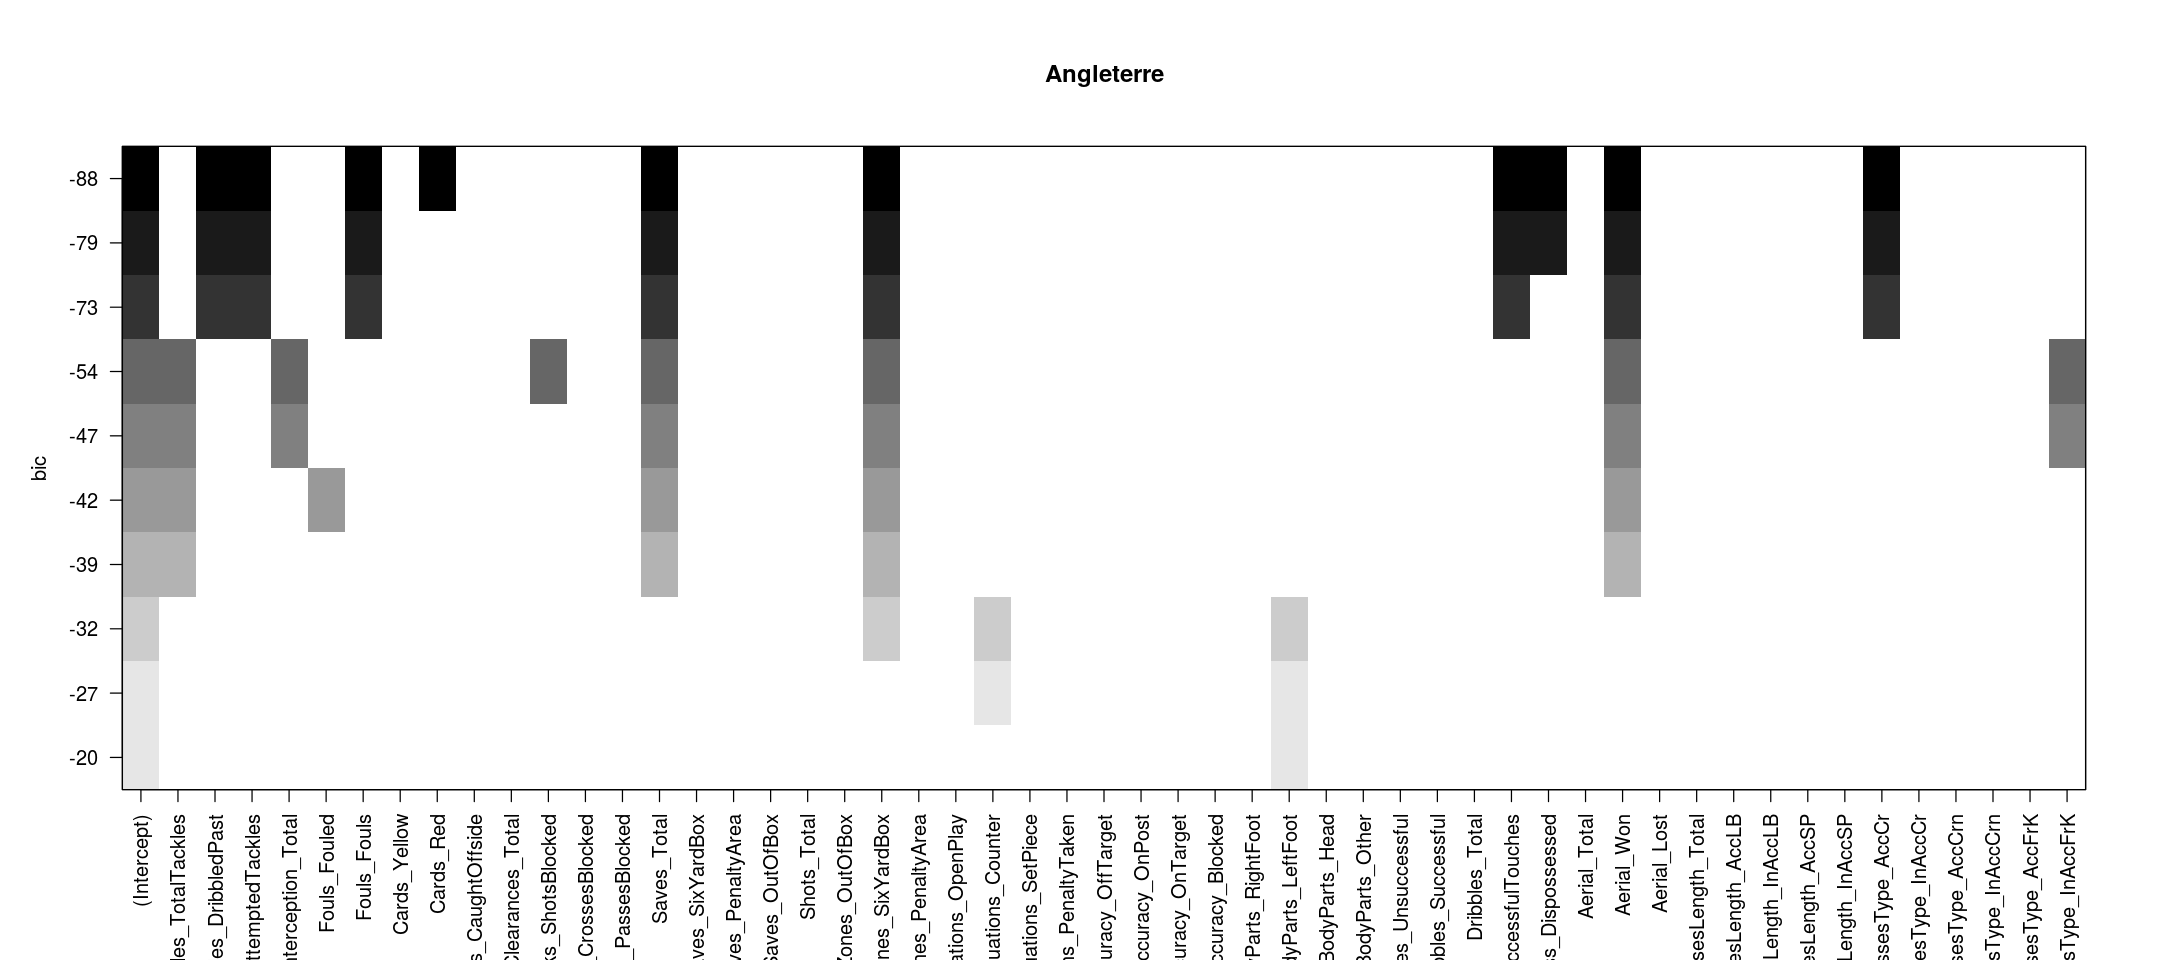

In [173]:
plot(choix_France,scale="bic", main = "France")
plot(choix_Allemagne,scale="bic", main = "Allemagne")
plot(choix_Italie,scale="bic", main = "Italie")
plot(choix_Espagne,scale="bic", main = "Espagne")
plot(choix_Argentine,scale="bic", main = "Argentine")
plot(choix_Angleterre,scale="bic", main = "Angleterre")

On voit que les variables retenues ne sont pas les mêmes d'un pays à l'autre. On va les afficher.

In [174]:
nb_min = which.min(summary(choix_France)$bic)
c_fr = coef(choix_France, nb_min)
c_fr

(Intercept)          Tackles_TotalTackles 
                  -77.9302404                     9.7212844 
Tackles_TotalAttemptedTackles              Clearances_Total 
                   -3.3966718                    -2.7504201 
        ShotsZones_SixYardBox        ShotsAccuracy_OnTarget 
                    7.2707977                    13.4119080 
                  Aerial_Lost            PassesLength_AccLB 
                   -1.8131083                     0.4089274 
         PassesLength_InAccLB              PassesType_AccCr 
                    2.1615077                    -9.6510656 
            PassesType_AccFrK 
                    3.8453056

In [175]:
nb_min = which.min(summary(choix_Allemagne)$bic)
c_al = coef(choix_Allemagne, nb_min)
c_al

(Intercept) Tackles_TotalAttemptedTackles 
                   122.437577                     -1.809958 
                 Fouls_Fouled                     Cards_Red 
                    -2.012829                    -36.929599 
       OffSides_CaughtOffside           Blocks_ShotsBlocked 
                    -5.508213                    -16.316983 
         Blocks_PassesBlocked          ShotsAccuracy_OnPost 
                     6.183806                    -24.638845 
       ShotsAccuracy_OnTarget                   Aerial_Lost 
                     9.164573                     -0.553496 
          PassesType_InAccCrn 
                    -8.962804

In [176]:
nb_min = which.min(summary(choix_Italie)$bic)
c_it = coef(choix_Italie, nb_min)
c_it

(Intercept) Tackles_TotalAttemptedTackles 
                   -24.524330                     -1.271012 
                 Cards_Yellow              Clearances_Total 
                     9.383821                     -3.315330 
        Blocks_CrossesBlocked      ShotsSituations_SetPiece 
                    24.034917                      5.990969 
 ShotsSituations_PenaltyTaken        ShotsAccuracy_OnTarget 
                   -47.434759                     18.478151 
        ShotsAccuracy_Blocked            PassesLength_AccLB 
                   -11.782979                      1.160746 
          PassesType_InAccCrn 
                     3.676410

In [177]:
nb_min = which.min(summary(choix_Espagne)$bic)
c_esp = coef(choix_Espagne, nb_min)
c_esp 

(Intercept)      Interception_Total            Fouls_Fouled 
            -152.189699                4.461628                1.831048 
              Cards_Red   ShotsZones_SixYardBox ShotsBodyParts_LeftFoot 
              17.085778               11.885149                5.589398 
           Aerial_Total      PassesLength_AccLB      PassesType_InAccCr 
               1.654908                2.619762               -4.827258 
    PassesType_InAccCrn     PassesType_InAccFrK 
              18.501416               -7.163341

In [178]:
nb_min = which.min(summary(choix_Argentine)$bic)
c_arg = coef(choix_Argentine, nb_min)
c_arg

(Intercept)    Blocks_CrossesBlocked              Saves_Total 
           -123.17442829              17.14168453               2.57811326 
ShotsSituations_OpenPlay   ShotsAccuracy_OnTarget      Dribbles_Successful 
              2.92400391               6.33824469              -1.54983187 
            Aerial_Total               Aerial_Won       PassesLength_AccSP 
             -1.31814903               3.29061313               0.08502539 
       PassesType_AccCrn      PassesType_InAccCrn 
             10.57447458               9.20099265

In [179]:
nb_min = which.min(summary(choix_Angleterre)$bic)
c_ang = coef(choix_Angleterre, nb_min)
c_ang

(Intercept)              Tackles_DribbledPast 
                        37.760075                        -10.712119 
    Tackles_TotalAttemptedTackles                       Fouls_Fouls 
                         6.235103                         -1.516796 
                        Cards_Red                       Saves_Total 
                       -32.987936                        -13.455523 
            ShotsZones_SixYardBox PossesionLoss_UnsuccessfulTouches 
                        48.356627                          4.732967 
       PossesionLoss_Dispossessed                        Aerial_Won 
                        -1.472072                         -2.124948 
                 PassesType_AccCr 
                       -14.049887

In [180]:
for (i in 1:nb.variables){
    for (j in 1:(length(names(c_fr))-1)){
        if (choix_France$xnames[i+1] == names(c_fr)[j+1]){
            df.variables.pays$France[i] = round(c_fr[j+1],3)
        }
        else if (choix_Allemagne$xnames[i+1] == names(c_al)[j+1]){
            df.variables.pays$Allemagne[i] = round(c_fr[j+1],3)
        }
        else if (choix_Angleterre$xnames[i+1] == names(c_ang)[j+1]){
            df.variables.pays$Angleterre[i] = round(c_ang[j+1],3)
        }
        else if (choix_Argentine$xnames[i+1] == names(c_arg)[j+1]){
            df.variables.pays$Argentine[i] = round(c_arg[j+1],3)
        }
        else if (choix_Italie$xnames[i+1] == names(c_it)[j+1]){
            df.variables.pays$Italie[i] = round(c_it[j+1],3)
        }
        else if (choix_Espagne$xnames[i+1] == names(c_esp)[j+1]){
            df.variables.pays$Espagne[i] = round(c_esp[j+1],3)
        }
    } 
}

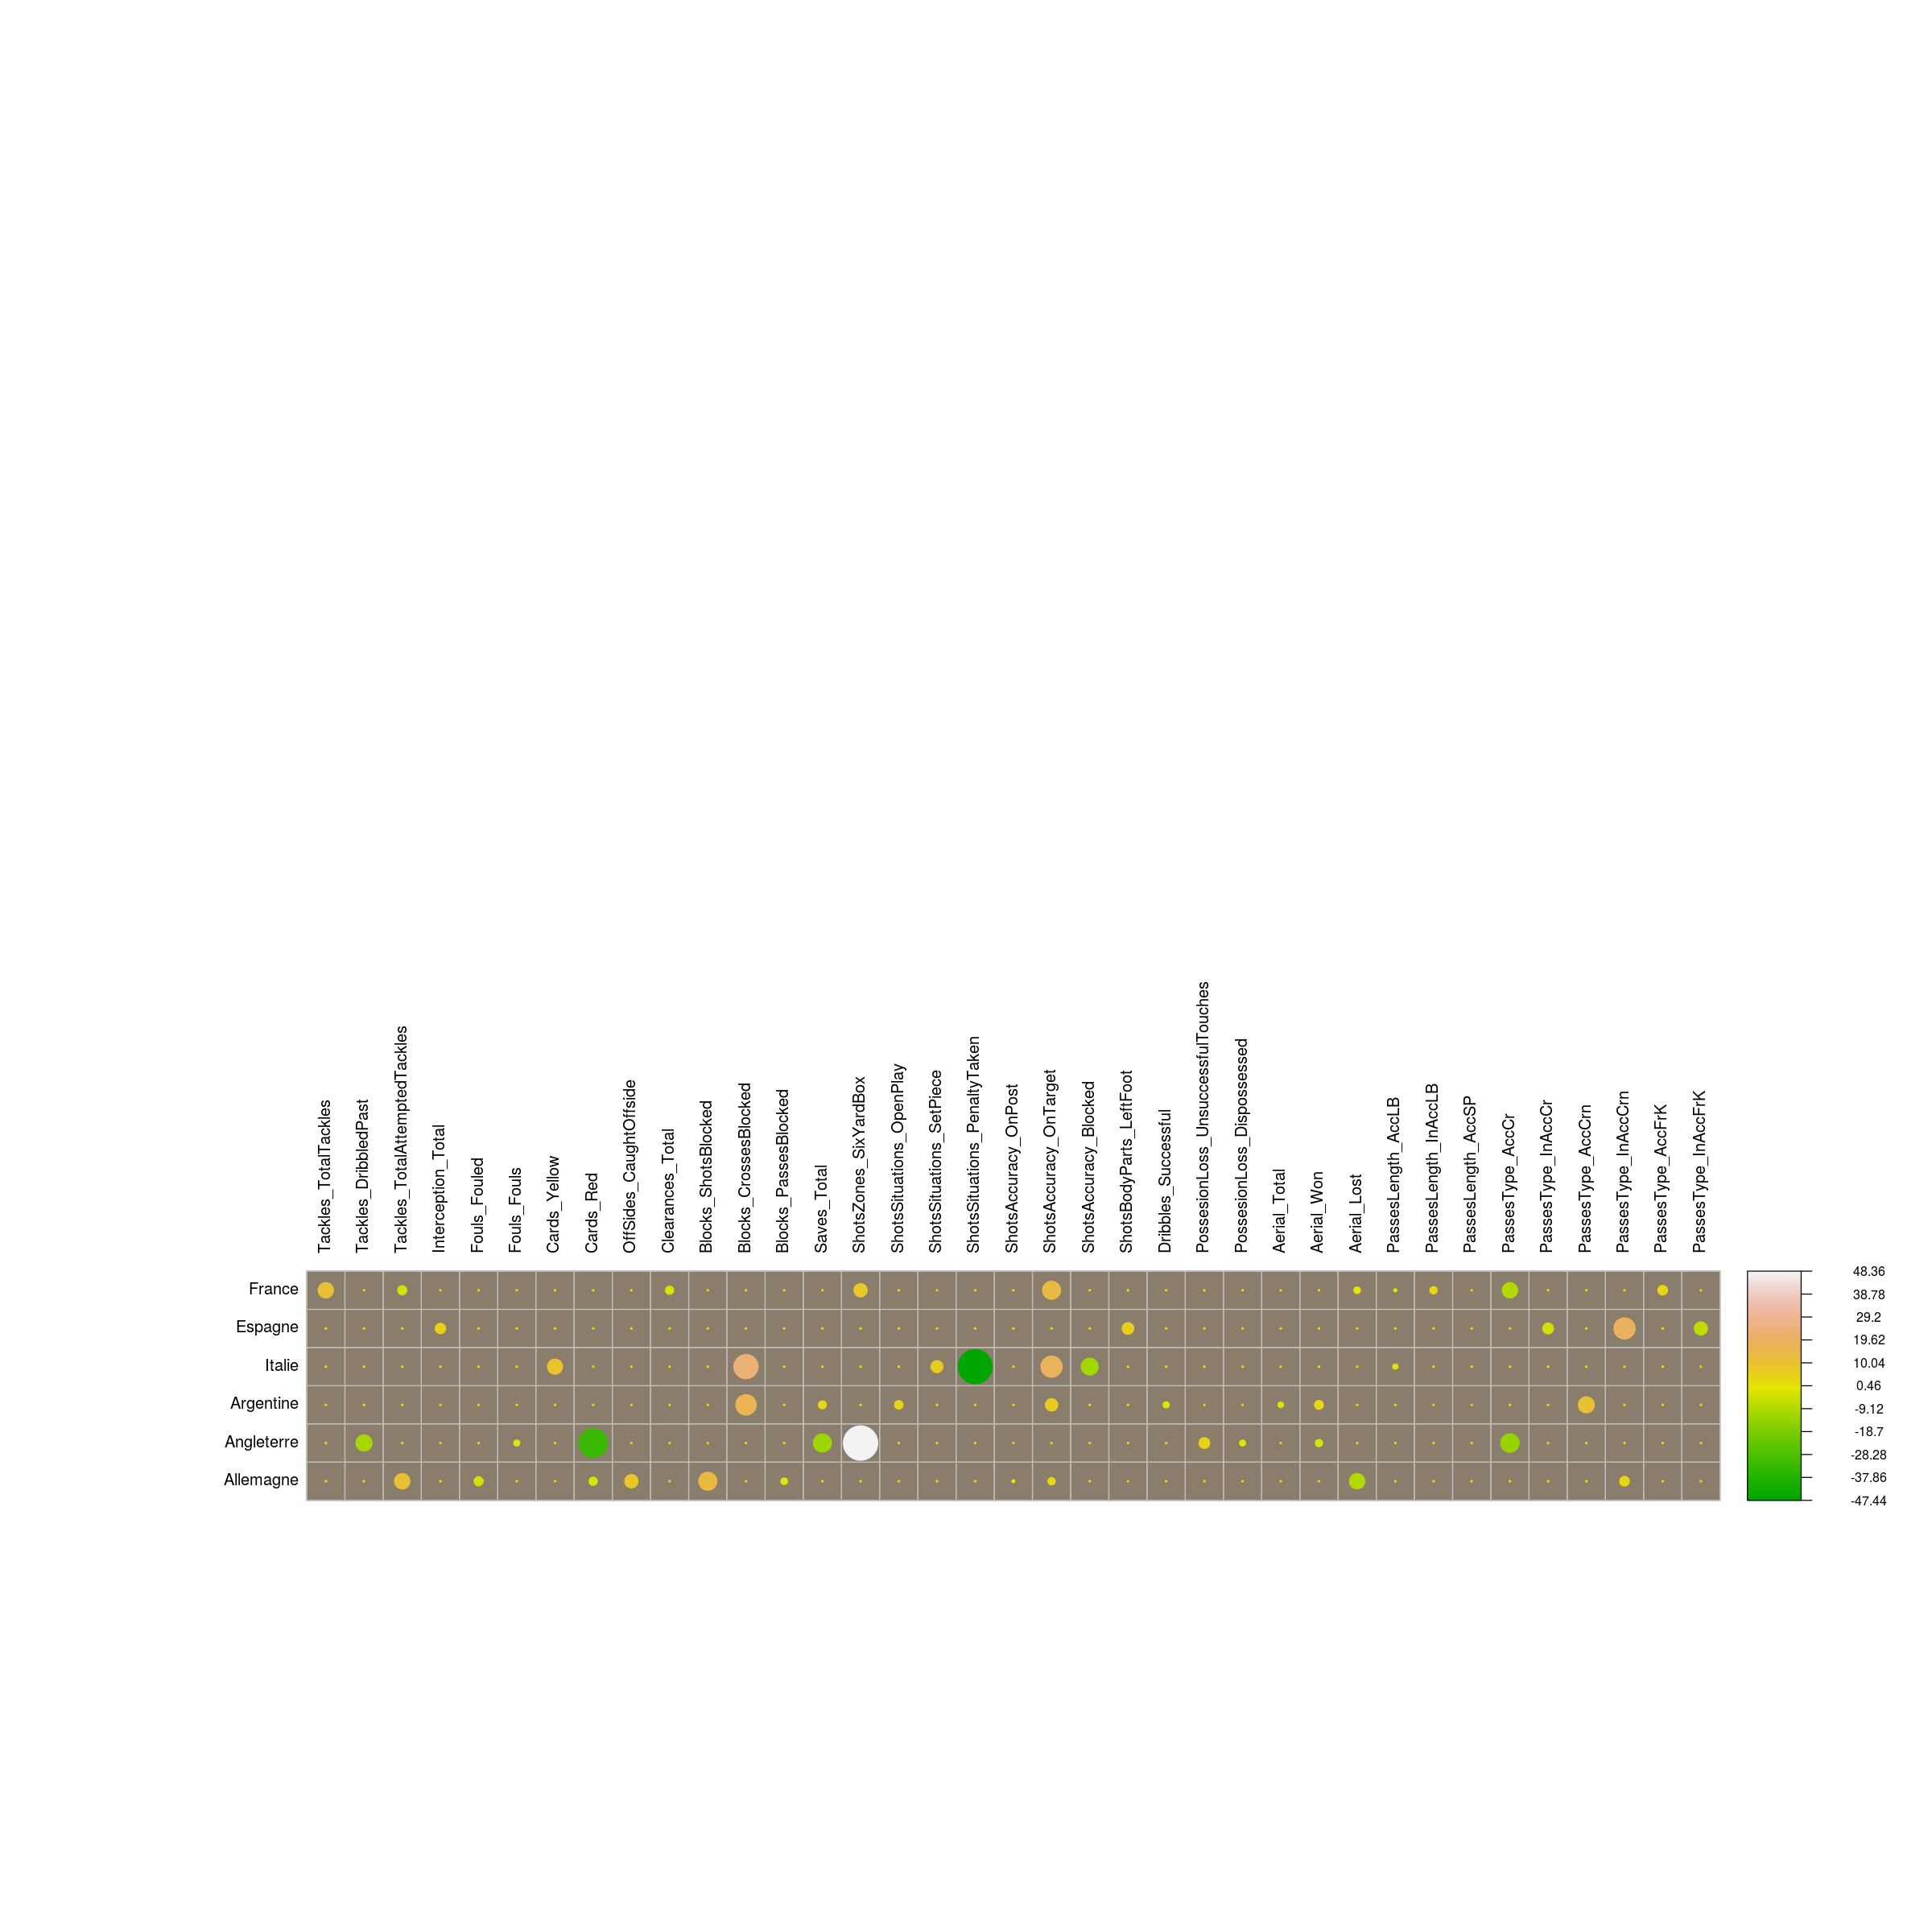

In [181]:
df.pays.sans_zeros = df.variables.pays[rowSums(df.variables.pays[,2:7]^2) > 0, ]
mat.pays = data.matrix(df.pays.sans_zeros[,2:7])
rownames(mat.pays) = df.pays.sans_zeros$Noms
options(repr.plot.width=20, repr.plot.height=20)
corrplot(t(mat.pays), is.corr = FALSE, method = "circle", tl.col = 1, bg = "bisque4", col = terrain.colors(100))

On remarque que c'est seulement en France, Allemagne et Espagne que la variable `Goals_Total` est sélectionnée.

# Regression LASSO

alpha=1 is the lasso penalty, and alpha=0 the ridge penalty

In [27]:
m_lasso = glmnet(as.matrix(data_but), data_tot$Rating, alpha = 1, nlambda = 100)

68 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                        5.9034877033
Tackles_TotalTackles               0.0090340856
Tackles_DribbledPast               .           
Tackles_TotalAttemptedTackles      .           
Interception_Total                 0.0019051963
Fouls_Fouled                       .           
Fouls_Fouls                        .           
Cards_Yellow                       .           
Cards_Red                         -0.0513164175
OffSides_CaughtOffside             .           
Clearances_Total                   .           
Blocks_ShotsBlocked                .           
Blocks_CrossesBlocked              0.0201508548
Blocks_PassesBlocked               0.0003566137
Saves_Total                       -0.0177674923
Saves_SixYardBox                  -0.0346960819
Saves_PenaltyArea                  .           
Saves_OutOfBox                     .           
Shots_Total                        .          

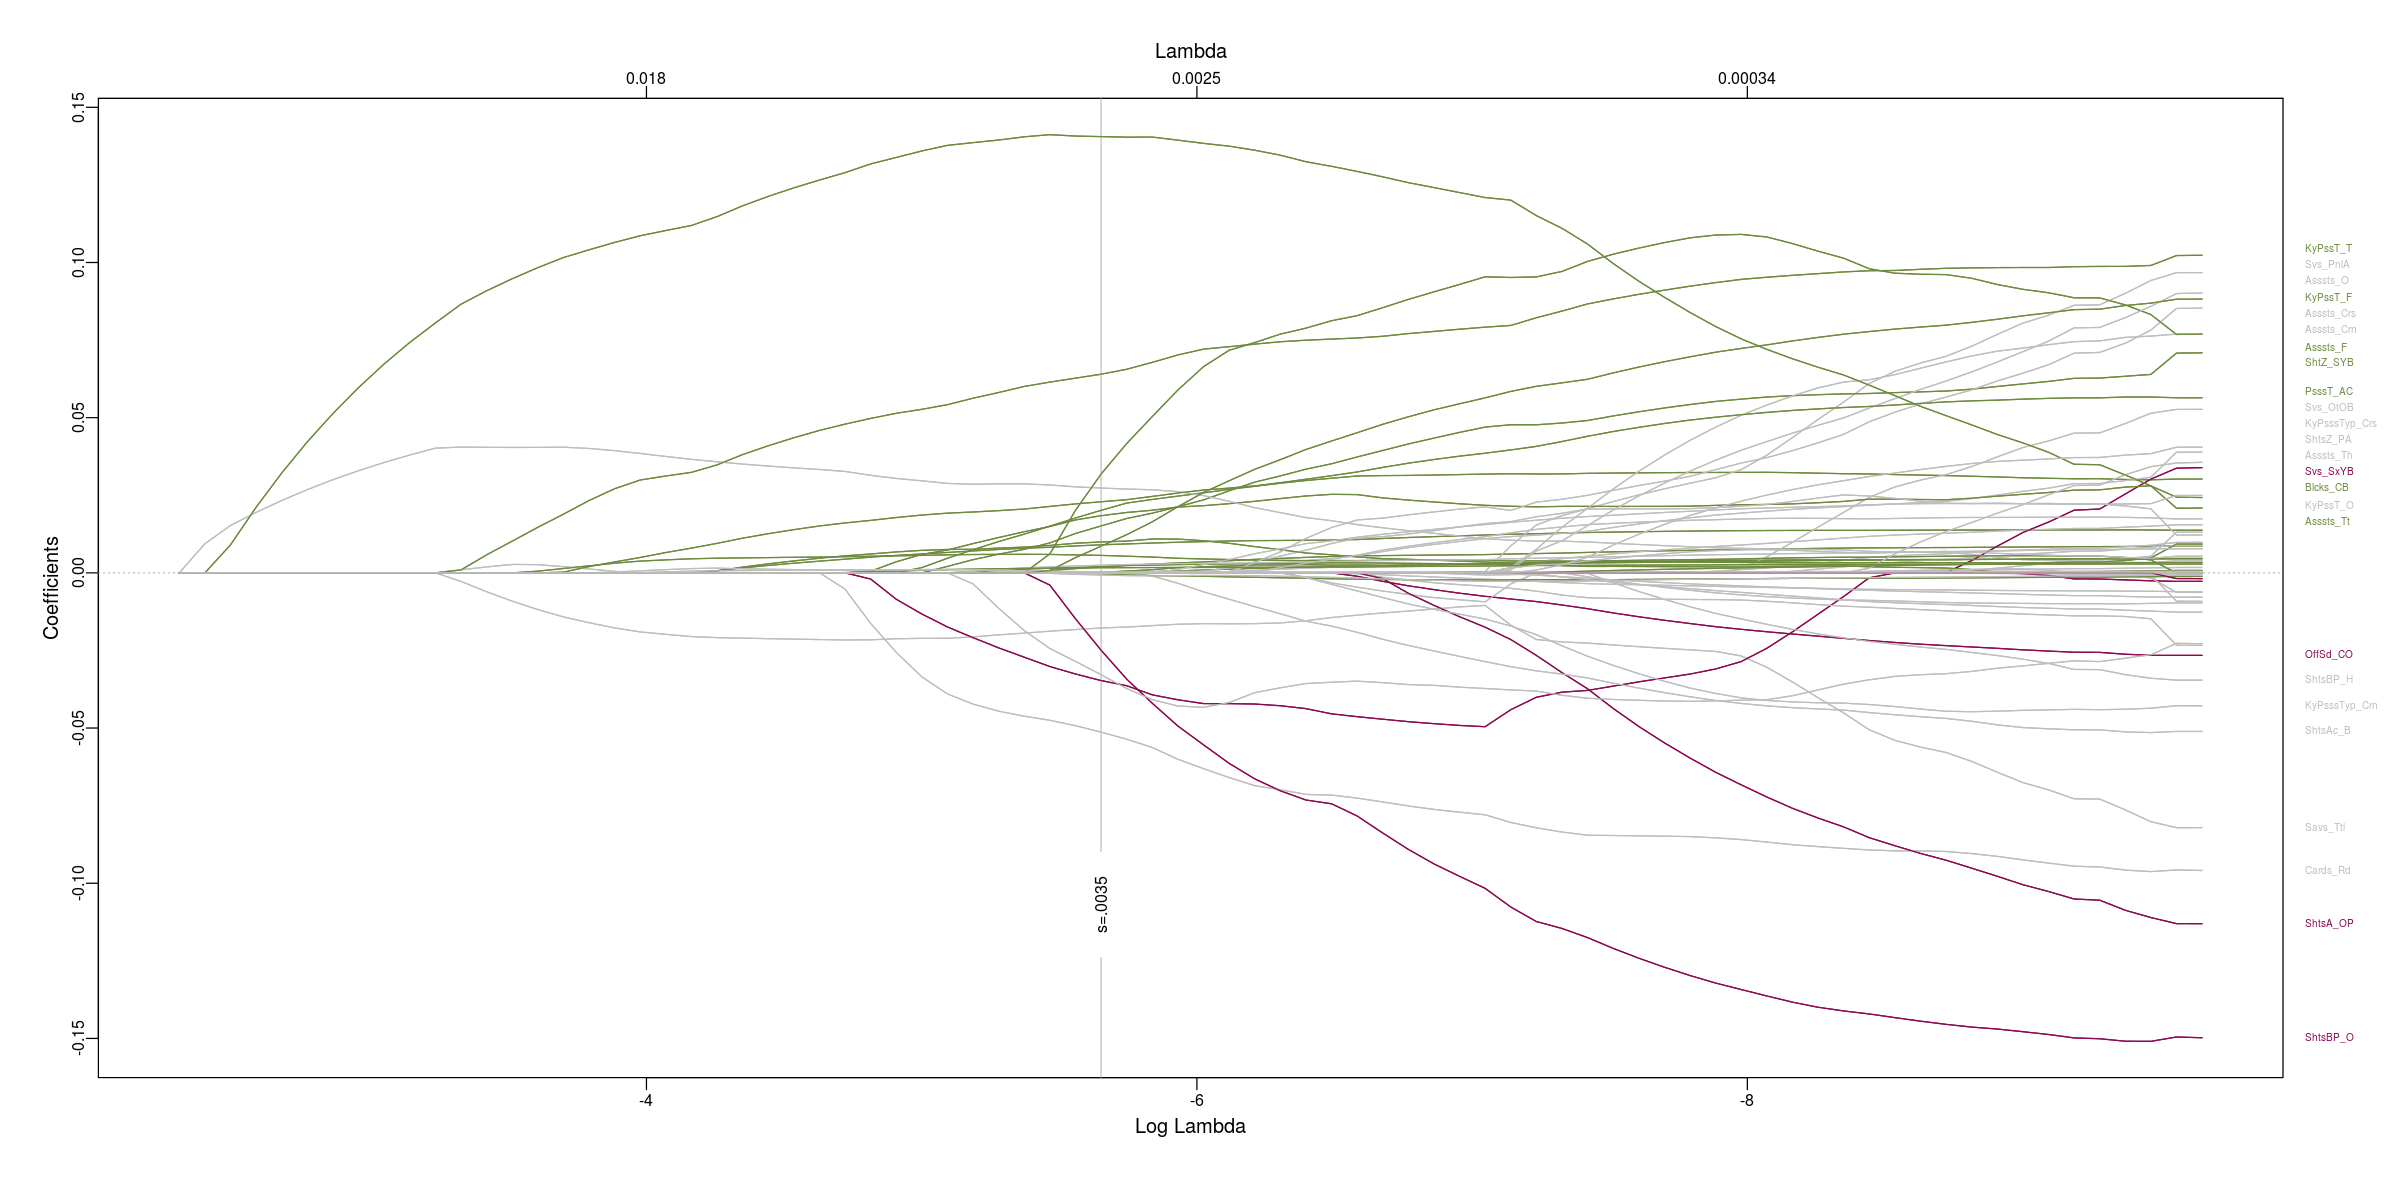

In [43]:
#mod <- glmnet(as.matrix(mtcars[-1]), mtcars[,1]) #from stephen's code above

cvfit<-cv.glmnet(as.matrix(data_but),data_tot$Rating)

glmcoef<-coef(m_lasso,cvfit$lambda.min)
coef.increase<-dimnames(glmcoef[glmcoef[,1]>0,0])[[1]]
coef.decrease<-dimnames(glmcoef[glmcoef[,1]<0,0])[[1]]

#get ordered list of variables as they appear at smallest lambda
allnames<-names(coef(m_lasso)[,
    ncol(coef(m_lasso))][order(coef(m_lasso)[,
    ncol(coef(m_lasso))],decreasing=TRUE)])

#remove intercept
allnames<-setdiff(allnames,allnames[grep("Intercept",allnames)])

#assign colors
cols<-rep("gray",length(allnames))
cols[allnames %in% coef.increase]<-"darkolivegreen4"      # higher mpg is good
cols[allnames %in% coef.decrease]<-"deeppink4"        # lower mpg is not

options(repr.plot.width=20, repr.plot.height=10)
library(plotmo)
plot_glmnet(m_lasso,label=25,s=cvfit$lambda.min,col=cols, cex = 67)

#if you don't believe hp or am are non-zero look at glmcoef
glmcoef

In [32]:
help("plot_glmnet")

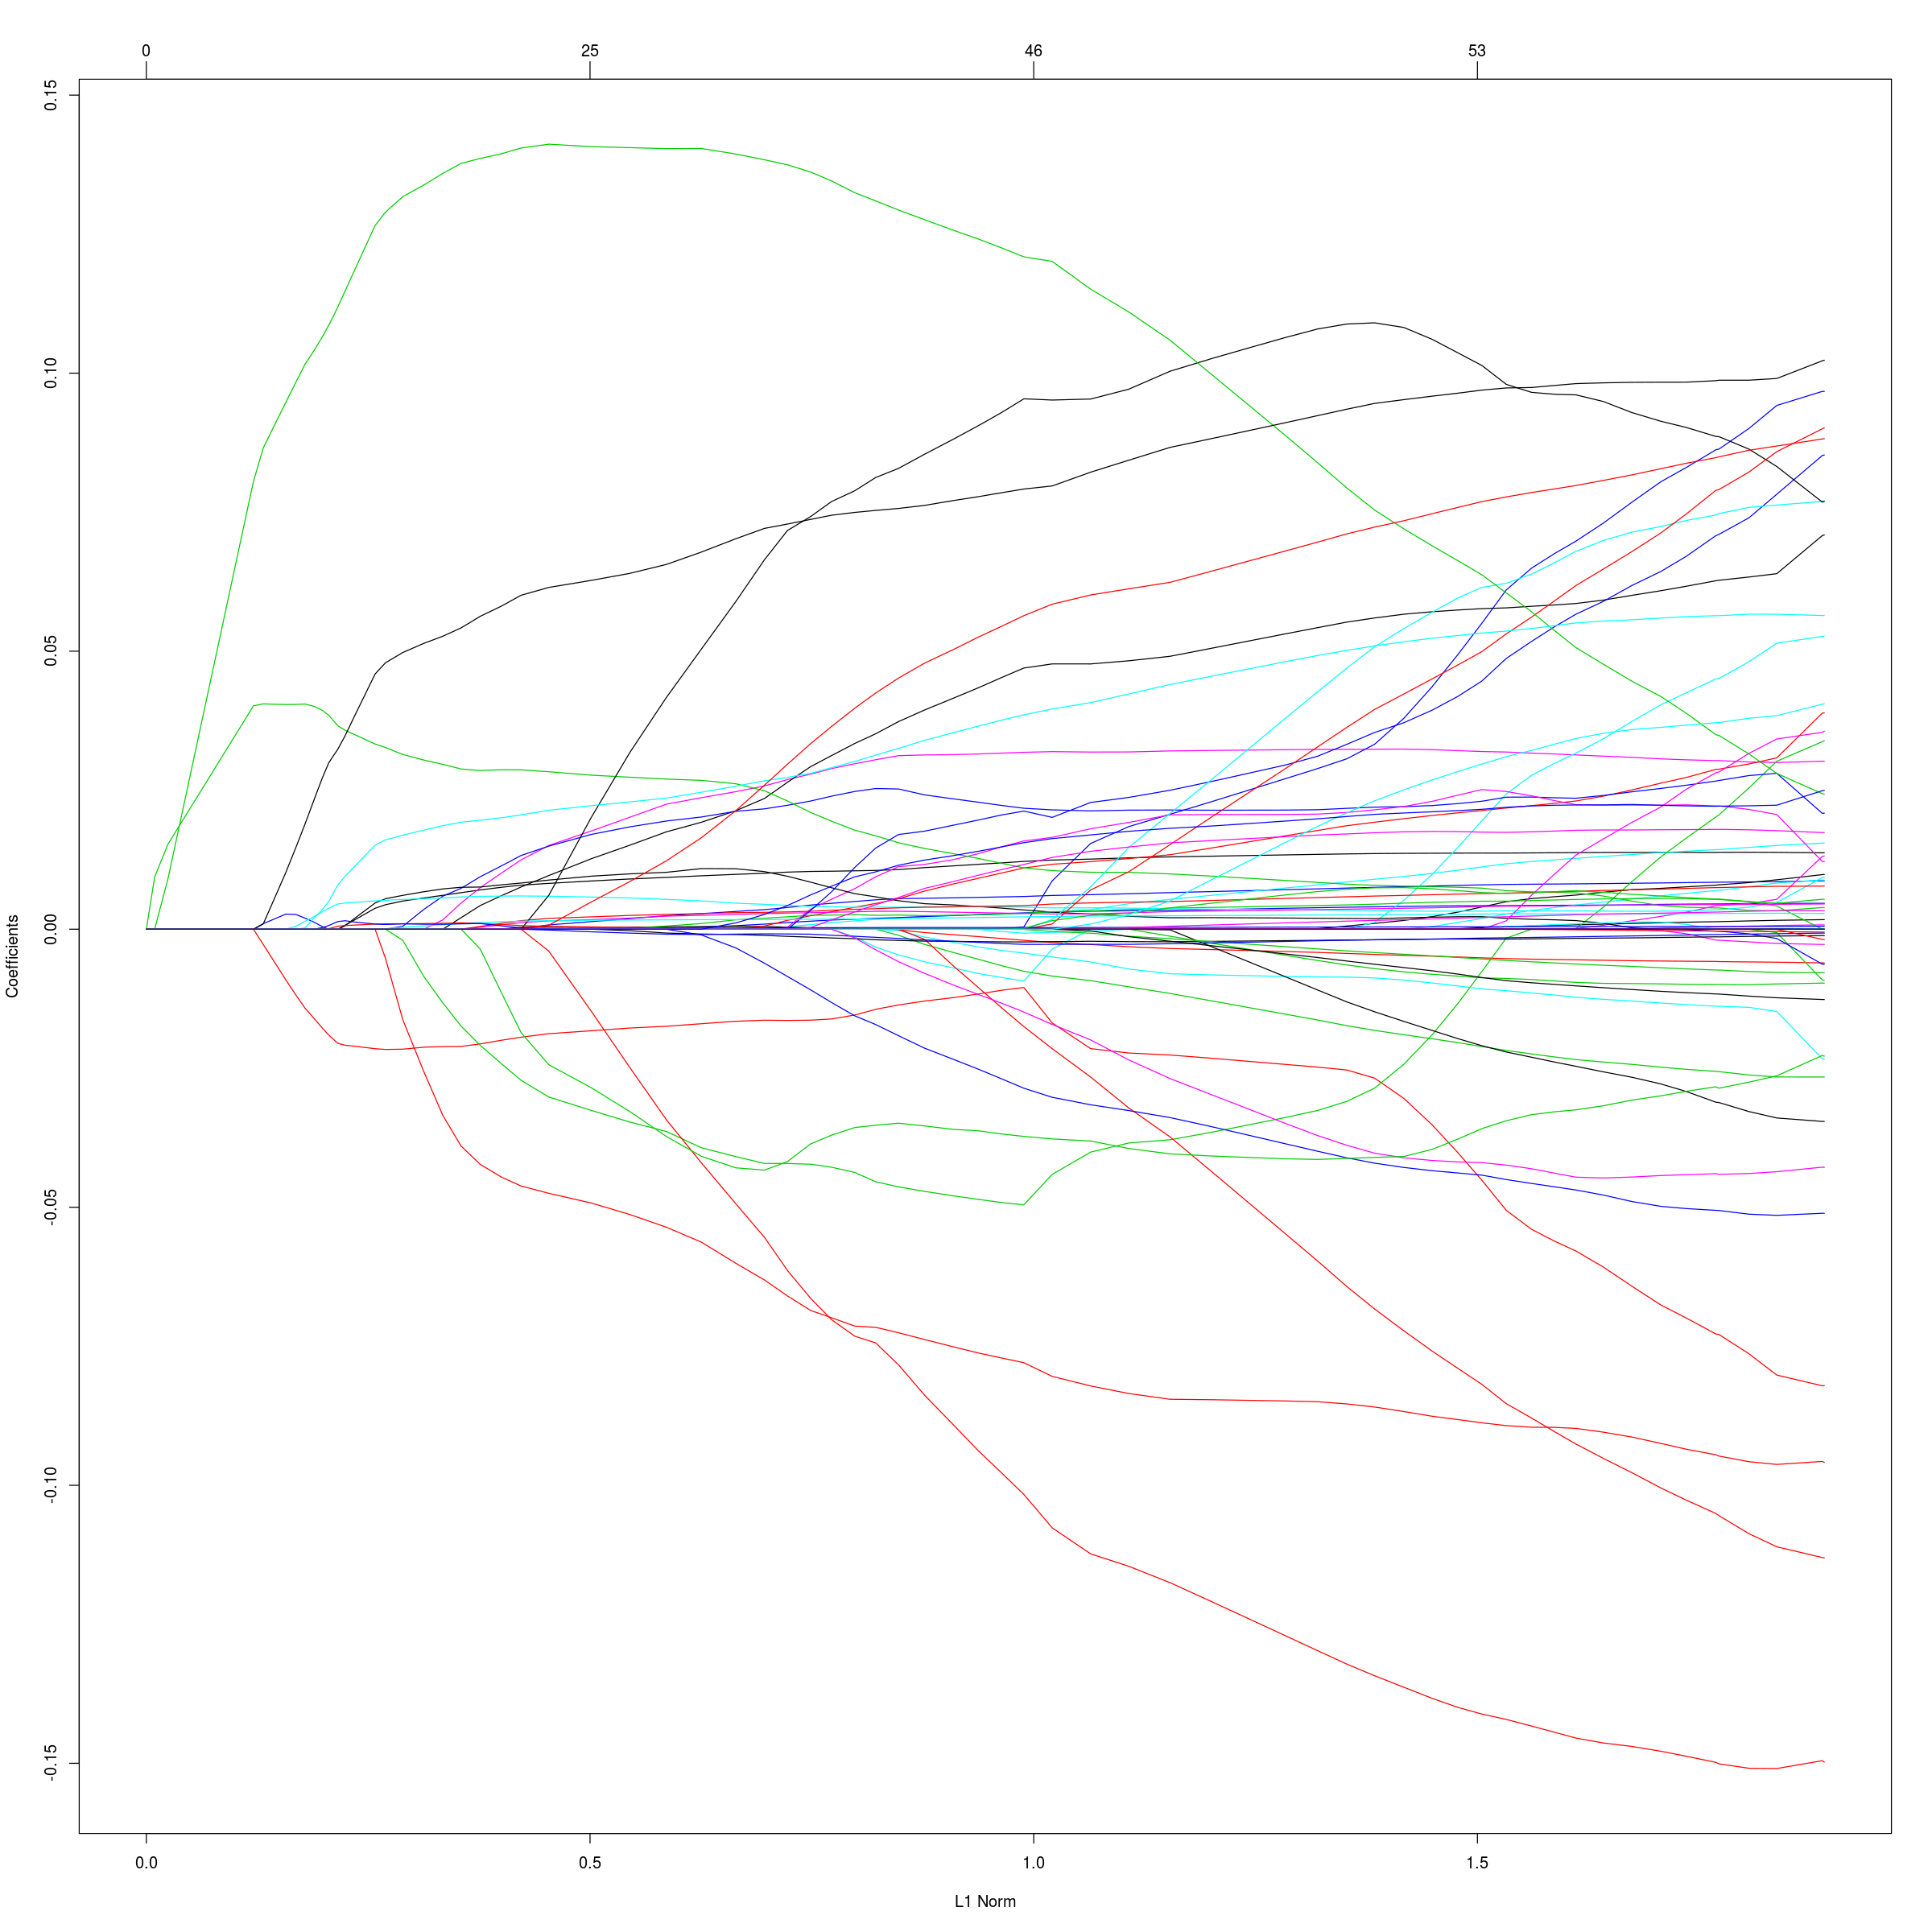

In [30]:
plot(m_lasso)

#### Cross validation

In [201]:
cv.out <- cv.glmnet(as.matrix(data), data_tot$Rating, alpha = 1)
cv.out_buts <- cv.glmnet(as.matrix(data_but), data_tot$Rating, alpha = 1)

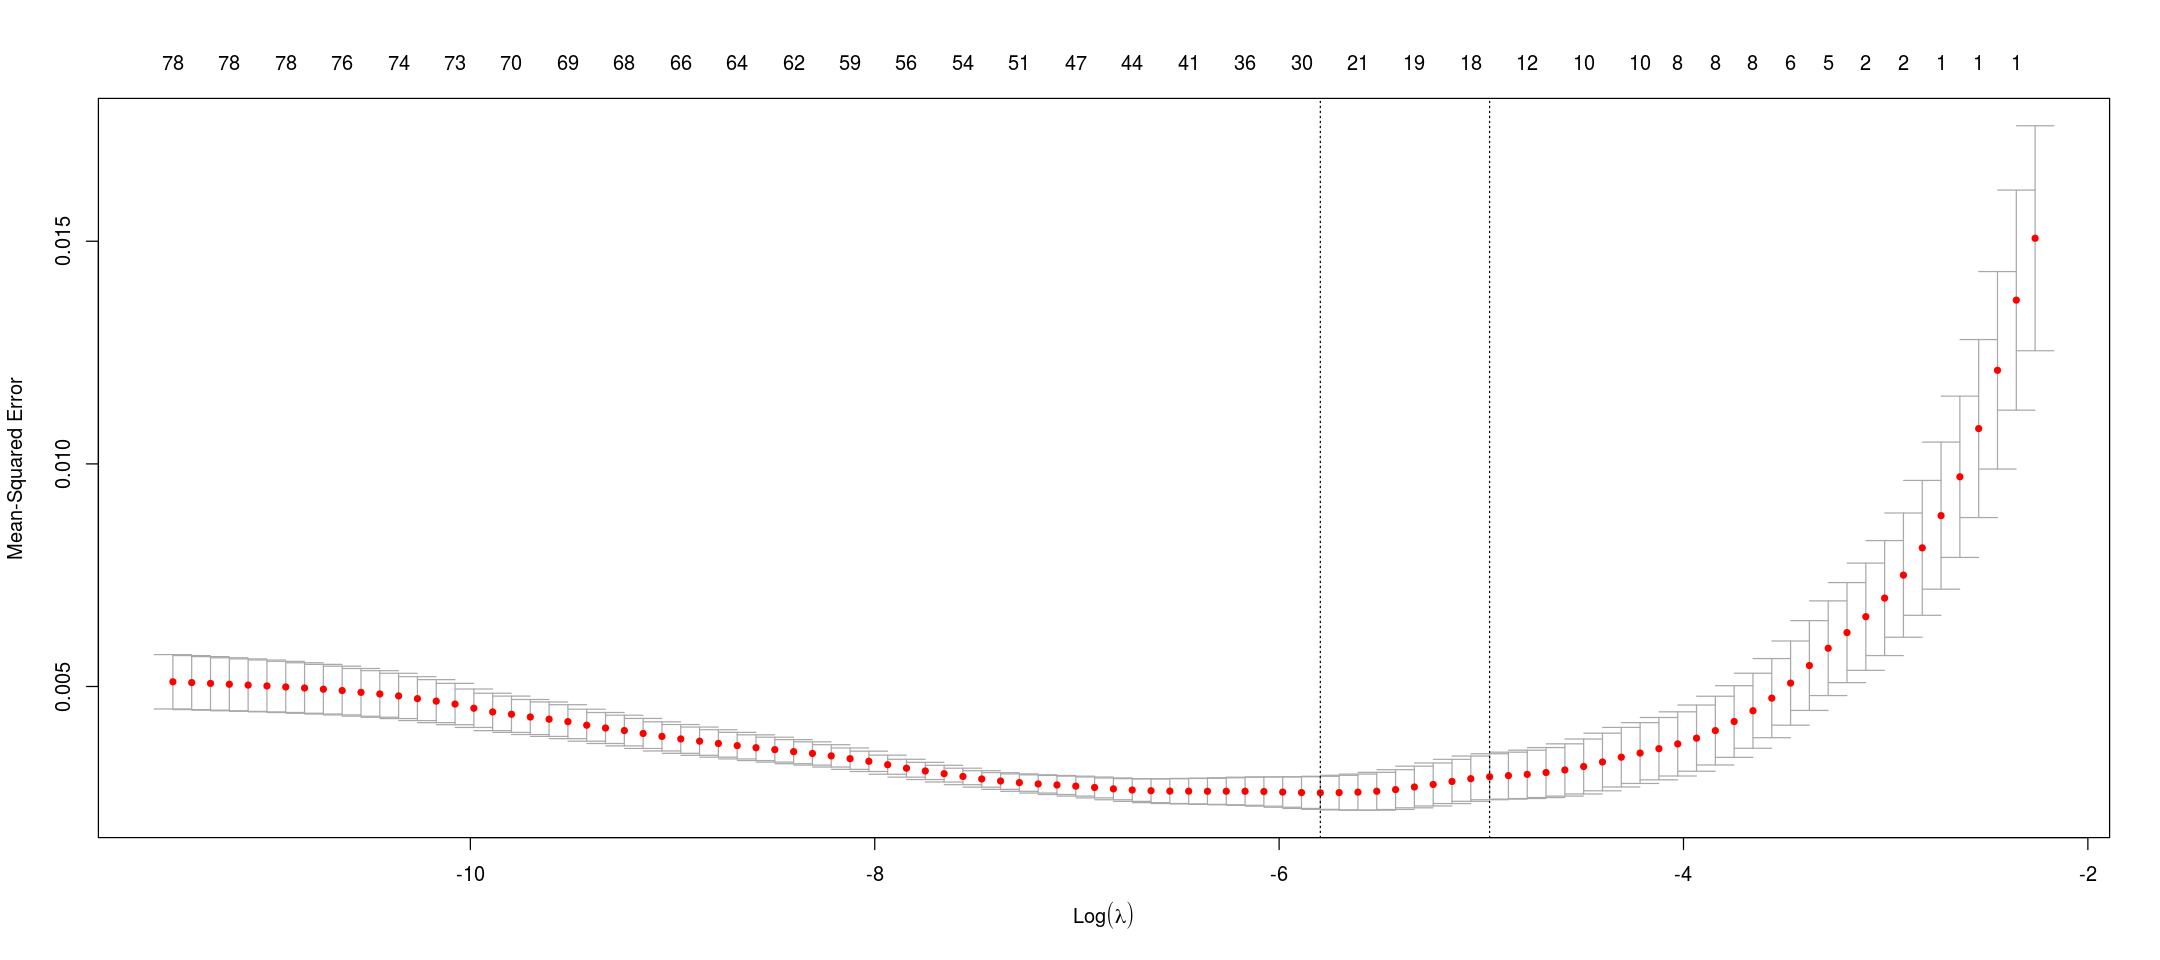

In [75]:
plot(cv.out)

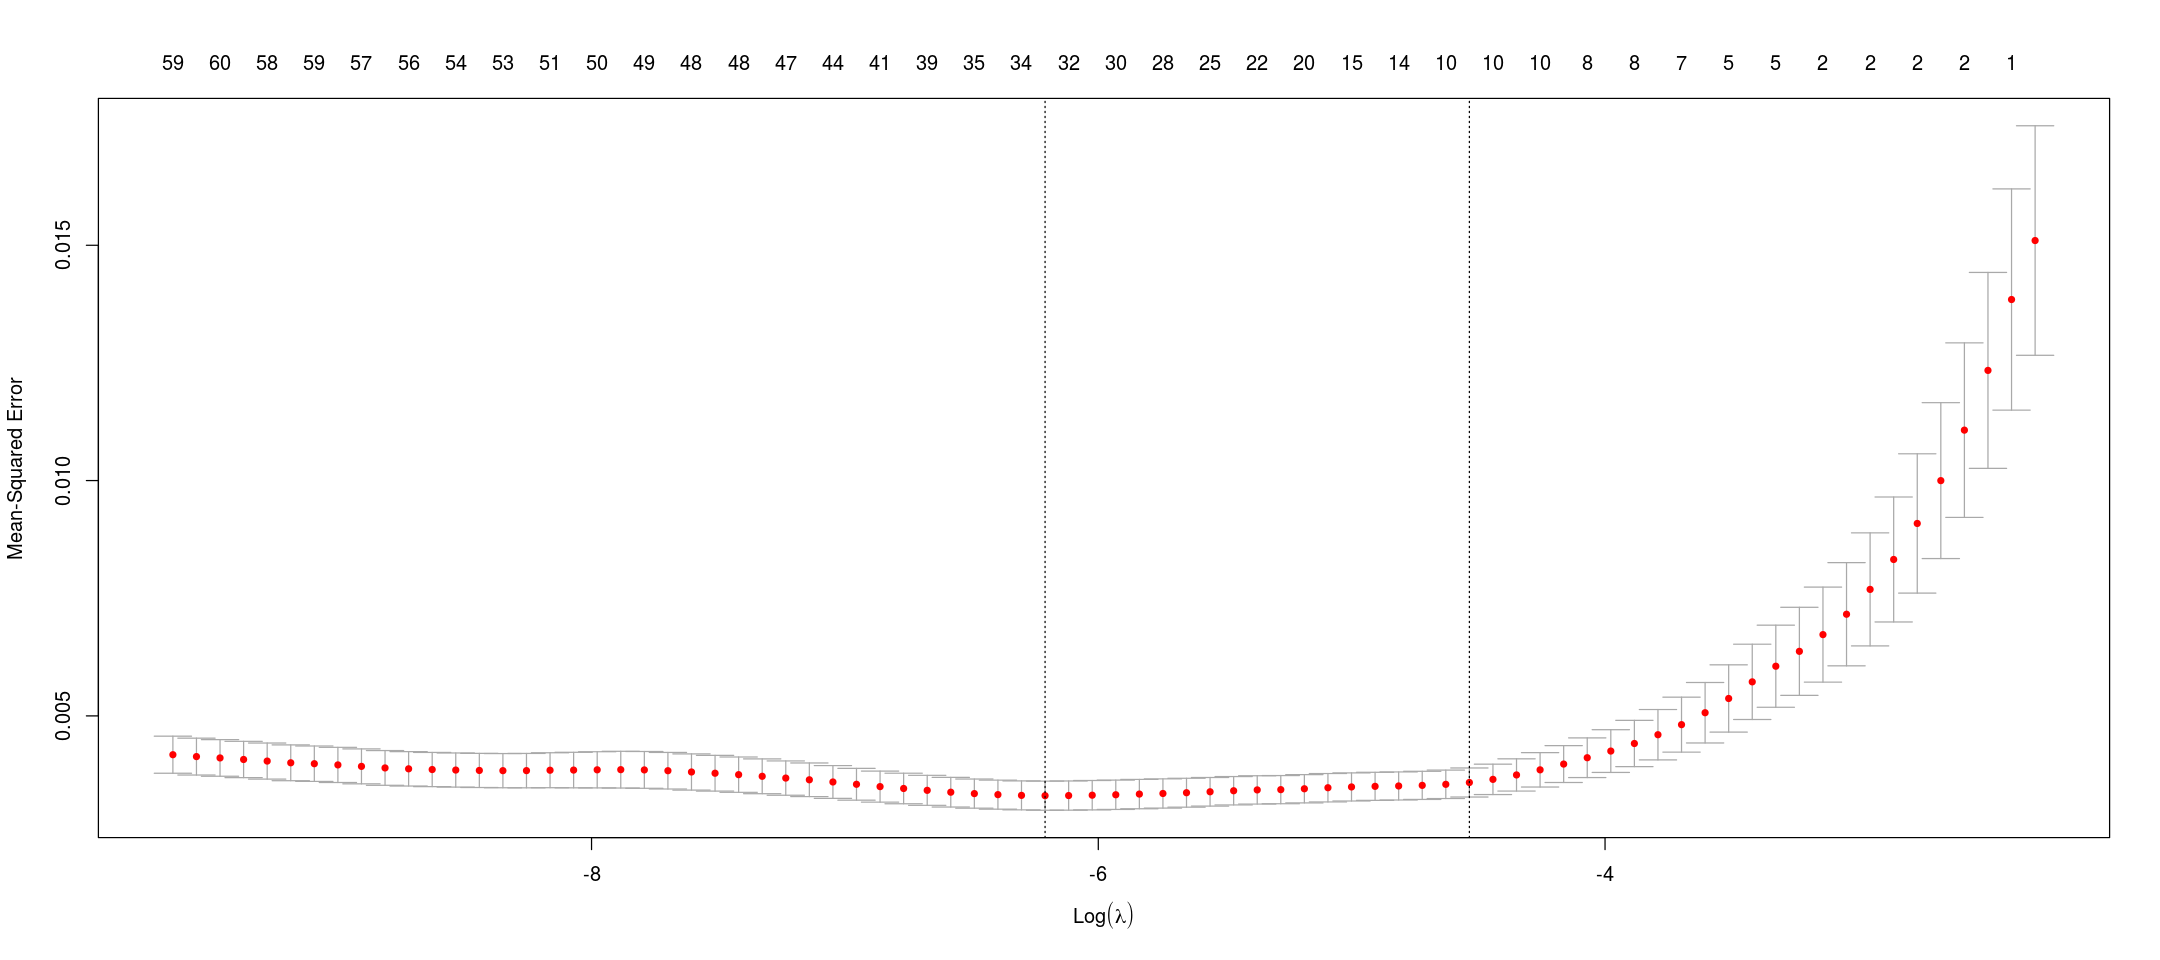

In [202]:
plot(cv.out_buts)

In [203]:
bestlam <- cv.out$lambda.min
bestlam_buts <- cv.out_buts$lambda.min

In [79]:
lasso.predict = predict(m_lasso, type = "coefficients", s = bestlam)
lasso.predict

81 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                        5.923543e+00
Tackles_TotalTackles               8.591899e-03
Tackles_DribbledPast               .           
Tackles_TotalAttemptedTackles      .           
Interception_Total                 2.691439e-03
Fouls_Fouled                       .           
Fouls_Fouls                        .           
Cards_Yellow                       .           
Cards_Red                         -2.645718e-02
OffSides_CaughtOffside             .           
Clearances_Total                   8.119083e-06
Blocks_ShotsBlocked               -2.323970e-04
Blocks_CrossesBlocked              2.433426e-02
Blocks_PassesBlocked               2.956173e-03
Saves_Total                       -1.841223e-02
Saves_SixYardBox                  -1.985603e-02
Saves_PenaltyArea                  .           
Saves_OutOfBox                     .           
Shots_Total                        .          

In [98]:
lasso.summary = summary(lasso.predict)

In [144]:
for (i in 1:(length(lasso.summary[,1])-1)){
    df.variables.rating$Lasso[i] = round(lasso.summary[i+1,3],3)
}

In [205]:
lasso.predict_buts = predict(m_lasso, type = "coefficients", s = bestlam_buts)
lasso.predict_buts
lasso.summary_buts = summary(lasso.predict_buts)

81 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                        5.7904418006
Tackles_TotalTackles               0.0090094057
Tackles_DribbledPast               .           
Tackles_TotalAttemptedTackles      .           
Interception_Total                 0.0052996713
Fouls_Fouled                       0.0015531506
Fouls_Fouls                       -0.0003435488
Cards_Yellow                       .           
Cards_Red                         -0.0442548174
OffSides_CaughtOffside             .           
Clearances_Total                   0.0012580359
Blocks_ShotsBlocked               -0.0022144444
Blocks_CrossesBlocked              0.0274116414
Blocks_PassesBlocked               0.0025637203
Saves_Total                       -0.0168282272
Saves_SixYardBox                  -0.0231428742
Saves_PenaltyArea                  .           
Saves_OutOfBox                     .           
Shots_Total                        .          

In [206]:
for (i in 1:(length(lasso.summary_buts[,1])-1)){
    df.variables.buts$Lasso[i] = round(lasso.summary_buts[i+1,3],3)
}

Les variables qu'il semble intéressant de retenir, d'après le modèle de régression Lasso, pour l'ensemble des données, sont :   
Tackles_TotalTackles ; Interception_Total ; Cards_Red ; Blocks_CrossesBlocked ;
Blocks_PassesBlocked ; Saves_Total ; Saves_SixYardBox ; shotsSituations_Counter ; ShotsAccuracy_OffTarget ;
GoalsZones_PenaltyArea ; GoalsSituations_PenaltyScored ; GoalsSituations_Own ; GoalsSituations_Normal ;
Dribbles_Total ; PossesionLoss_UnsuccessfulTouches ; Aerial_Won ; PassesLength_Total ; PassesLength_AccLB ; 
PassesType_AccCrn ; KeyPassesLength_Short ; KeyPassesType_Throughball

## Régression RIDGE

In [25]:
m_ridge = glmnet(as.matrix(data), data_tot$Rating, alpha = 0, nlambda = 100)

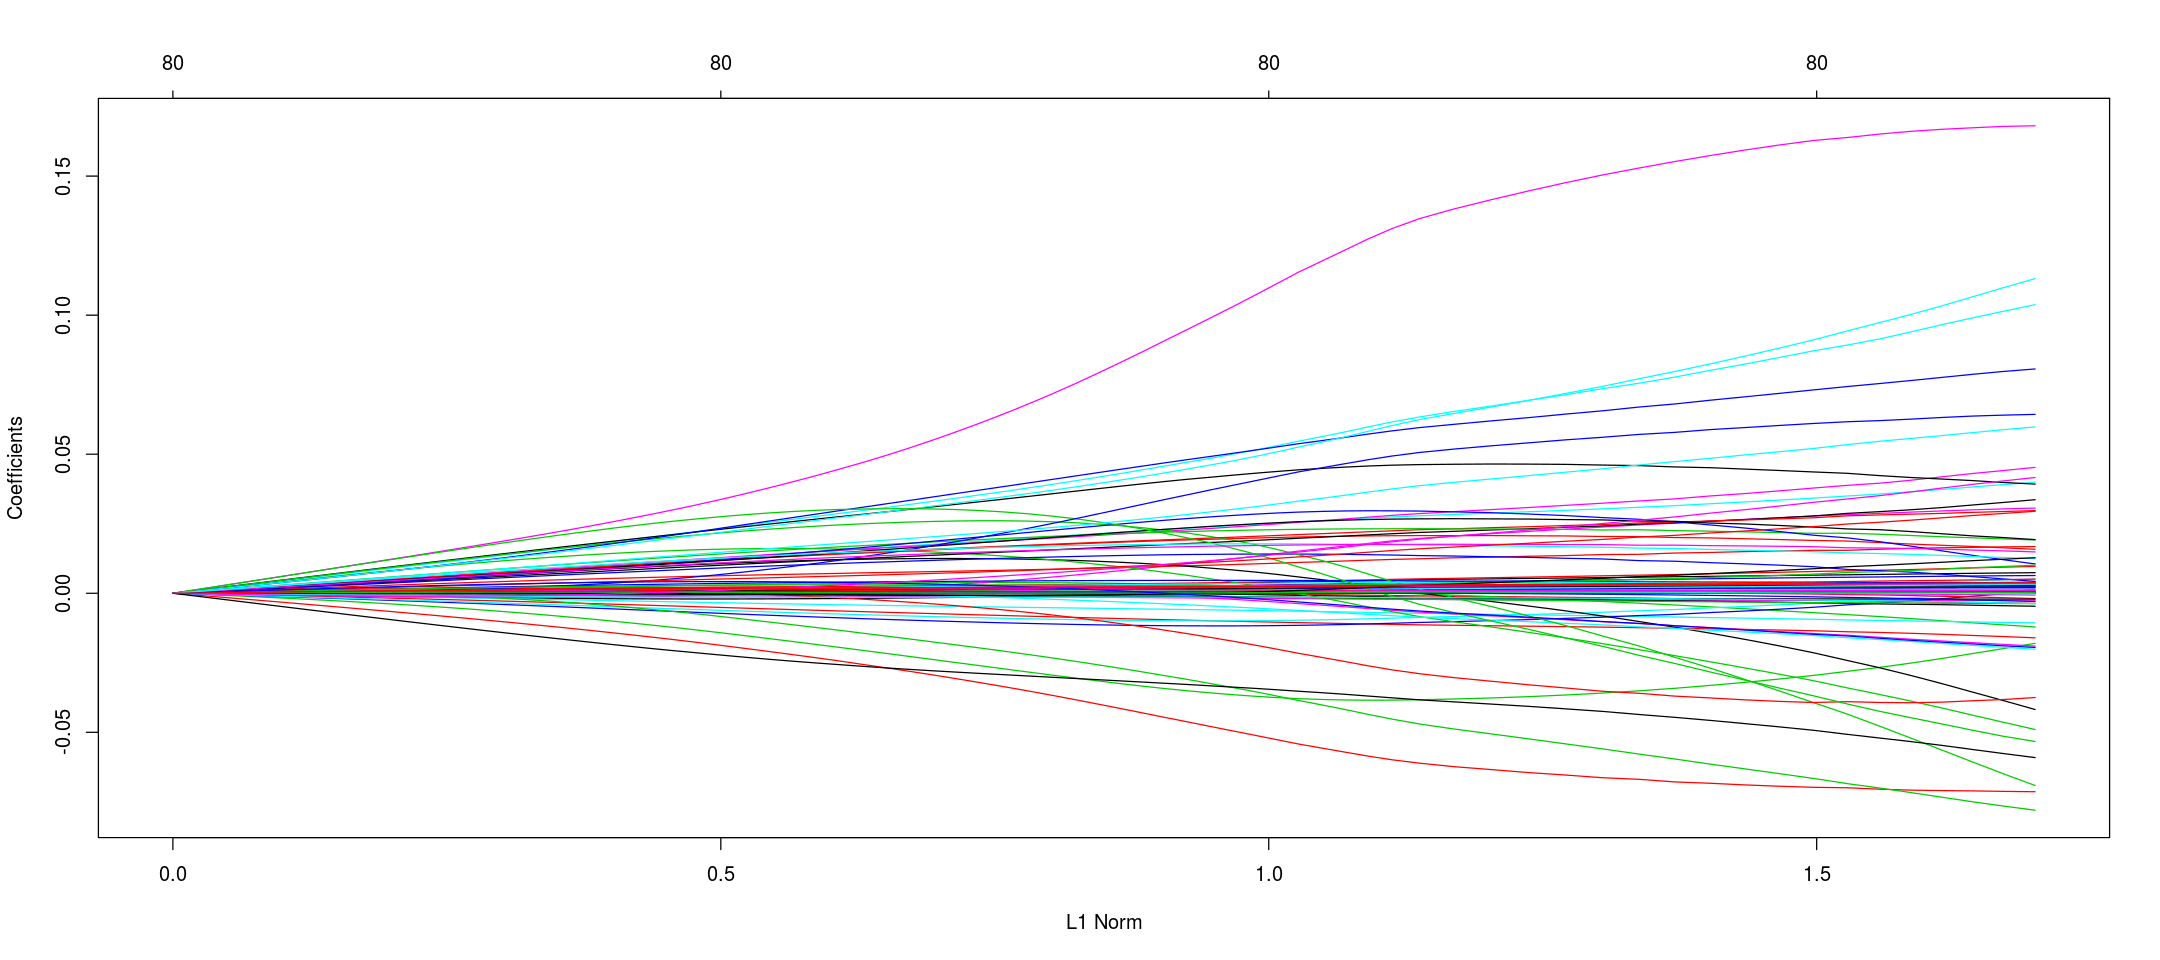

In [26]:
plot(m_ridge)

#### Cross validation

In [27]:
ridge.out <- cv.glmnet(as.matrix(data), data_tot$Rating, alpha = 0)

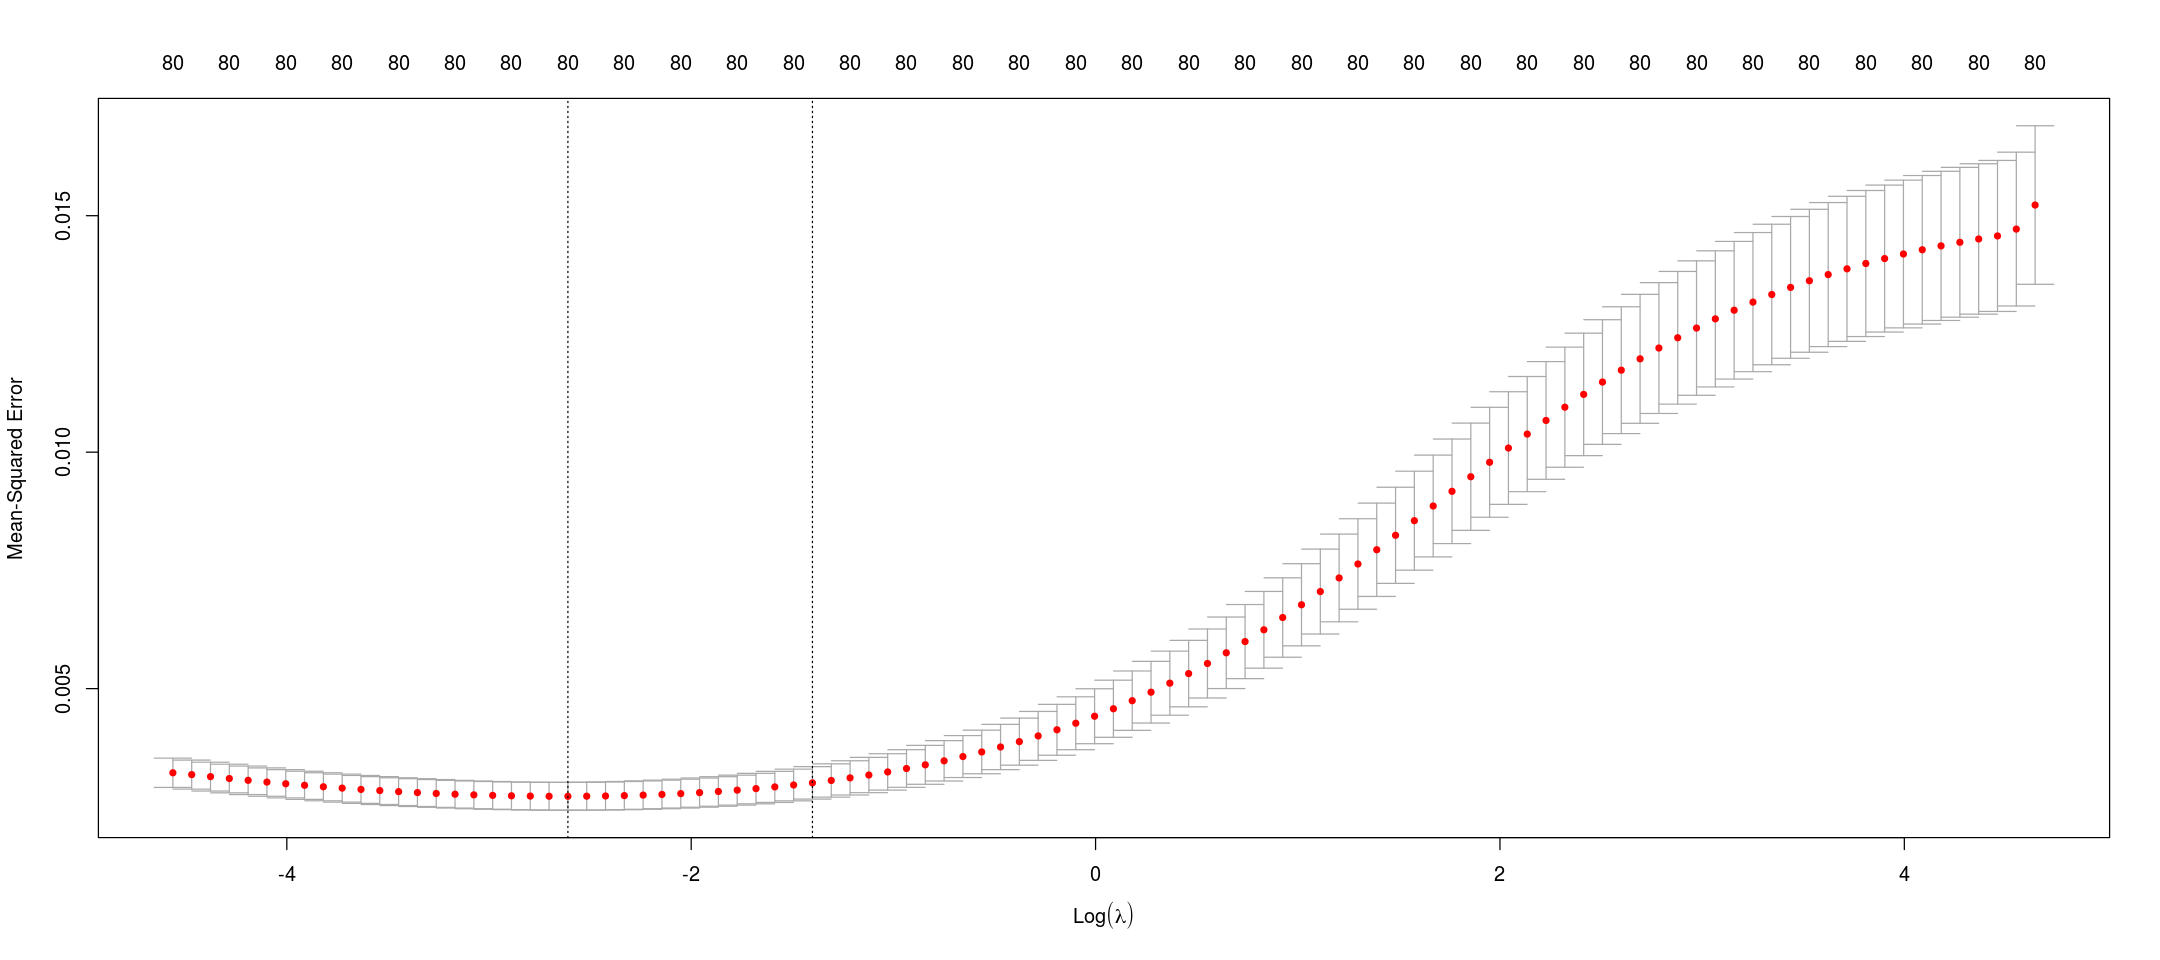

In [28]:
plot(ridge.out)

In [29]:
bestlam_ridge <- ridge.out$lambda.min

In [30]:
p = predict(m_ridge, type = "coefficients", s = bestlam_ridge)

In [31]:
print(p)

81 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                        5.981177e+00
Tackles_TotalTackles               4.410263e-03
Tackles_DribbledPast              -6.013182e-04
Tackles_TotalAttemptedTackles      1.761406e-03
Interception_Total                 3.478537e-03
Fouls_Fouled                       1.162976e-03
Fouls_Fouls                       -2.046655e-03
Cards_Yellow                       8.937595e-04
Cards_Red                         -5.714931e-02
OffSides_CaughtOffside             1.102189e-03
Clearances_Total                   1.029212e-03
Blocks_ShotsBlocked               -6.732611e-03
Blocks_CrossesBlocked              1.701385e-02
Blocks_PassesBlocked               2.567570e-03
Saves_Total                       -1.088090e-02
Saves_SixYardBox                  -3.837601e-02
Saves_PenaltyArea                 -1.122344e-02
Saves_OutOfBox                    -9.395004e-03
Shots_Total                        1.096734e-0

Ici c'est beaucoup moins évident de faire de la sélection de variables : les coefficients ne s'annulent pas. Certains sont cependant très petits ($1e-4$).  
Si on ne souhaite garder que celles dont le coefficient est au moins de l'ordre de $10^{-2}$, on peut citer :  

(ancienne version erreur)  
Cards_Red ; OffSides_CaughtOffside ; Blocks_ShotsBlocked ; Blocks_CrossesBlocked ; Saves_Total ; Saves_SixYardBox ;
ShotsZones_SixYardBox ; shotsSituations_Counter ; ShotsSituations_SetPiece ; ShotsSituations_PenaltyTaken ; ShotsAccuracy_OnPost ; ShotsAccuracy_Blocked ; ShotsBodyParts_Other ; GoalsZones_SixYardBox ; GoalsZones_PenaltyArea              ; GoalsZones_OutOfBox ; GoalsSituations_OpenPlay ; GoalsSituations_Counter ; GoalsSituations_SetPiece ; 
GoalsSituations_PenaltyScored ; GoalsSituations_Own ; GoalsSituations_Normal ; GoalsBodyParts_RightFoot ; GoalsBodyParts_LeftFoot ; GoalsBodyParts_Head ; Assists_Cross ; Assists_Corner ; Assists_Throughball ; Assists_Freekick ; Assists_Other ; Assists_Total ; PassesType_AccCrn ; PassesType_InAccCrn ; KeyPassesLength_Long ; KeyPassesType_Corner ; KeyPassesType_Throughball ; KeyPassesType_Freekick ; KeyPassesType_Throwin

correction :  
Cards_Red ; ShotsBodyParts_Other ; Saves_SixYardBox ; KeyPassesType_Throwin ; Assists_Corner ; Saves_Total ;
Saves_PenaltyArea ;
ShotsZones_SixYardBox ; Goals_Total ; PassesType_AccCrn ; Assists_Other ; Assists_Total ; KeyPassesType_Freekick ; Blocks_CrossesBlocked ; GoalsSituations_OpenPlay ; GoalsSituations_Normal ; GoalsBodyParts_RightFoot ;  GoalsBodyParts_LeftFoot ; Assists_Cross ; shotsSituations_Counter ; GoalsZones_PenaltyArea ; GoalsBodyParts_Head ;  KeyPassesType_Throughball ; GoalsZones_OutOfBox ; Assists_Freekick ; GoalsSituations_SetPiece  ; GoalsSituations_PenaltyScored ; GoalsZones_SixYardBox ; GoalsSituations_Own

## Régression Elastic Net

In [207]:
m_enet = glmnet(as.matrix(data), data_tot$Rating, alpha = 0.5, nlambda = 100)
m_enet_buts = glmnet(as.matrix(data_but), data_tot$Rating, alpha = 0.5, nlambda = 100)

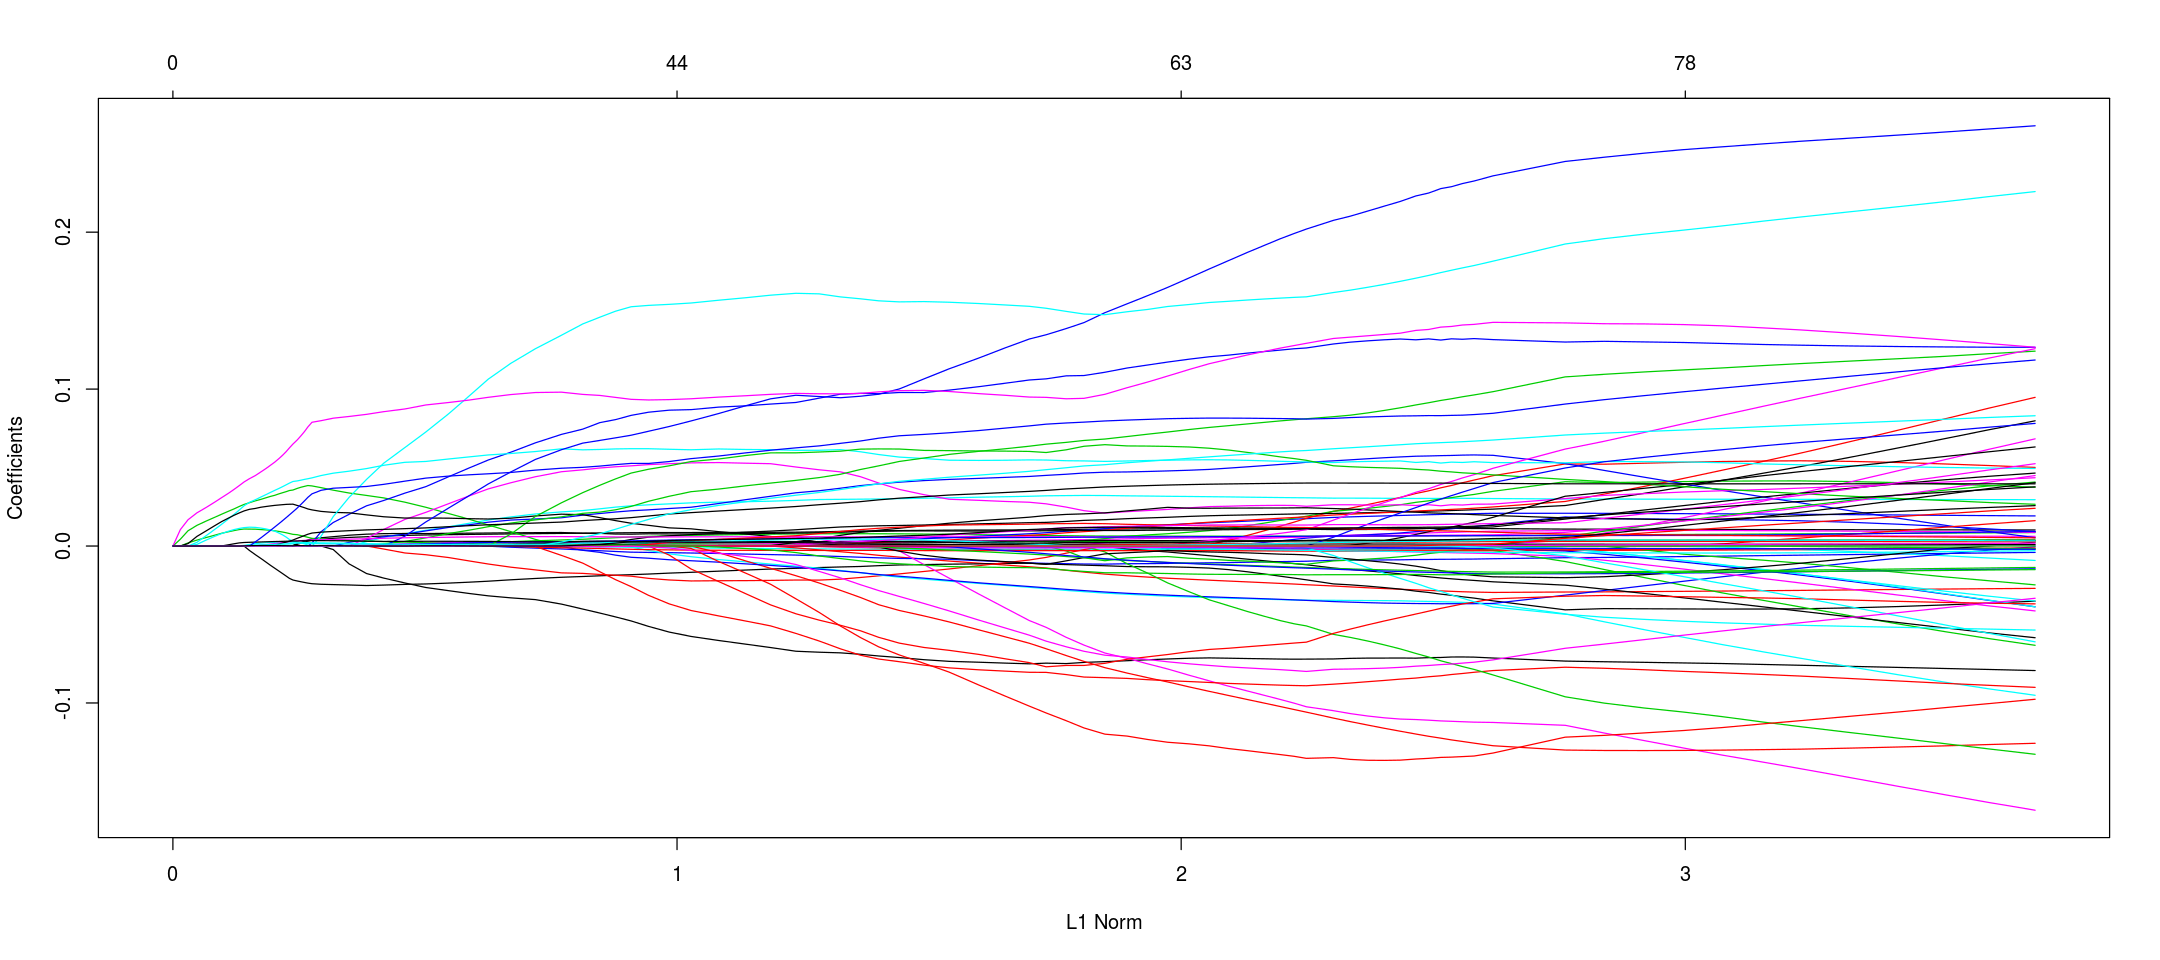

In [104]:
plot(m_enet)

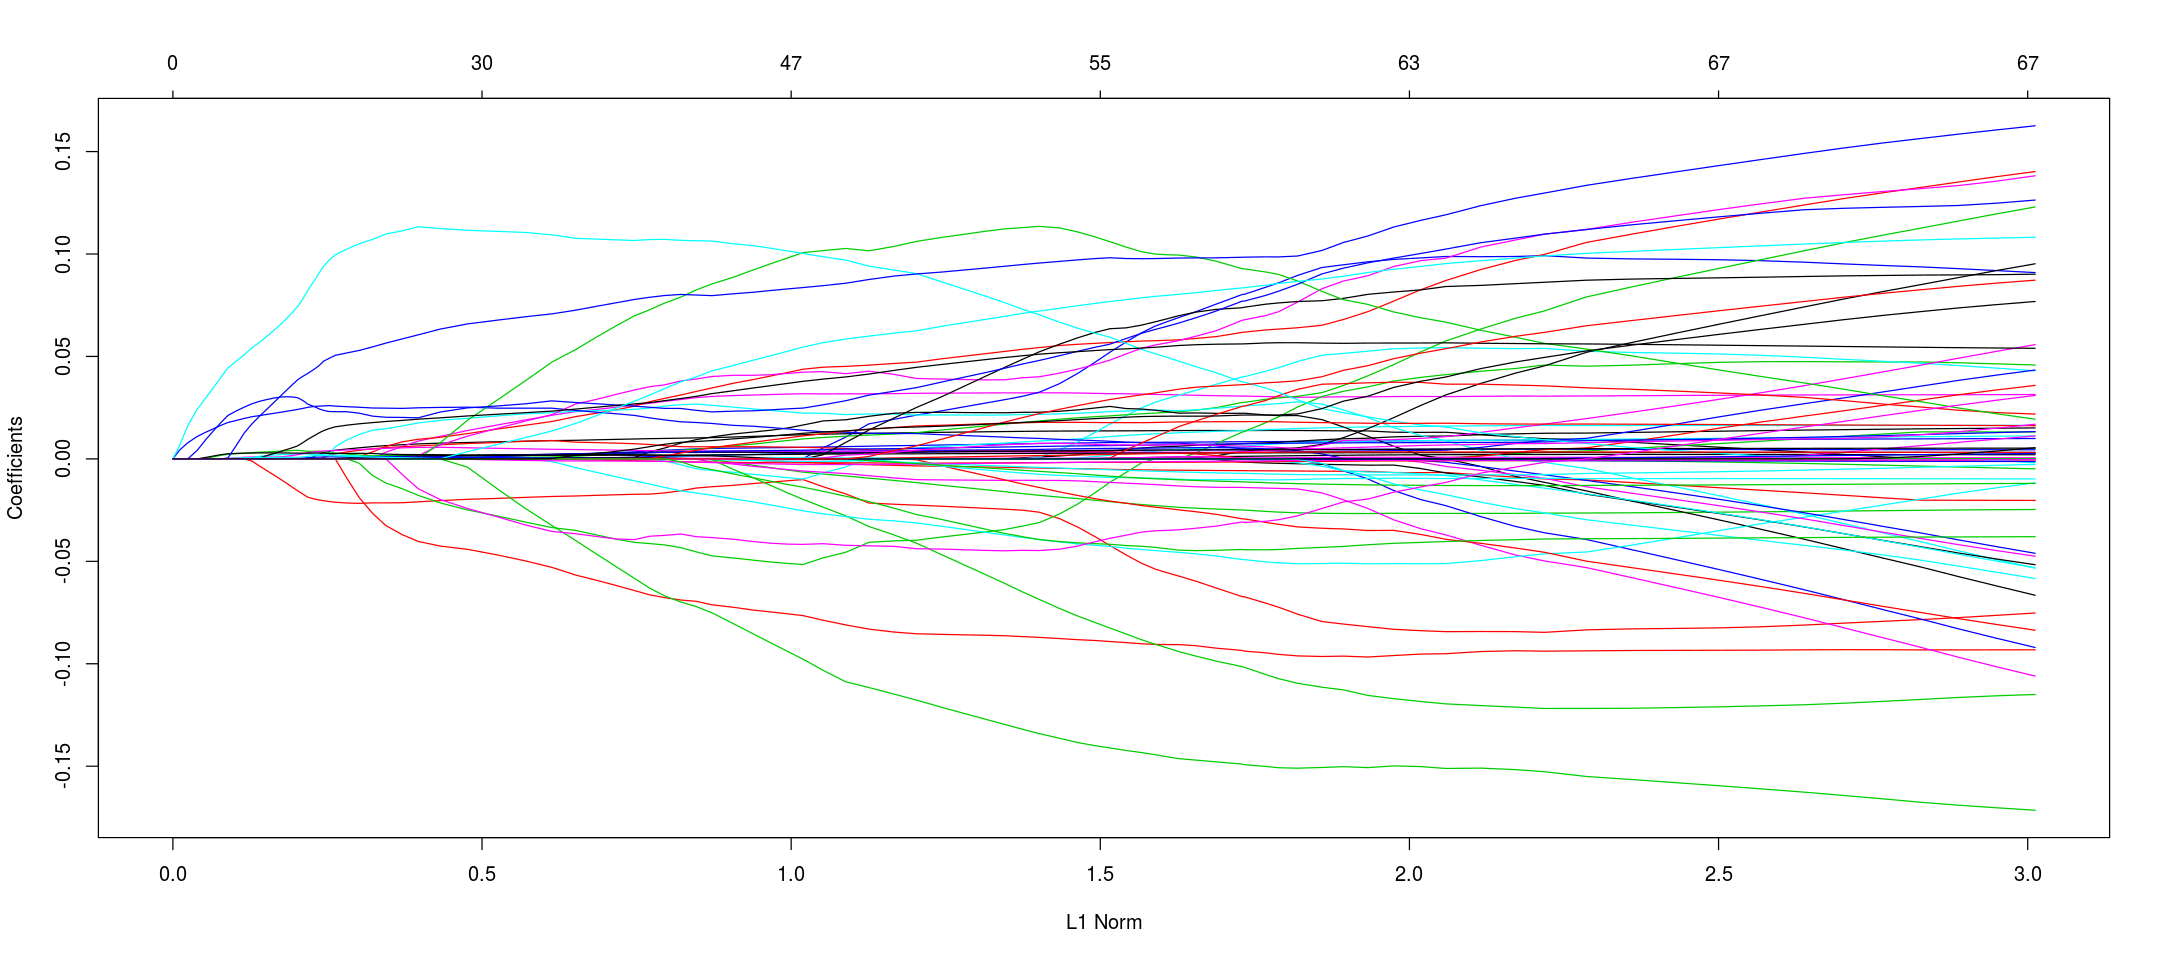

In [208]:
plot(m_enet_buts)

#### Cross validation

In [209]:
enet.out <- cv.glmnet(as.matrix(data), data_tot$Rating, alpha = 0.5)
enet.out_buts <- cv.glmnet(as.matrix(data_but), data_tot$Rating, alpha = 0.5)

In [210]:
bestlam_enet <- enet.out$lambda.min
bestlam_enet_buts <- enet.out_buts$lambda.min

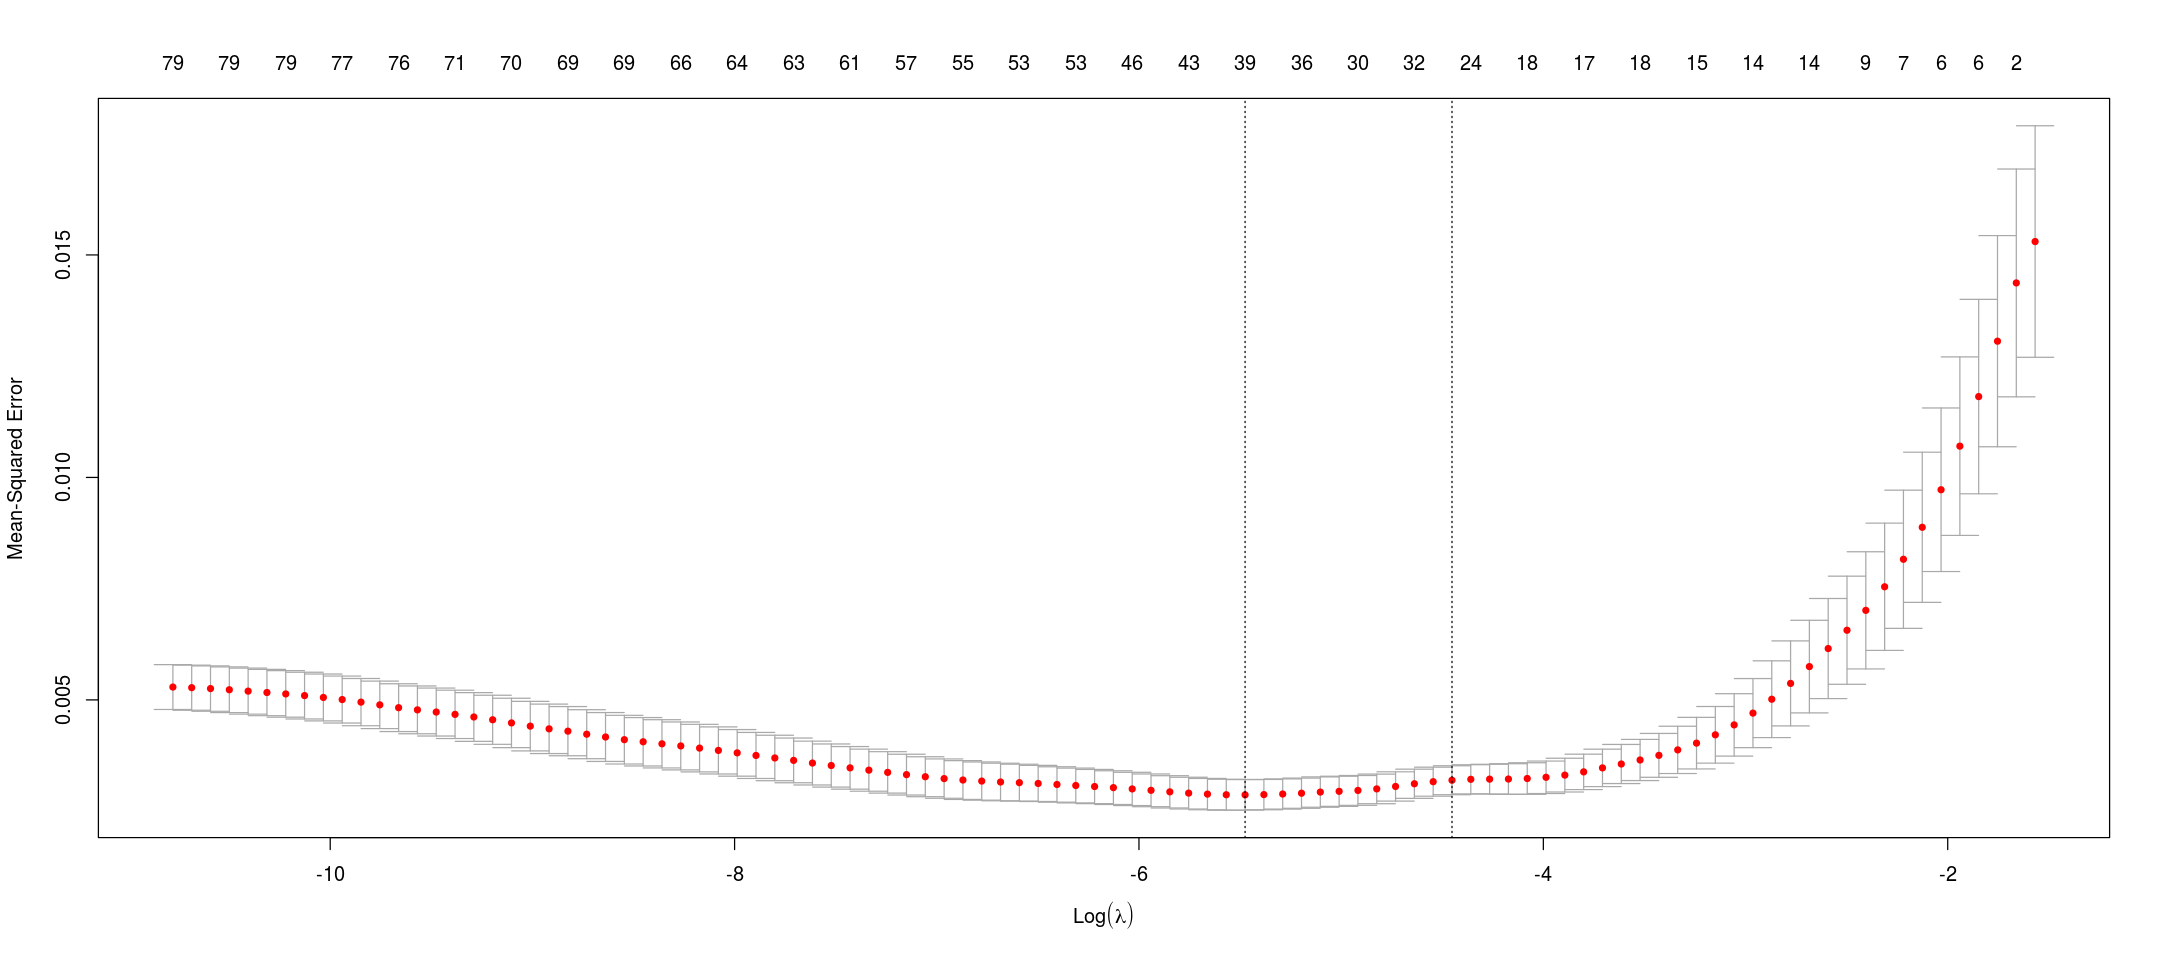

In [211]:
plot(enet.out)

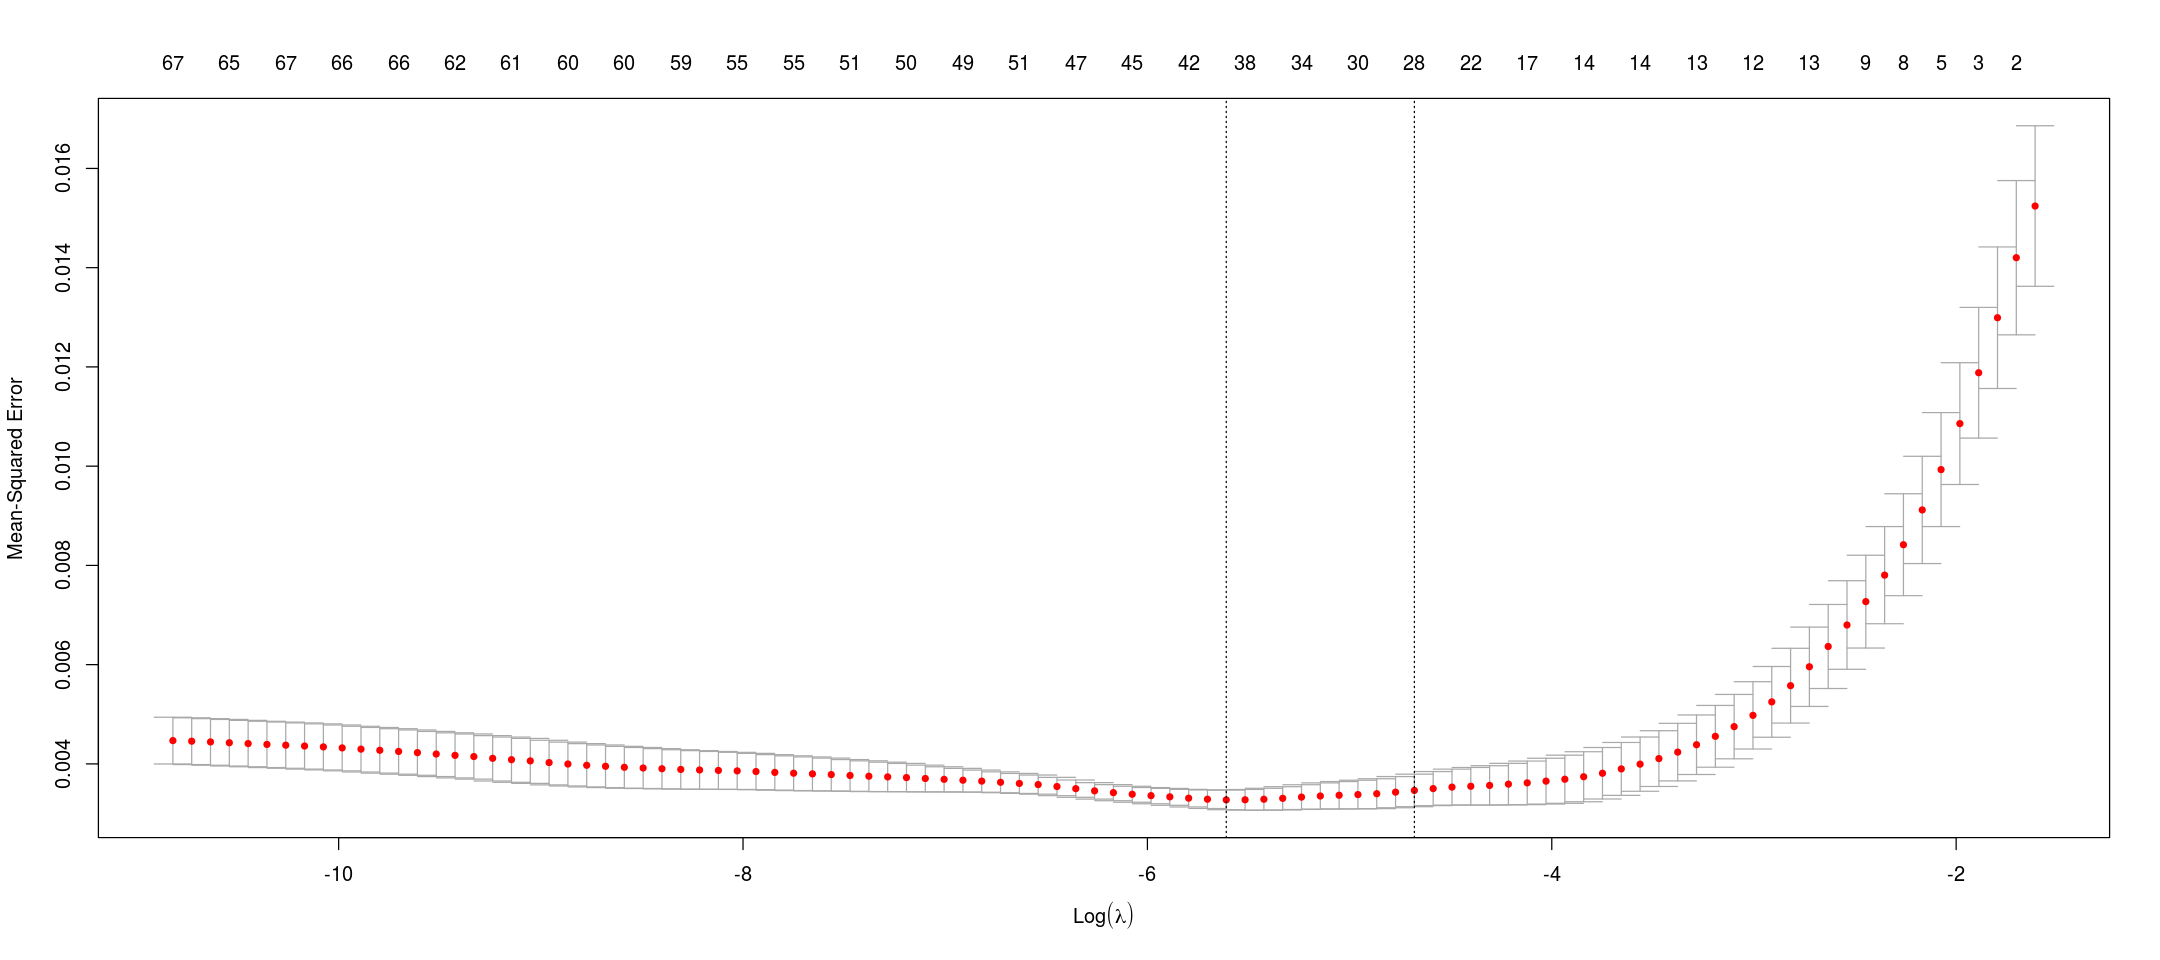

In [212]:
plot(enet.out_buts)

In [109]:
elasticnet.predict = predict(m_enet, type = "coefficients", s = bestlam_enet)
elasticnet.predict

81 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                        5.906294e+00
Tackles_TotalTackles               8.173276e-03
Tackles_DribbledPast               .           
Tackles_TotalAttemptedTackles      .           
Interception_Total                 4.316584e-03
Fouls_Fouled                       1.539804e-04
Fouls_Fouls                       -4.545574e-04
Cards_Yellow                       .           
Cards_Red                         -4.016499e-02
OffSides_CaughtOffside             .           
Clearances_Total                   5.258637e-04
Blocks_ShotsBlocked               -2.506798e-03
Blocks_CrossesBlocked              2.259881e-02
Blocks_PassesBlocked               2.547240e-03
Saves_Total                       -1.940960e-02
Saves_SixYardBox                  -1.742367e-02
Saves_PenaltyArea                  .           
Saves_OutOfBox                     .           
Shots_Total                        .          

In [113]:
elasticnet.summary = summary(elasticnet.predict)

In [145]:
for (i in 1:(length(elasticnet.summary[,1])-1)){
    df.variables.rating$ElasticNet[i] = round(elasticnet.summary[i+1,3],3)
}

In [213]:
elasticnet.predict_buts = predict(m_enet_buts, type = "coefficients", s = bestlam_enet_buts)
elasticnet.predict_buts

68 x 1 sparse Matrix of class "dgCMatrix"
                                              1
(Intercept)                        5.740134e+00
Tackles_TotalTackles               9.979375e-03
Tackles_DribbledPast               .           
Tackles_TotalAttemptedTackles      .           
Interception_Total                 4.192576e-03
Fouls_Fouled                       8.875696e-04
Fouls_Fouls                       -9.473480e-05
Cards_Yellow                       .           
Cards_Red                         -6.772597e-02
OffSides_CaughtOffside             .           
Clearances_Total                   1.326448e-03
Blocks_ShotsBlocked                .           
Blocks_CrossesBlocked              2.809643e-02
Blocks_PassesBlocked               5.131215e-04
Saves_Total                       -1.661553e-02
Saves_SixYardBox                  -4.200181e-02
Saves_PenaltyArea                  .           
Saves_OutOfBox                    -9.829236e-04
Shots_Total                        .          

In [214]:
elasticnet.summary_buts = summary(elasticnet.predict_buts)
for (i in 1:(length(elasticnet.summary_buts[,1])-1)){
    df.variables.buts$ElasticNet[i] = round(elasticnet.summary_buts[i+1,3],3)
}

# Variable à expliquer = nombre de buts sur la totalité des matches

On fait le choix d'expliquer, en utilisant une régression de Poisson le nombre de buts marqués par une équipe sur 100 matches. Ce choix a été fait car une regression de Poisson permet d'expliquer une variable de comptage, donc entière. Or, on dispose des moyennes de buts marqués par match, ce qui est logique car tous les championnats n'ont pas autant de matches. Cependant, cette moyenne n'est pas un nombre entier. On va donc multiplier par le nombre de matches joués les moyennes empiriques de buts par saison par équipe.

In [148]:
buts = trunc(data_tot$Goals_Total * data_tot$Nombre)

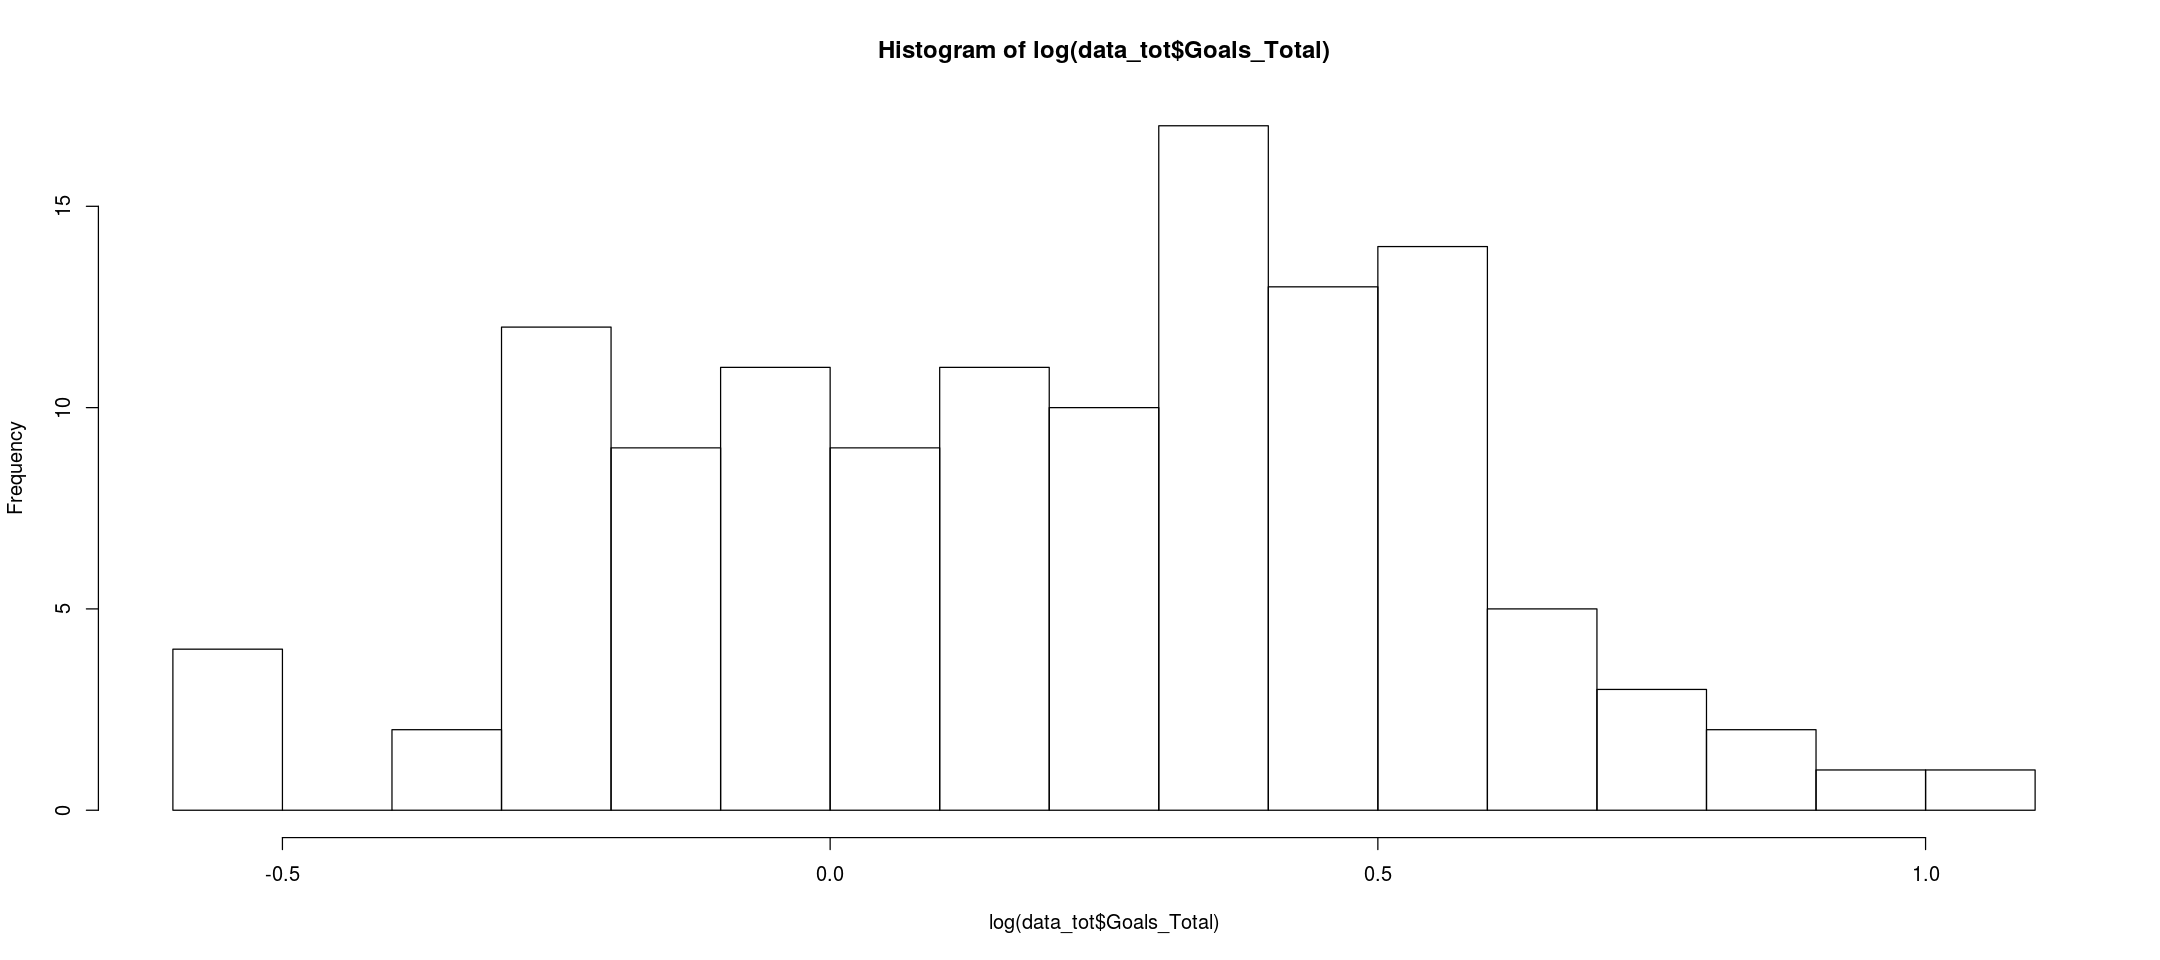

In [149]:
hist(log(data_tot$Goals_Total), breaks=12)

On peut assimiler le log de la variable `Buts` à la répartition d'une loi normale.

In [150]:
data_but = data_tot[,-c(34:46,81,82,83,84)]

In [151]:
fit.add = glm(buts~. , data=data_but, family=poisson)

In [152]:
s = step(fit.add)

Start:  AIC=879.7
buts ~ Tackles_TotalTackles + Tackles_DribbledPast + Tackles_TotalAttemptedTackles + 
    Interception_Total + Fouls_Fouled + Fouls_Fouls + Cards_Yellow + 
    Cards_Red + OffSides_CaughtOffside + Clearances_Total + Blocks_ShotsBlocked + 
    Blocks_CrossesBlocked + Blocks_PassesBlocked + Saves_Total + 
    Saves_SixYardBox + Saves_PenaltyArea + Saves_OutOfBox + Shots_Total + 
    ShotsZones_OutOfBox + ShotsZones_SixYardBox + ShotsZones_PenaltyArea + 
    ShotsSituations_OpenPlay + shotsSituations_Counter + ShotsSituations_SetPiece + 
    ShotsSituations_PenaltyTaken + ShotsAccuracy_OffTarget + 
    ShotsAccuracy_OnPost + ShotsAccuracy_OnTarget + ShotsAccuracy_Blocked + 
    ShotsBodyParts_RightFoot + ShotsBodyParts_LeftFoot + ShotsBodyParts_Head + 
    ShotsBodyParts_Other + Dribbles_Unsuccessful + Dribbles_Successful + 
    Dribbles_Total + PossesionLoss_UnsuccessfulTouches + PossesionLoss_Dispossessed + 
    Aerial_Total + Aerial_Won + Aerial_Lost + Assists_Cross +

In [153]:
s$coefficients

(Intercept)              Tackles_TotalTackles 
                     2.3045256145                      0.0256914764 
              Blocks_ShotsBlocked              Blocks_PassesBlocked 
                     0.0926843496                     -0.0547146702 
                      Saves_Total                    Saves_OutOfBox 
                     0.1132539226                     -0.3713035845 
                      Shots_Total             ShotsZones_SixYardBox 
                     0.1014323057                      0.1341132324 
     ShotsSituations_PenaltyTaken           ShotsAccuracy_OffTarget 
                     0.6017626122                     -0.2207856703 
             ShotsAccuracy_OnPost PossesionLoss_UnsuccessfulTouches 
                     0.2527402045                     -0.0243267136 
                     Aerial_Total                        Aerial_Won 
                    -0.5923804228                      0.6016611814 
                      Aerial_Lost                     Assists_Cross 
                     0.5908862246                      0.4761685378 
              Assists_Throughball                     Assists_Other 
                     0.9685361588                      0.6077813273 
               PassesLength_Total                PassesLength_AccLB 
                    -0.0006408683                      0.0079221539 
                PassesType_AccFrK               KeyPassesType_Cross 
                     0.0434951001                      0.0867929968

In [154]:
data_add_poisson = data.frame(buts, data_tot$Blocks_ShotsBlocked, data_tot$Blocks_PassesBlocked,
                     data_tot$Saves_Total,
                     data_tot$Saves_OutOfBox, data_tot$Shots_Total, 
                     data_tot$ShotsAccuracy_OffTarget, data_tot$Assists_Cross,
                     data_tot$Assists_Throughball, data_tot$Assists_Other, data_tot$PassesLength_Total, 
                     data_tot$PassesType_AccFrK, data_tot$ShotsAccuracy_OnPost,
                     data_tot$Tackles_TotalTackles, data_tot$ShotsZones_SixYardBox, data_tot$ShotsSituations_PenaltyTaken,
                     data_tot$PossesionLoss_UnsuccessfulTouches, data_tot$Aerial_Total, data_tot$Aerial_Won, data_tot$Aerial_Lost,
                     data_tot$PassesLength_AccLB, data_tot$KeyPassesType_Cross)

names(data_add_poisson) <- c("Buts", "Blocks_ShotsBlocked", "Blocks_PassesBlocked", "Saves_Total", 
                     "Saves_OutOfBox", "Shots_Total",
                     "ShotsAccuracy_OffTarget", 
                     "Assists_Cross", "Assists_Throughball", "Assists_Other",
                     "PassesLength_Total", "PassesType_AccFrK", "ShotsAccuracy_OnPost",
                     "Tackles_TotalTackles", "ShotsZones_SixYardBox", "ShotsSituations_PenaltyTaken", 
                     "PossesionLoss_UnsuccessfulTouches", "Aerial_Total", "Aerial_Won", "Aerial_Lost", 
                     "PassesLength_AccLB", "KeyPassesType_Cross")


In [155]:
rownames(data_add_poisson) = rownames(data_tot)

In [156]:
fit_poisson = glm(Buts~., data = data_add_poisson, family = poisson)

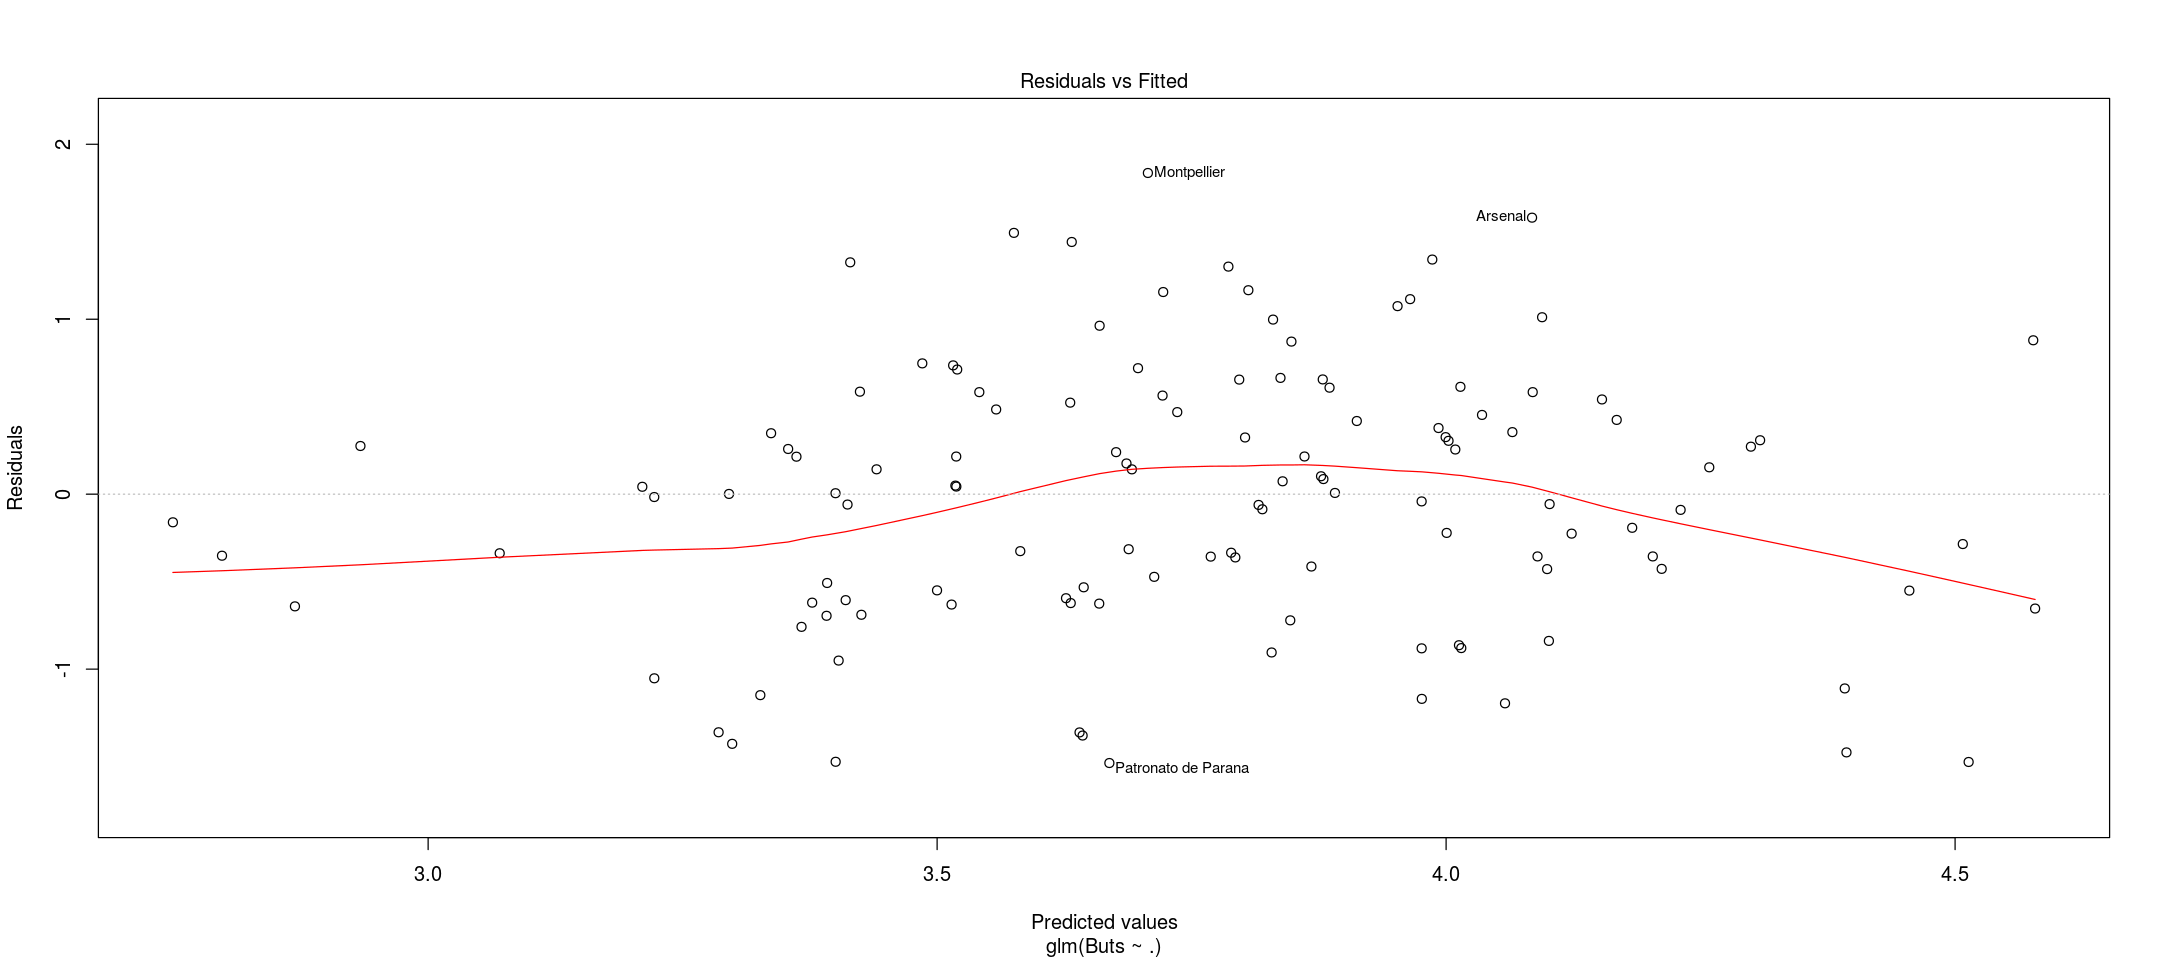

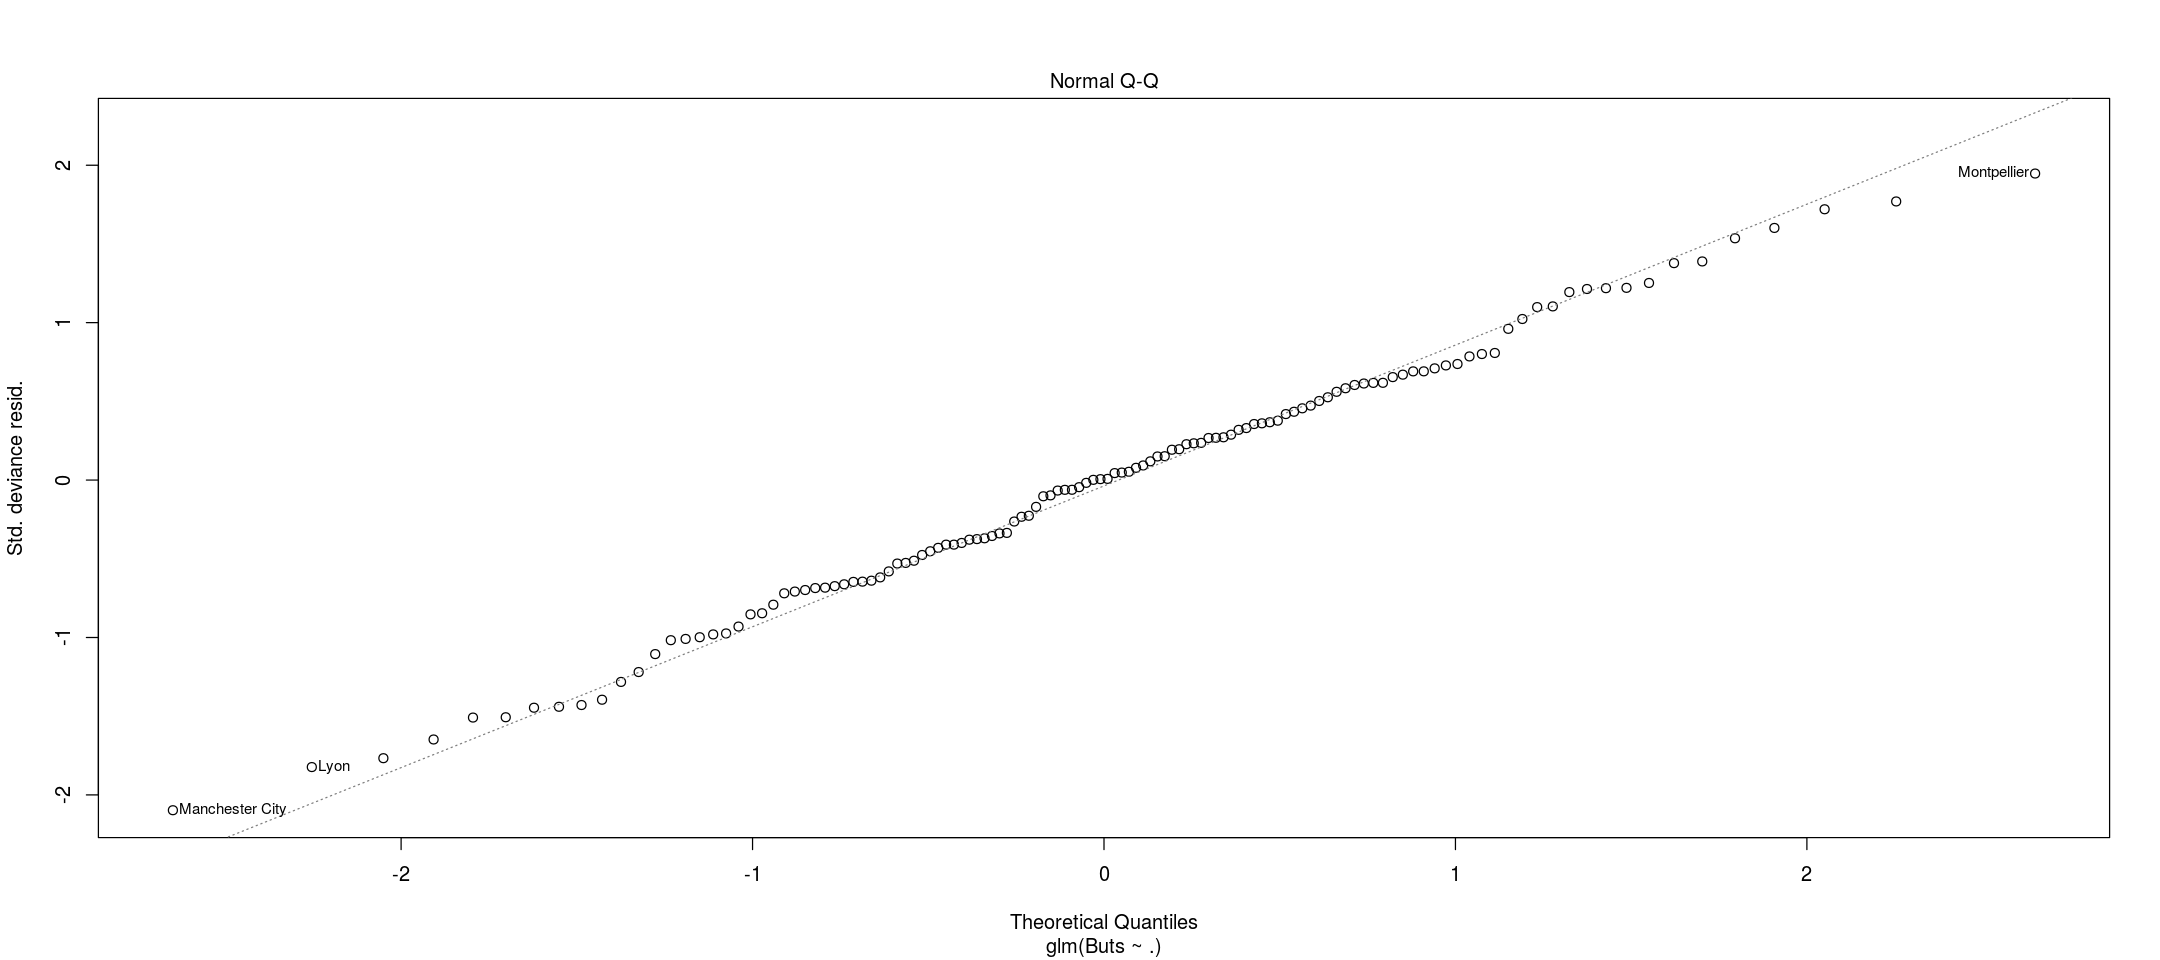

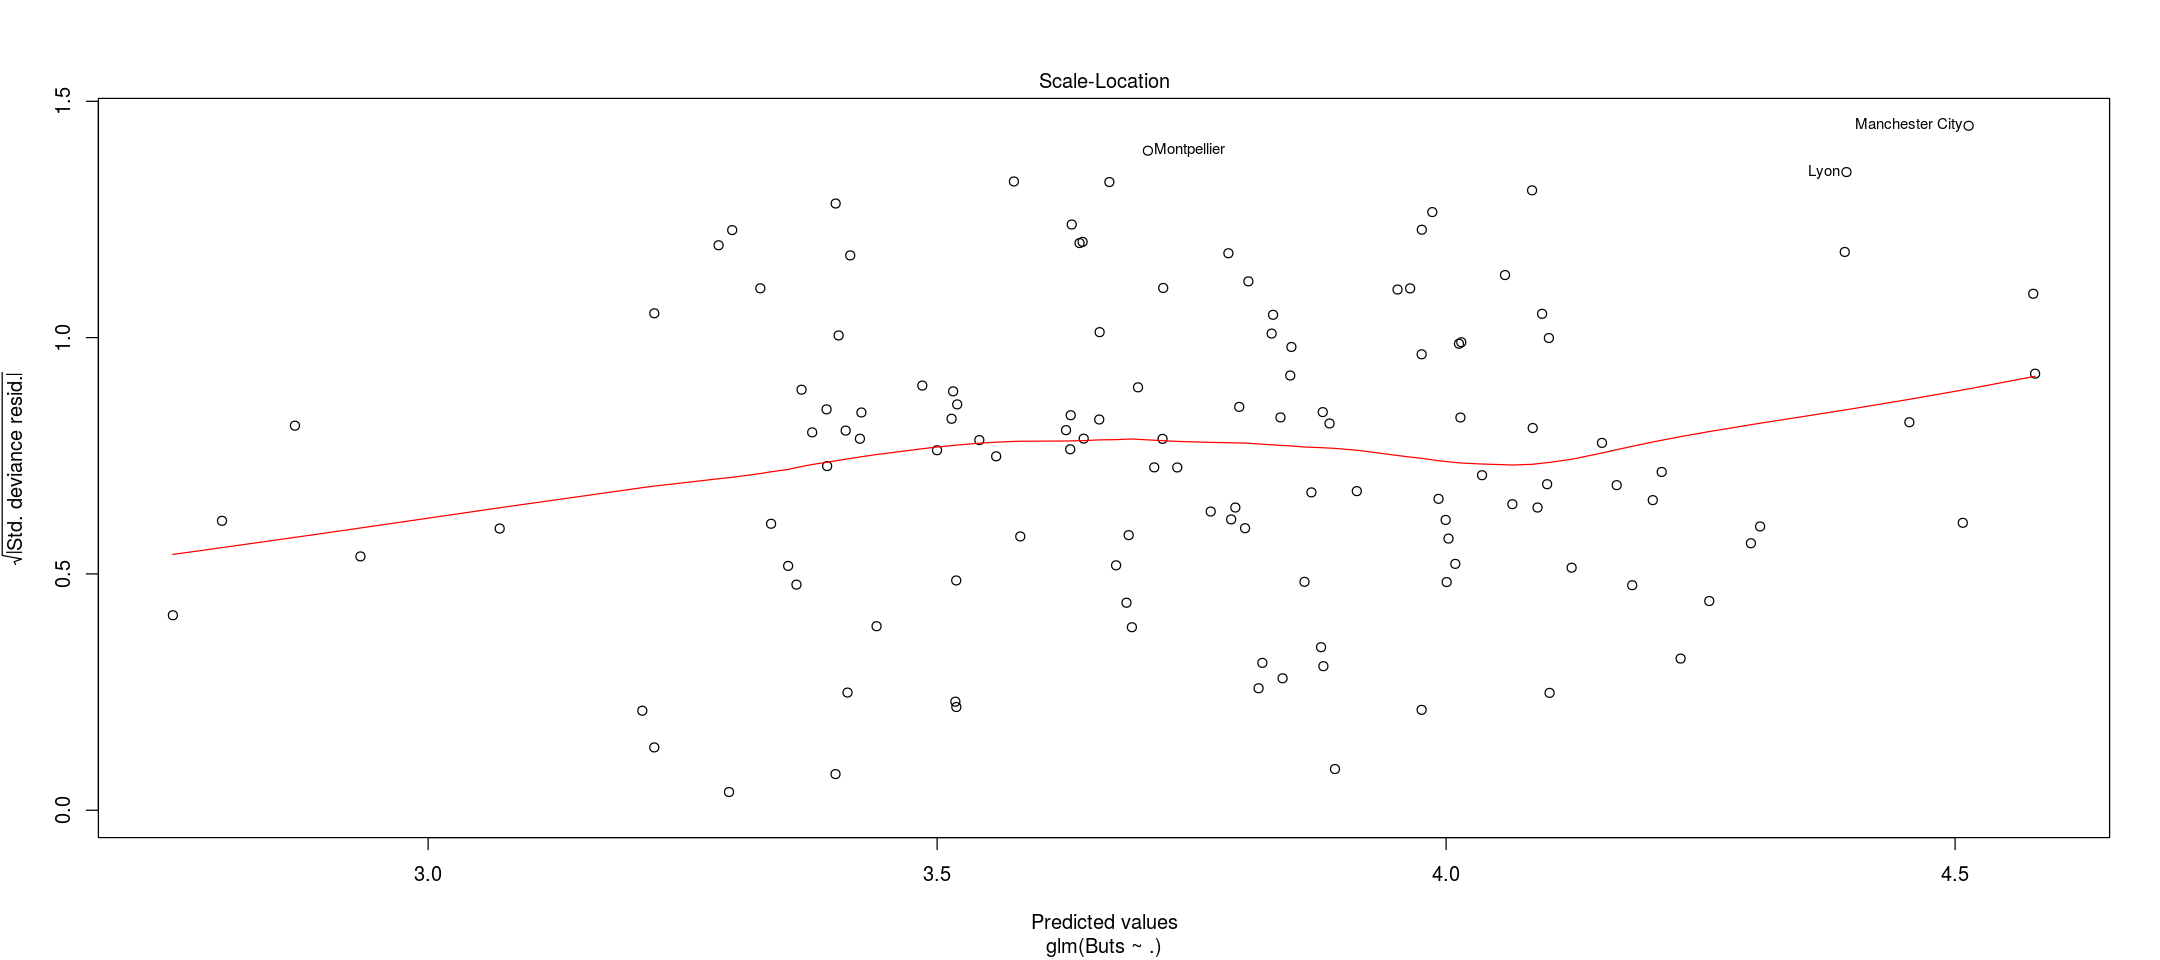

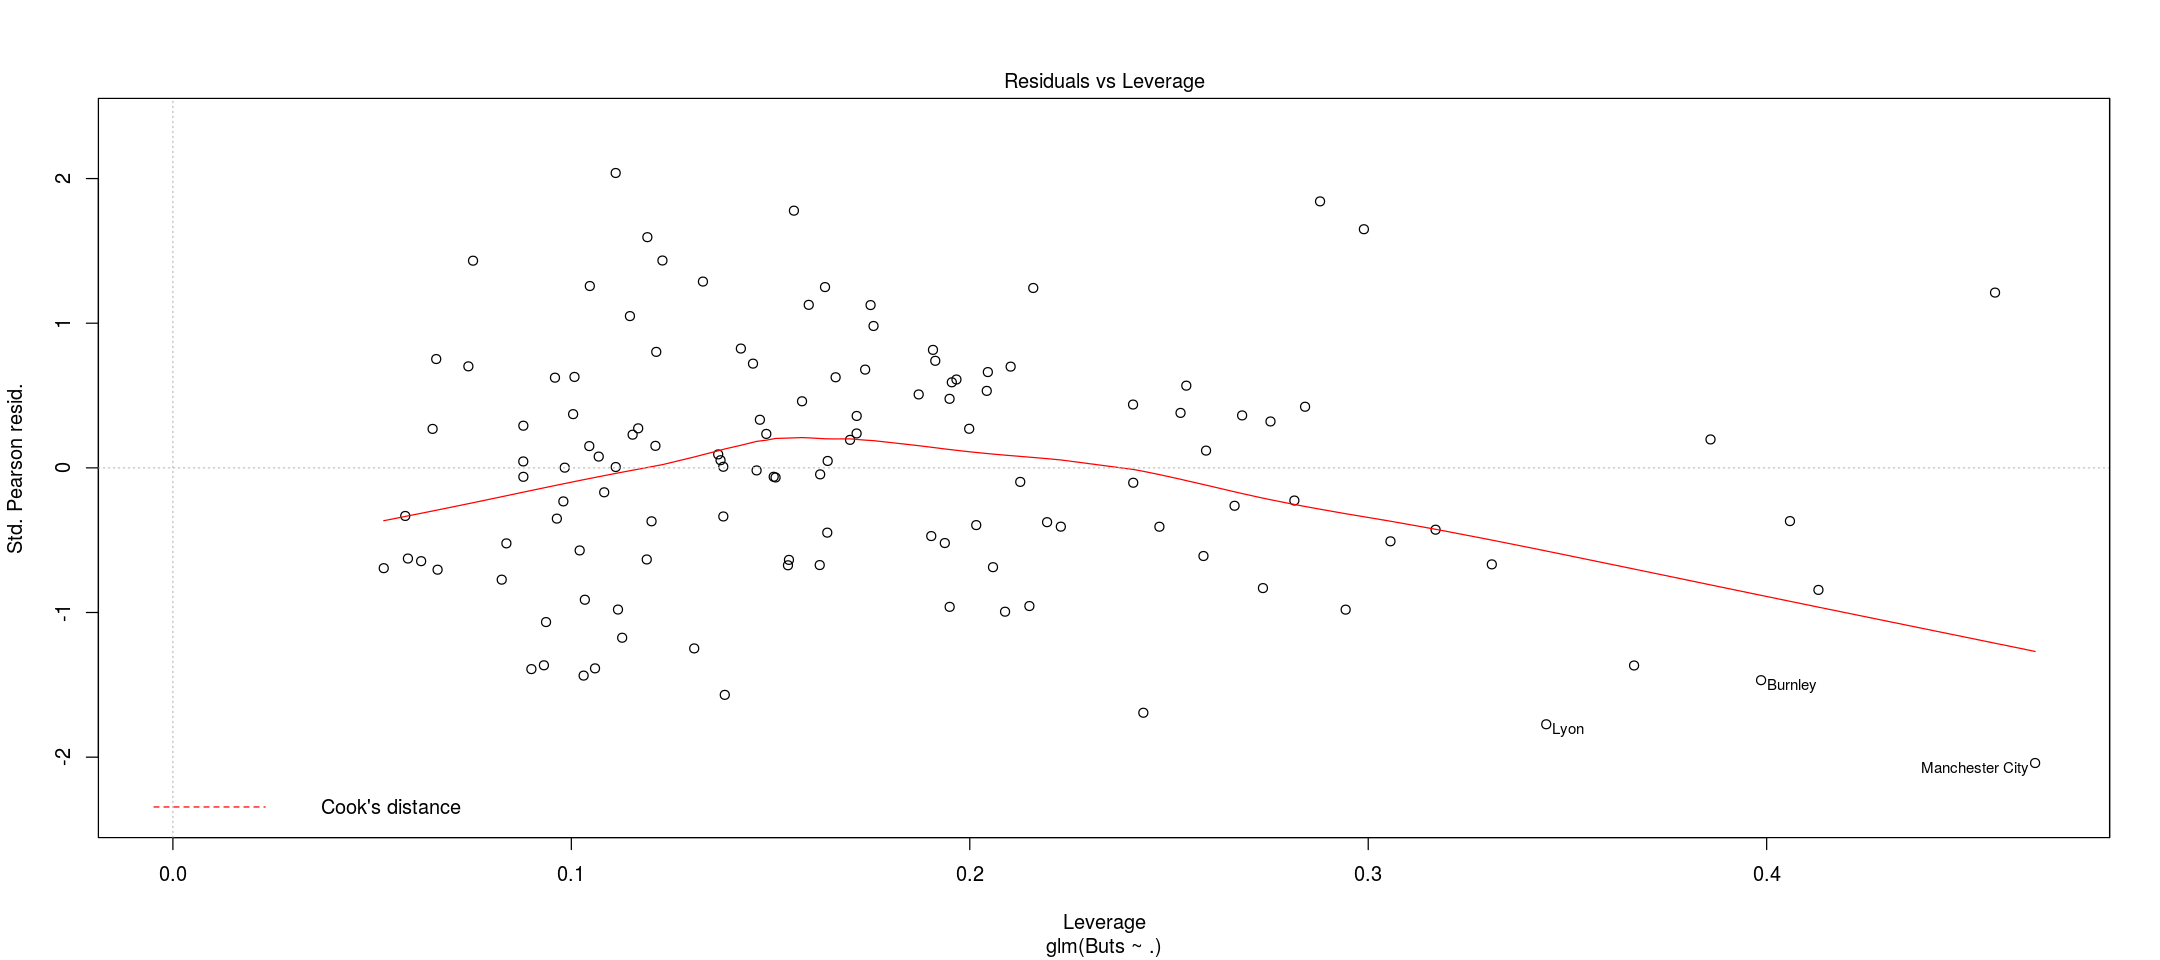

In [157]:
plot(fit_poisson)

In [158]:
R_squared = 1 - fit_poisson$deviance/fit_poisson$null.deviance
print(paste("R^2 du modèle de poisson :", R_squared))

[1] "R^2 du modèle de poisson : 0.911716331492632"


Le $R^2$ est très proche de 1 donc le modèle de régression de Poisson additif semble bien expliquer la variable du nombre de buts.

Ces résultats ne sont cependant pas représentatifs de la réalité : on a utilisé le nombre de buts total, dépendant du nombre de matches joués, mais on a utiliser les valeurs moyennées sur le reste des données. On va donc refaire l'opération, avec des variables comptées sur l'ensemble de la saison.

In [159]:
data_but_tot = data_but * data_tot$Nombre

In [160]:
fit.add_tot = glm(buts~. , data=data_but_tot, family=poisson)

In [161]:
s = step(fit.add_tot)

Start:  AIC=858.81
buts ~ Tackles_TotalTackles + Tackles_DribbledPast + Tackles_TotalAttemptedTackles + 
    Interception_Total + Fouls_Fouled + Fouls_Fouls + Cards_Yellow + 
    Cards_Red + OffSides_CaughtOffside + Clearances_Total + Blocks_ShotsBlocked + 
    Blocks_CrossesBlocked + Blocks_PassesBlocked + Saves_Total + 
    Saves_SixYardBox + Saves_PenaltyArea + Saves_OutOfBox + Shots_Total + 
    ShotsZones_OutOfBox + ShotsZones_SixYardBox + ShotsZones_PenaltyArea + 
    ShotsSituations_OpenPlay + shotsSituations_Counter + ShotsSituations_SetPiece + 
    ShotsSituations_PenaltyTaken + ShotsAccuracy_OffTarget + 
    ShotsAccuracy_OnPost + ShotsAccuracy_OnTarget + ShotsAccuracy_Blocked + 
    ShotsBodyParts_RightFoot + ShotsBodyParts_LeftFoot + ShotsBodyParts_Head + 
    ShotsBodyParts_Other + Dribbles_Unsuccessful + Dribbles_Successful + 
    Dribbles_Total + PossesionLoss_UnsuccessfulTouches + PossesionLoss_Dispossessed + 
    Aerial_Total + Aerial_Won + Aerial_Lost + Assists_Cross 

In [162]:
coefs.buts = s$coefficients
coefs.buts

(Intercept)             Saves_Total        Saves_SixYardBox 
           2.3079157556            0.0028604066           -0.0101805251 
         Saves_OutOfBox             Shots_Total ShotsAccuracy_OffTarget 
          -0.0036798952            0.0044942480           -0.0047748549 
  ShotsAccuracy_Blocked ShotsBodyParts_LeftFoot            Aerial_Total 
          -0.0047595272           -0.0009163588           -0.0002239396 
          Assists_Total      PassesLength_Total      PassesLength_AccSP 
           0.0176475909            0.0001663558           -0.0001876321 
      PassesType_AccFrK  KeyPassesType_Freekick   KeyPassesType_Throwin 
           0.0004297035            0.0043599041           -0.0106932035

In [215]:
for (i in 1:nb.variables.buts){
    for (j in 1:(length(names(coefs.buts))-1)){
        if (df.variables.buts$Noms[i] == names(coefs.buts)[j+1]){
            df.variables.buts$NombreDeButs[i] = round(coefs.buts[j+1],3)
        }
    } 
}

In [53]:
data_add_poisson_tot = data.frame(buts,
                     data_but_tot$Saves_Total,
                     data_but_tot$Saves_OutOfBox, data_but_tot$Shots_Total, 
                     data_but_tot$ShotsAccuracy_OffTarget, data_but_tot$PassesLength_Total, 
                     data_but_tot$PassesType_AccFrK,
                     data_but_tot$Aerial_Total, data_but_tot$Saves_SixYardBox, data_but_tot$ShotsAccuracy_Blocked,
                     data_but_tot$ShotsBodyParts_LeftFoot, data_but_tot$Assists_Total, data_but_tot$PassesLength_AccSP,
                     data_but_tot$KeyPassesType_Freekick, data_but_tot$KeyPassesType_Throwin)

names(data_add_poisson_tot) <- c("Buts", "Saves_Total", 
                     "Saves_OutOfBox", "Shots_Total",
                     "ShotsAccuracy_OffTarget", 
                     "PassesLength_Total", "PassesType_AccFrK", 
                     "Aerial_Total", "Saves_SixYardBox", "ShotsAccuracy_Blocked", "ShotsBodyParts_LeftFoot", 
                     "Assists_Total", "PassesLength_AccSP", "KeyPassesType_Freekick", "KeyPassesType_Throwin")


In [54]:
rownames(data_add_poisson_tot) = rownames(data_tot)

In [55]:
fit_poisson_tot = glm(Buts~., data = data_add_poisson_tot, family = poisson)

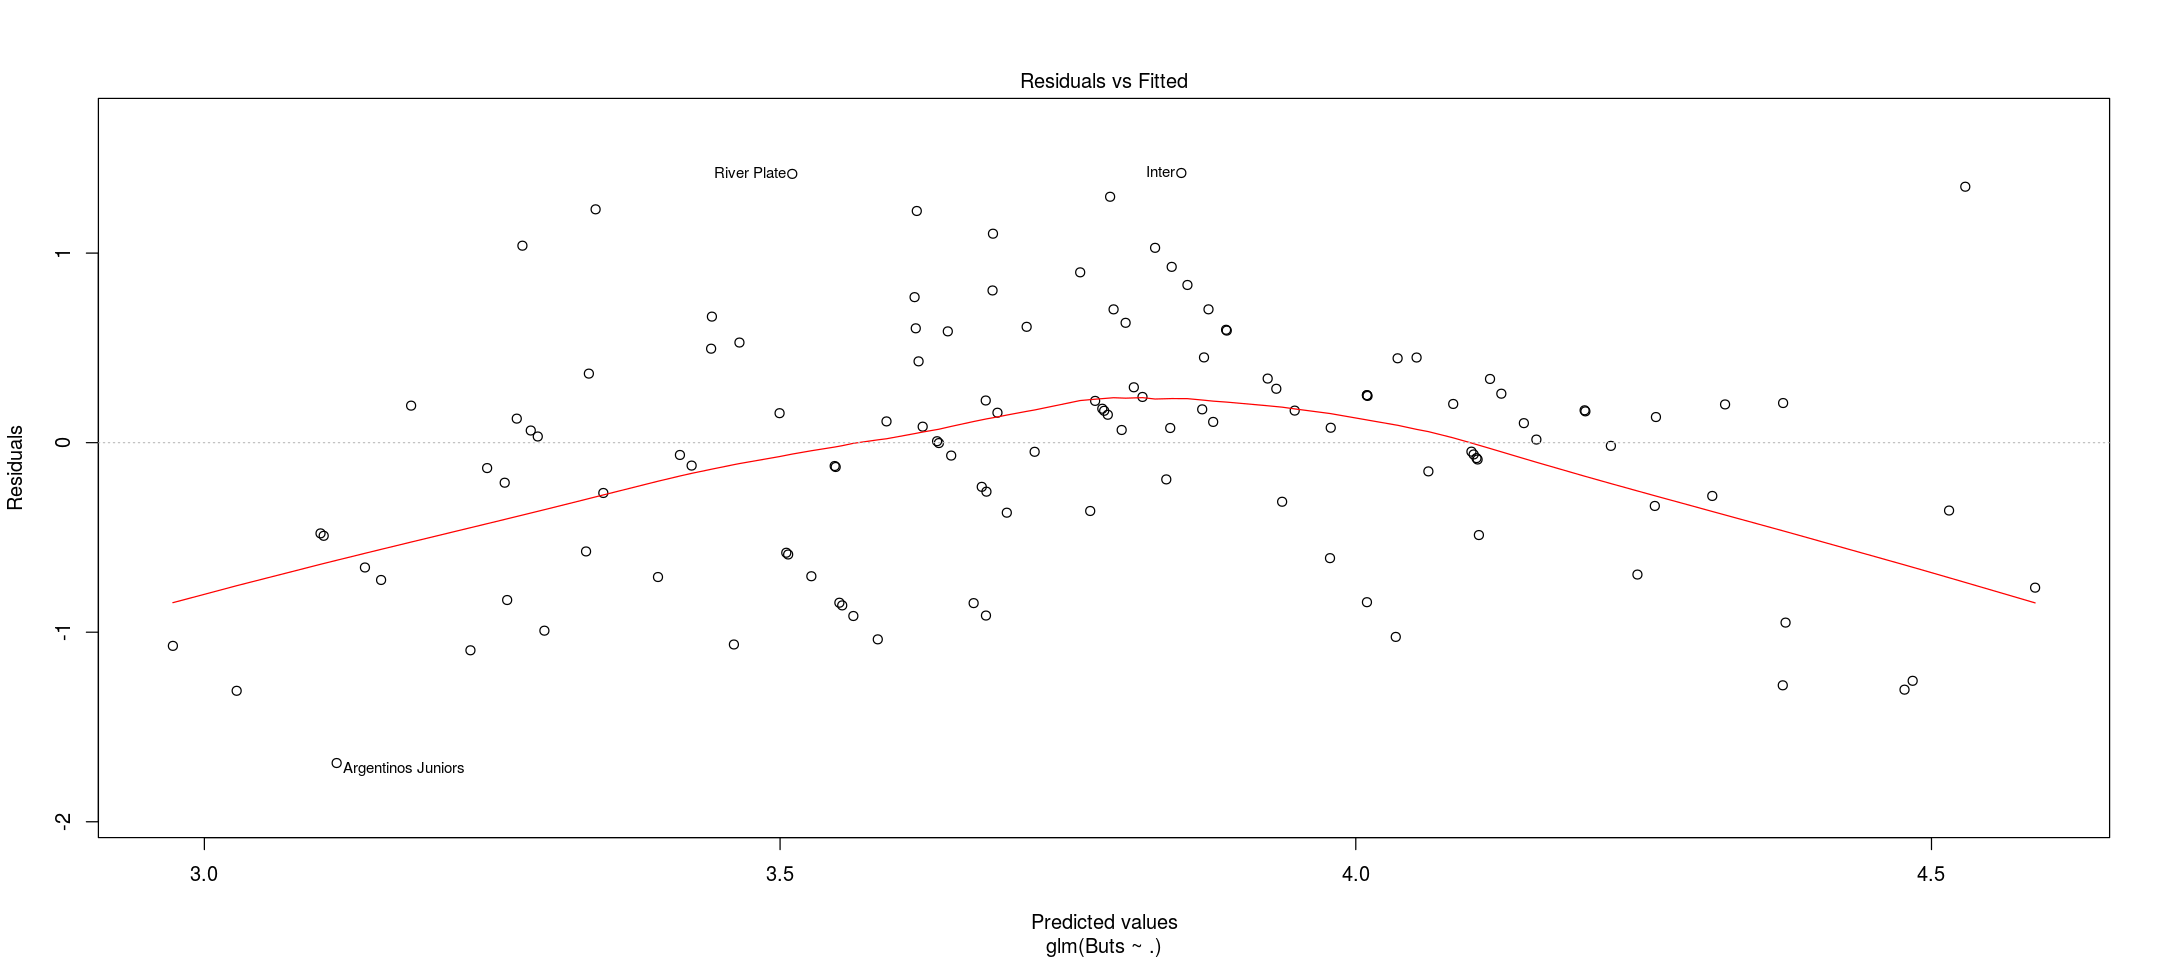

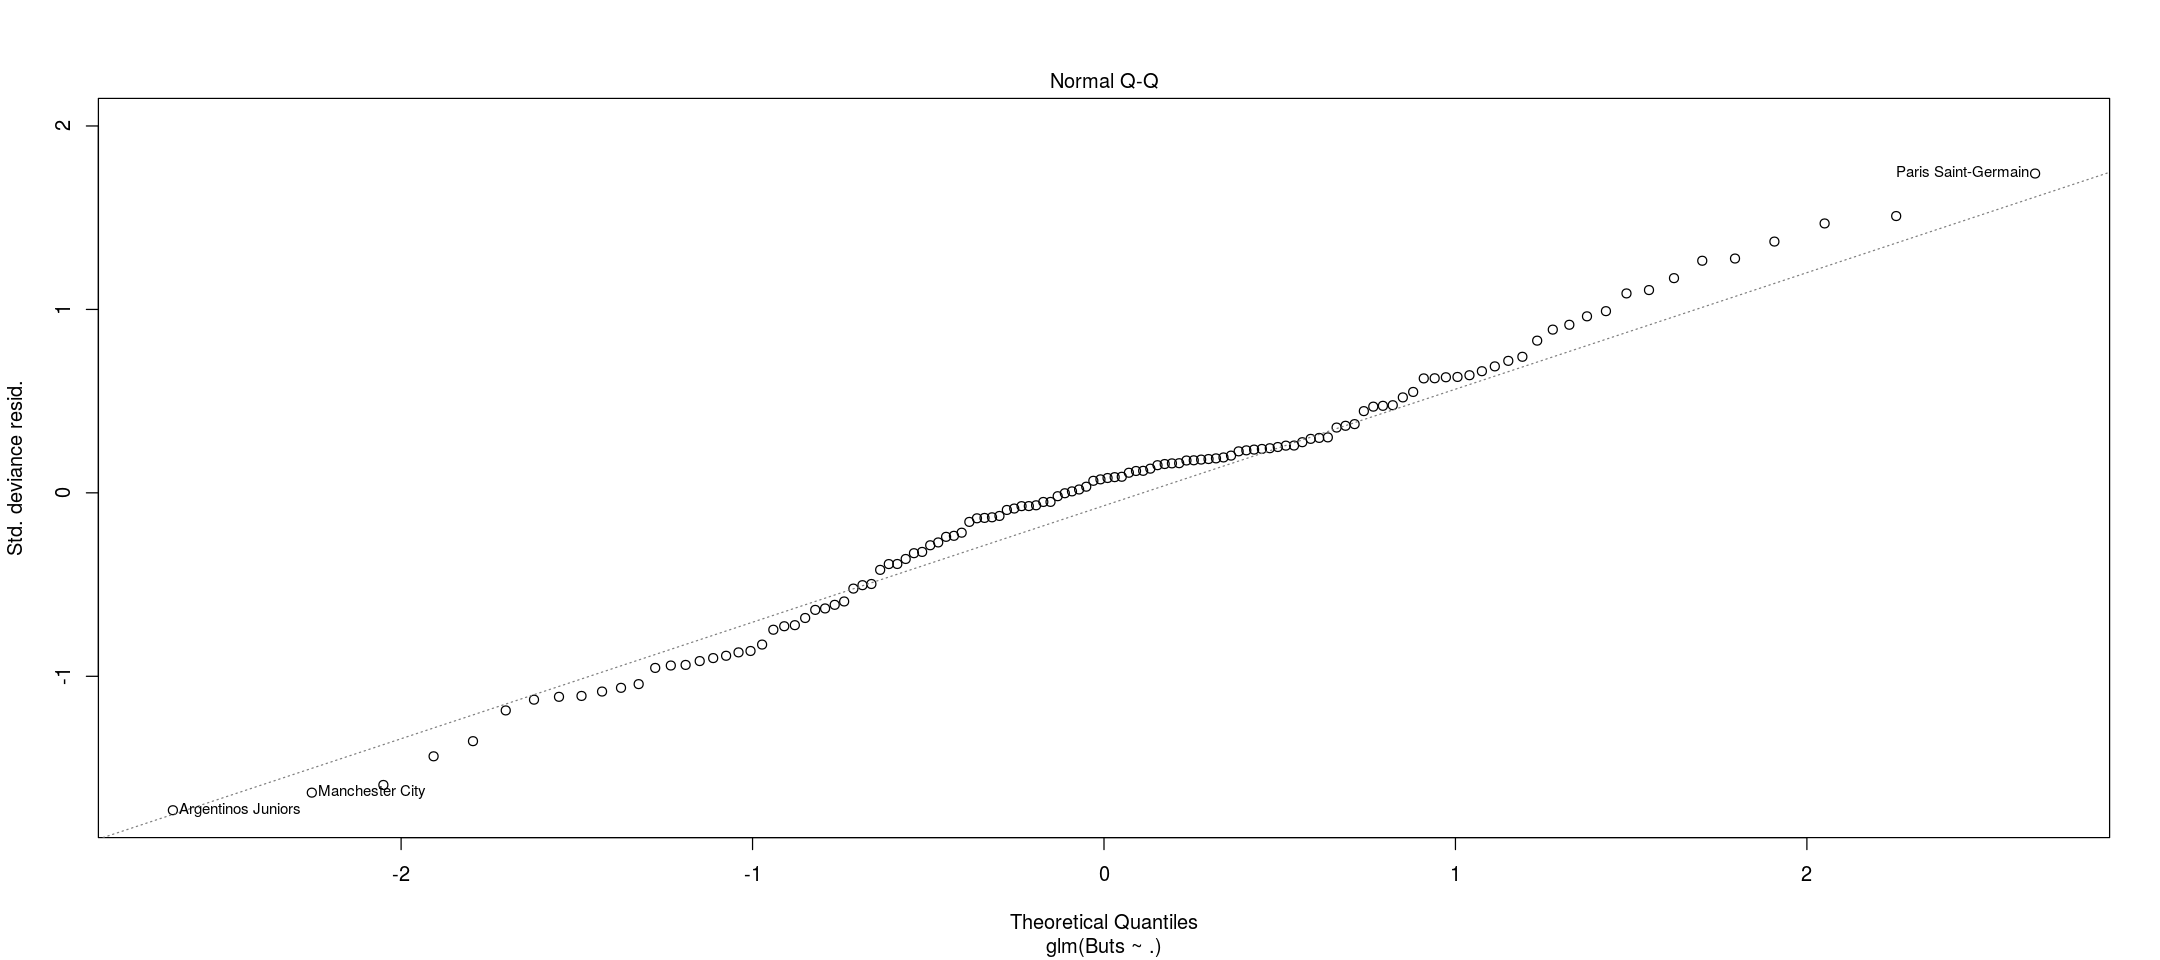

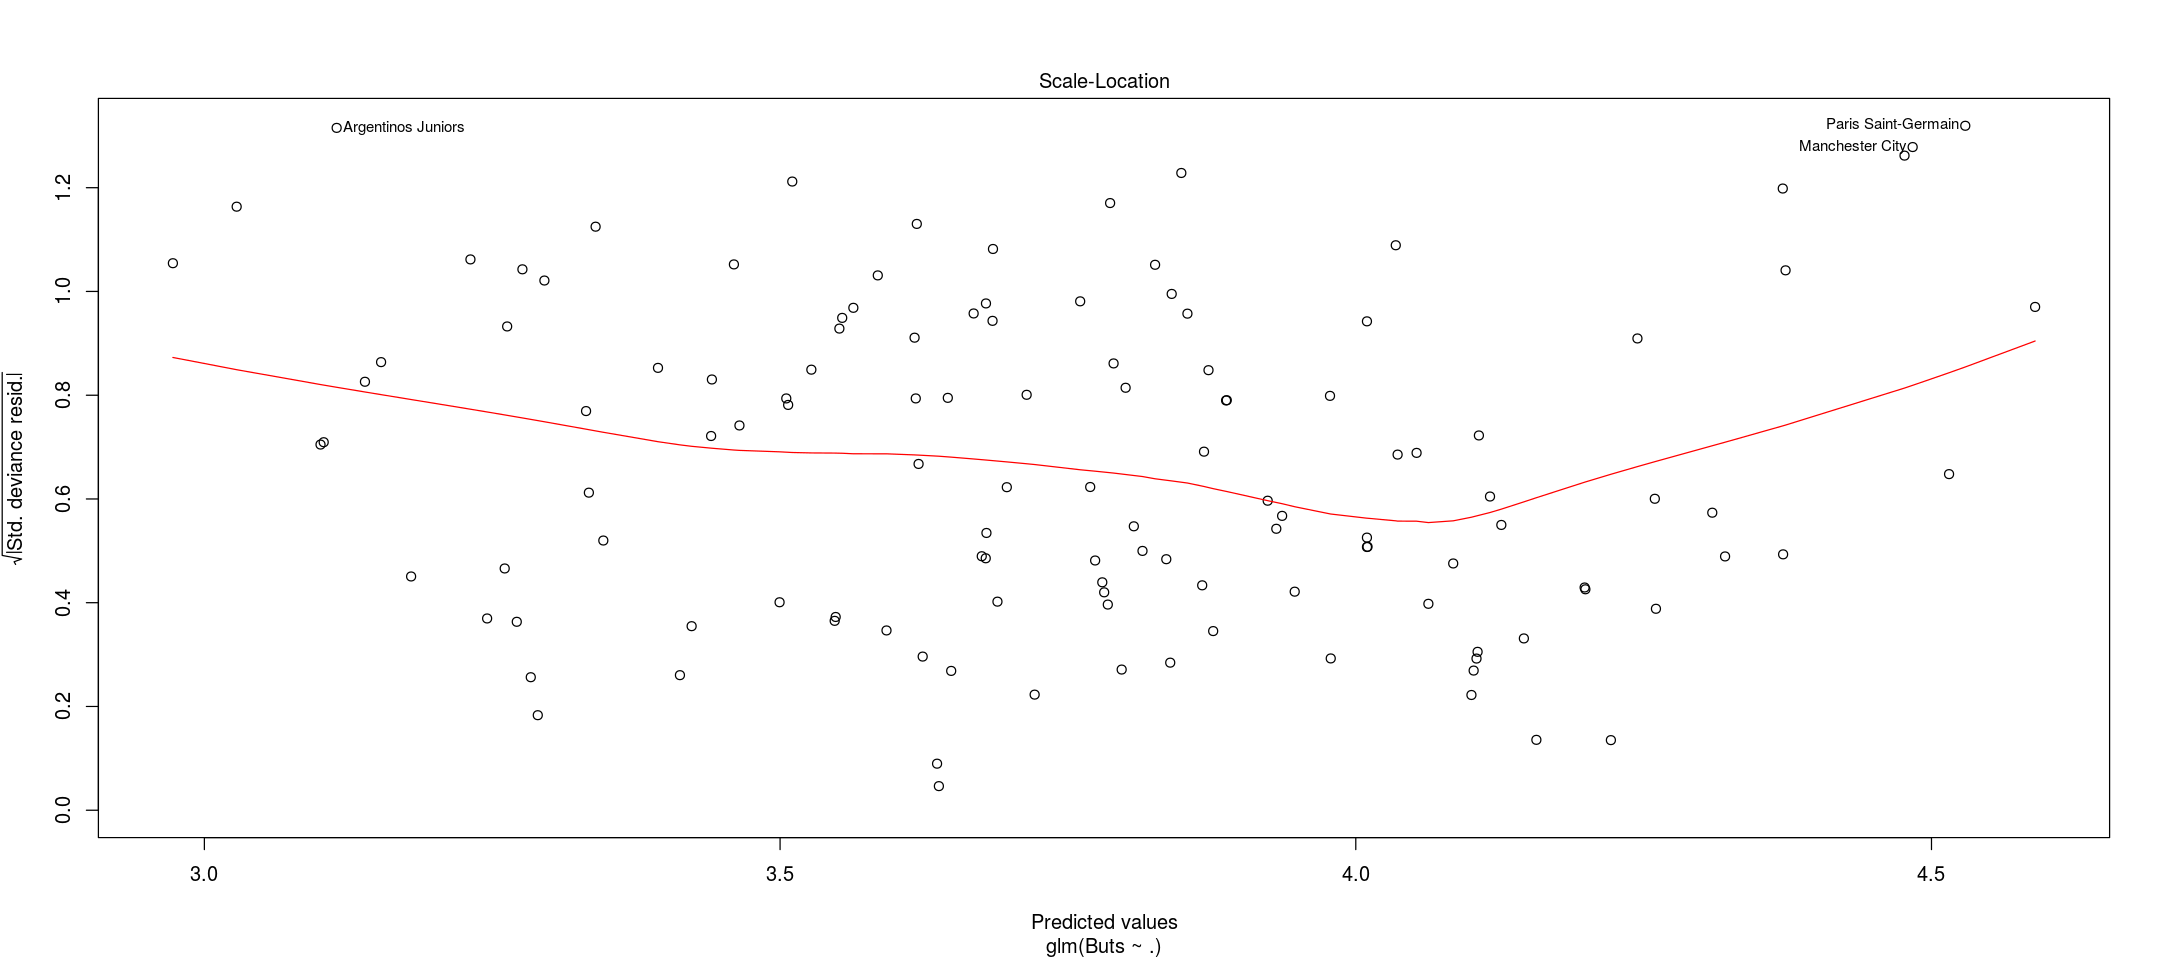

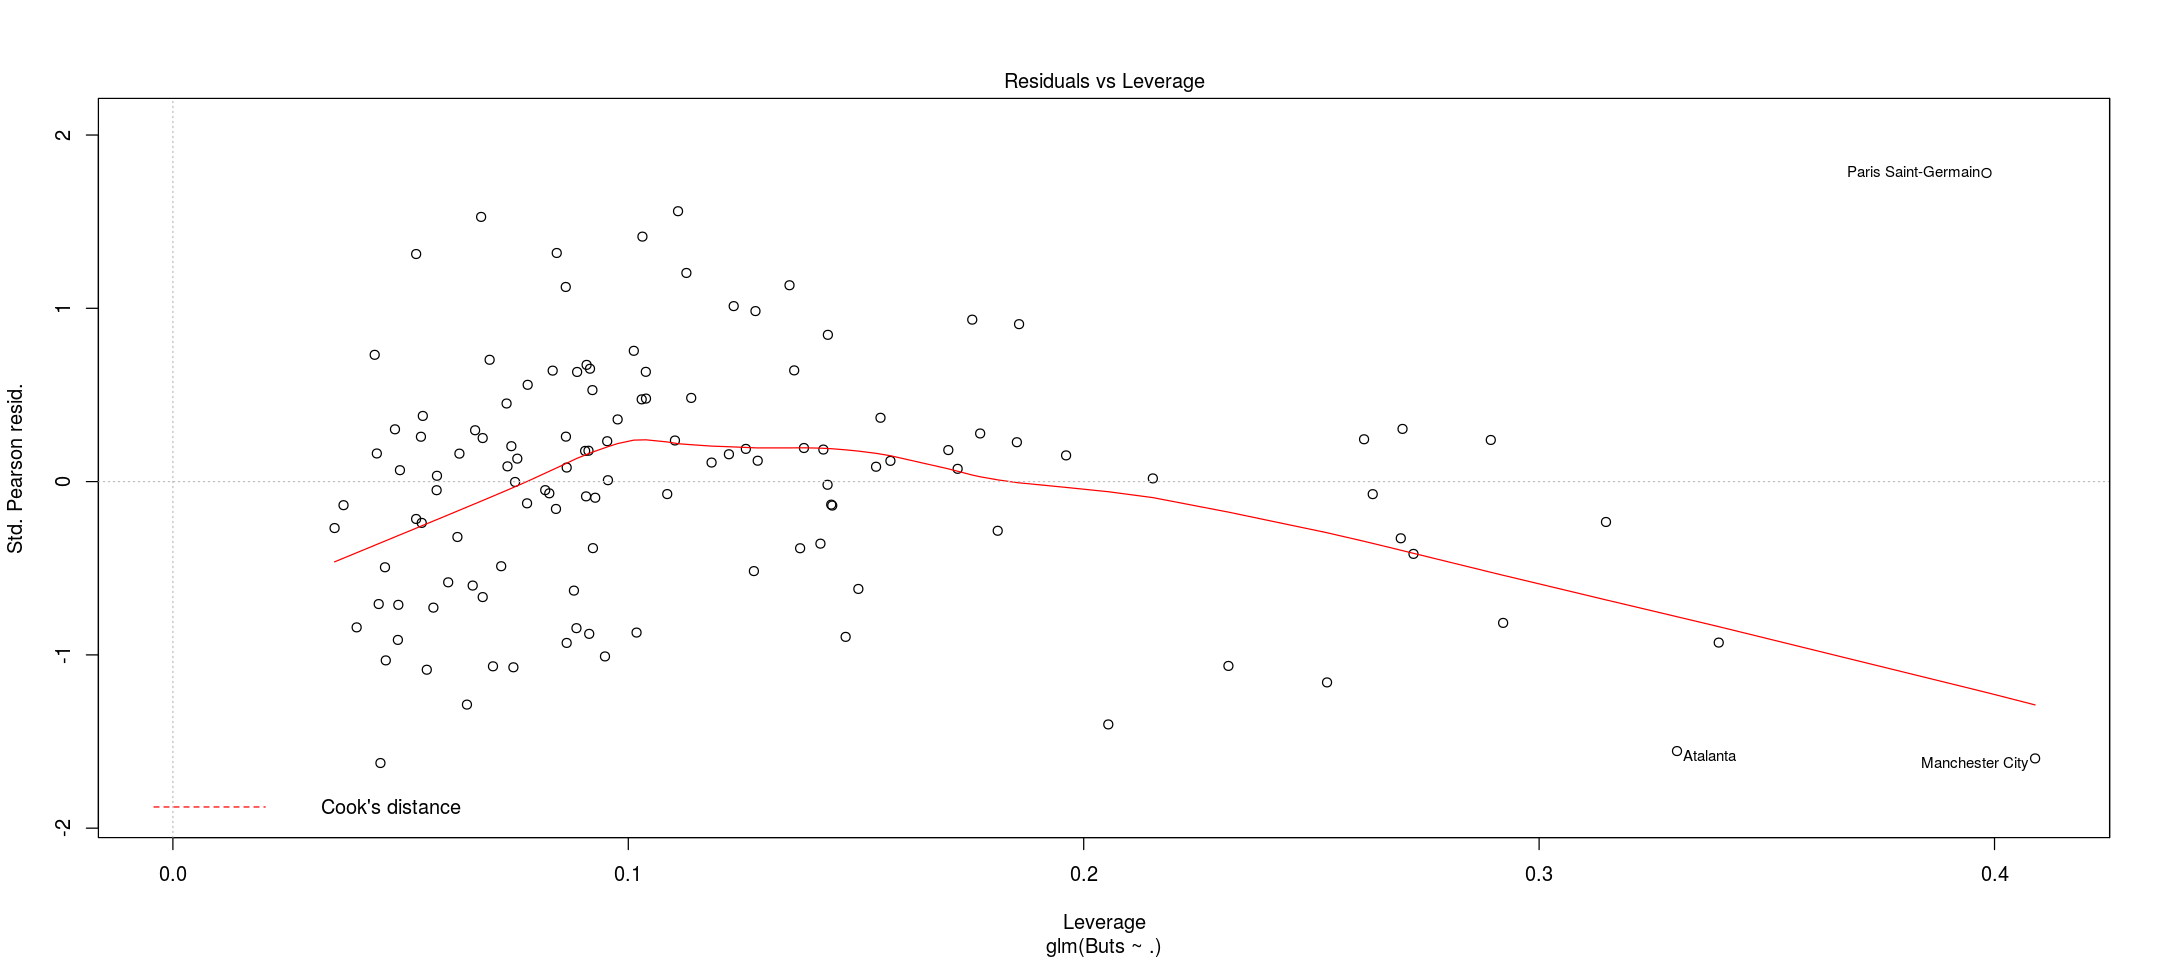

In [56]:
plot(fit_poisson_tot)

In [57]:
R_squared = 1 - fit_poisson_tot$deviance/fit_poisson_tot$null.deviance
print(paste("R^2 du modèle de poisson :", R_squared))

[1] "R^2 du modèle de poisson : 0.93401160079489"


Le $R^2$ est très proche de 1 donc le modèle de régression de Poisson additif semble bien expliquer la variable du nombre de buts. C'est bizarre que ce $R^2$ soit meilleur que le précédent, car on observe des formes dans les résidus (une banane).

# Variable  = nombre de points à l'issue de la saison

In [165]:
points = data_tot$Points

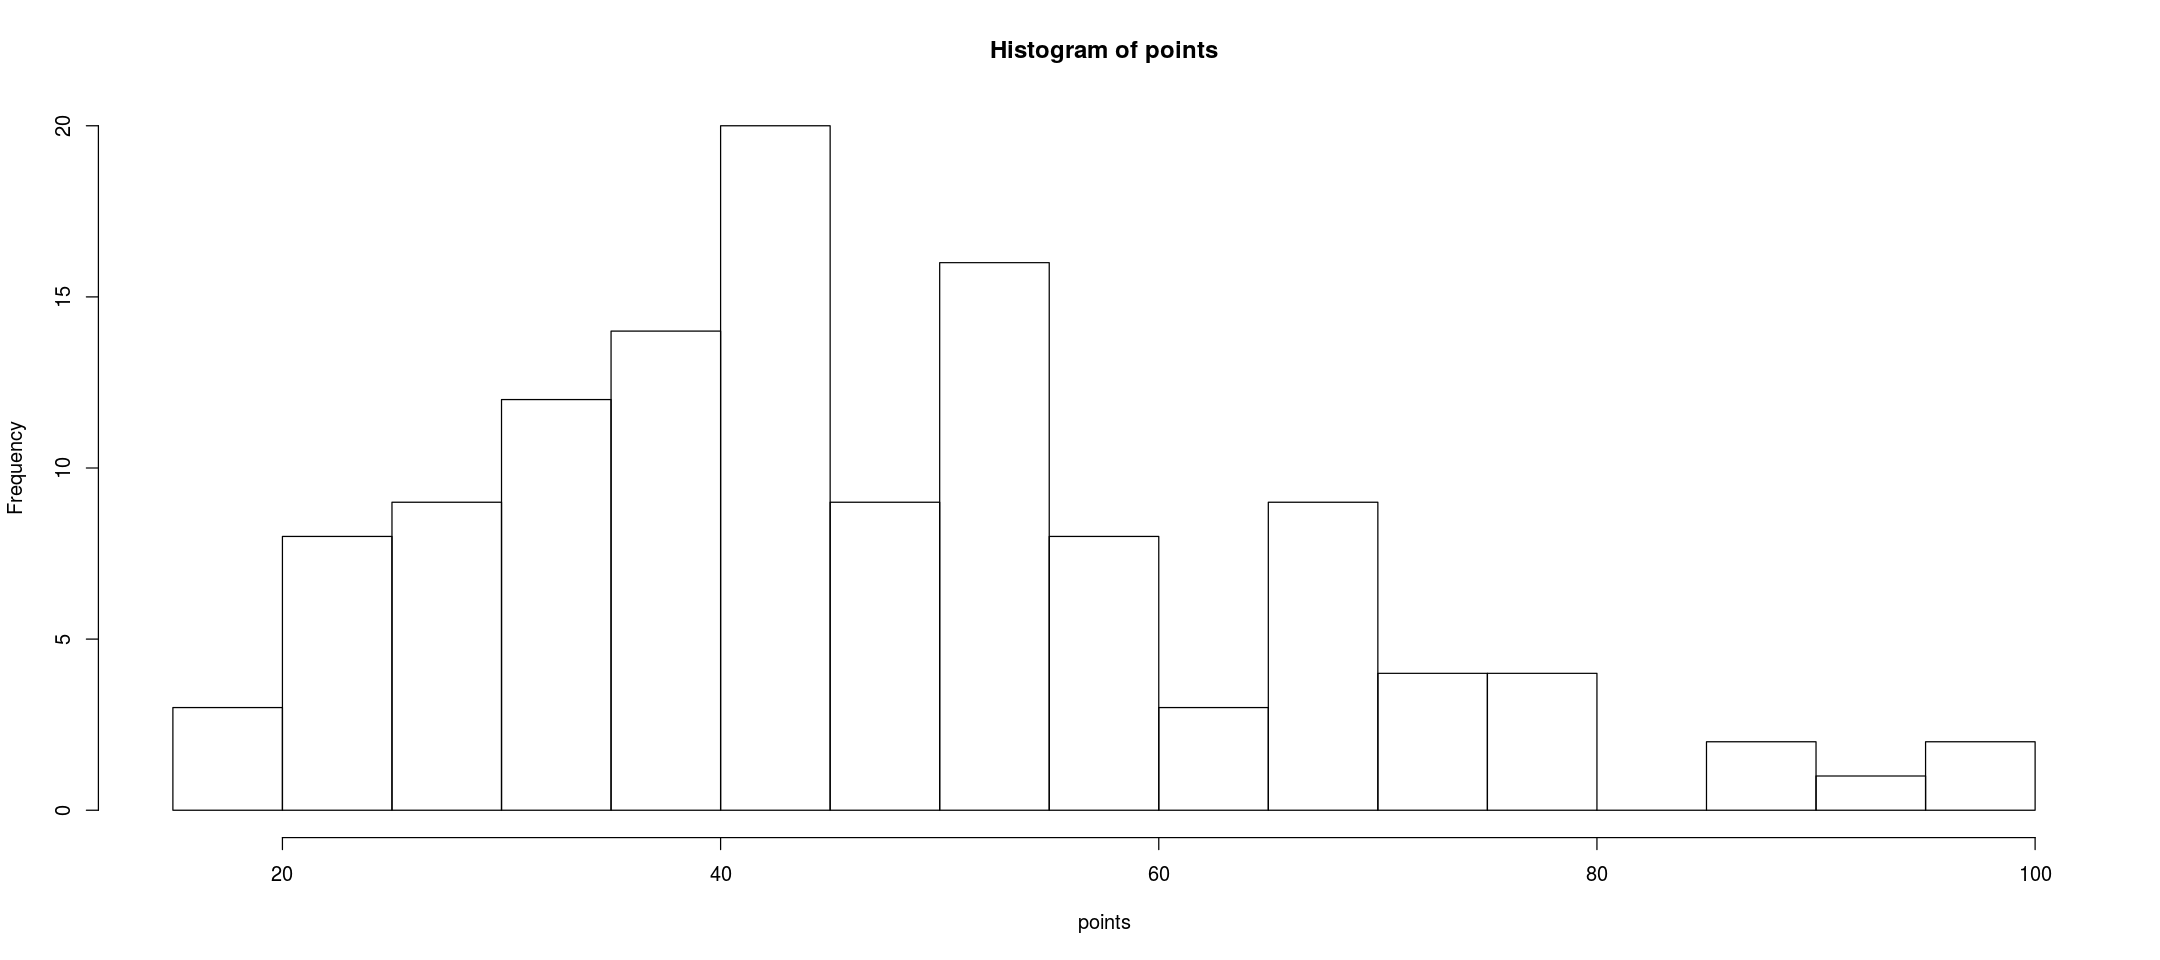

In [166]:
hist(points, breaks=12)

In [167]:
data_but_tot$Points = points

In [168]:
choix_points <- regsubsets(data_but_tot$Points~., data = data_but_tot, nbest=1, nvmax=10, method="seqrep")

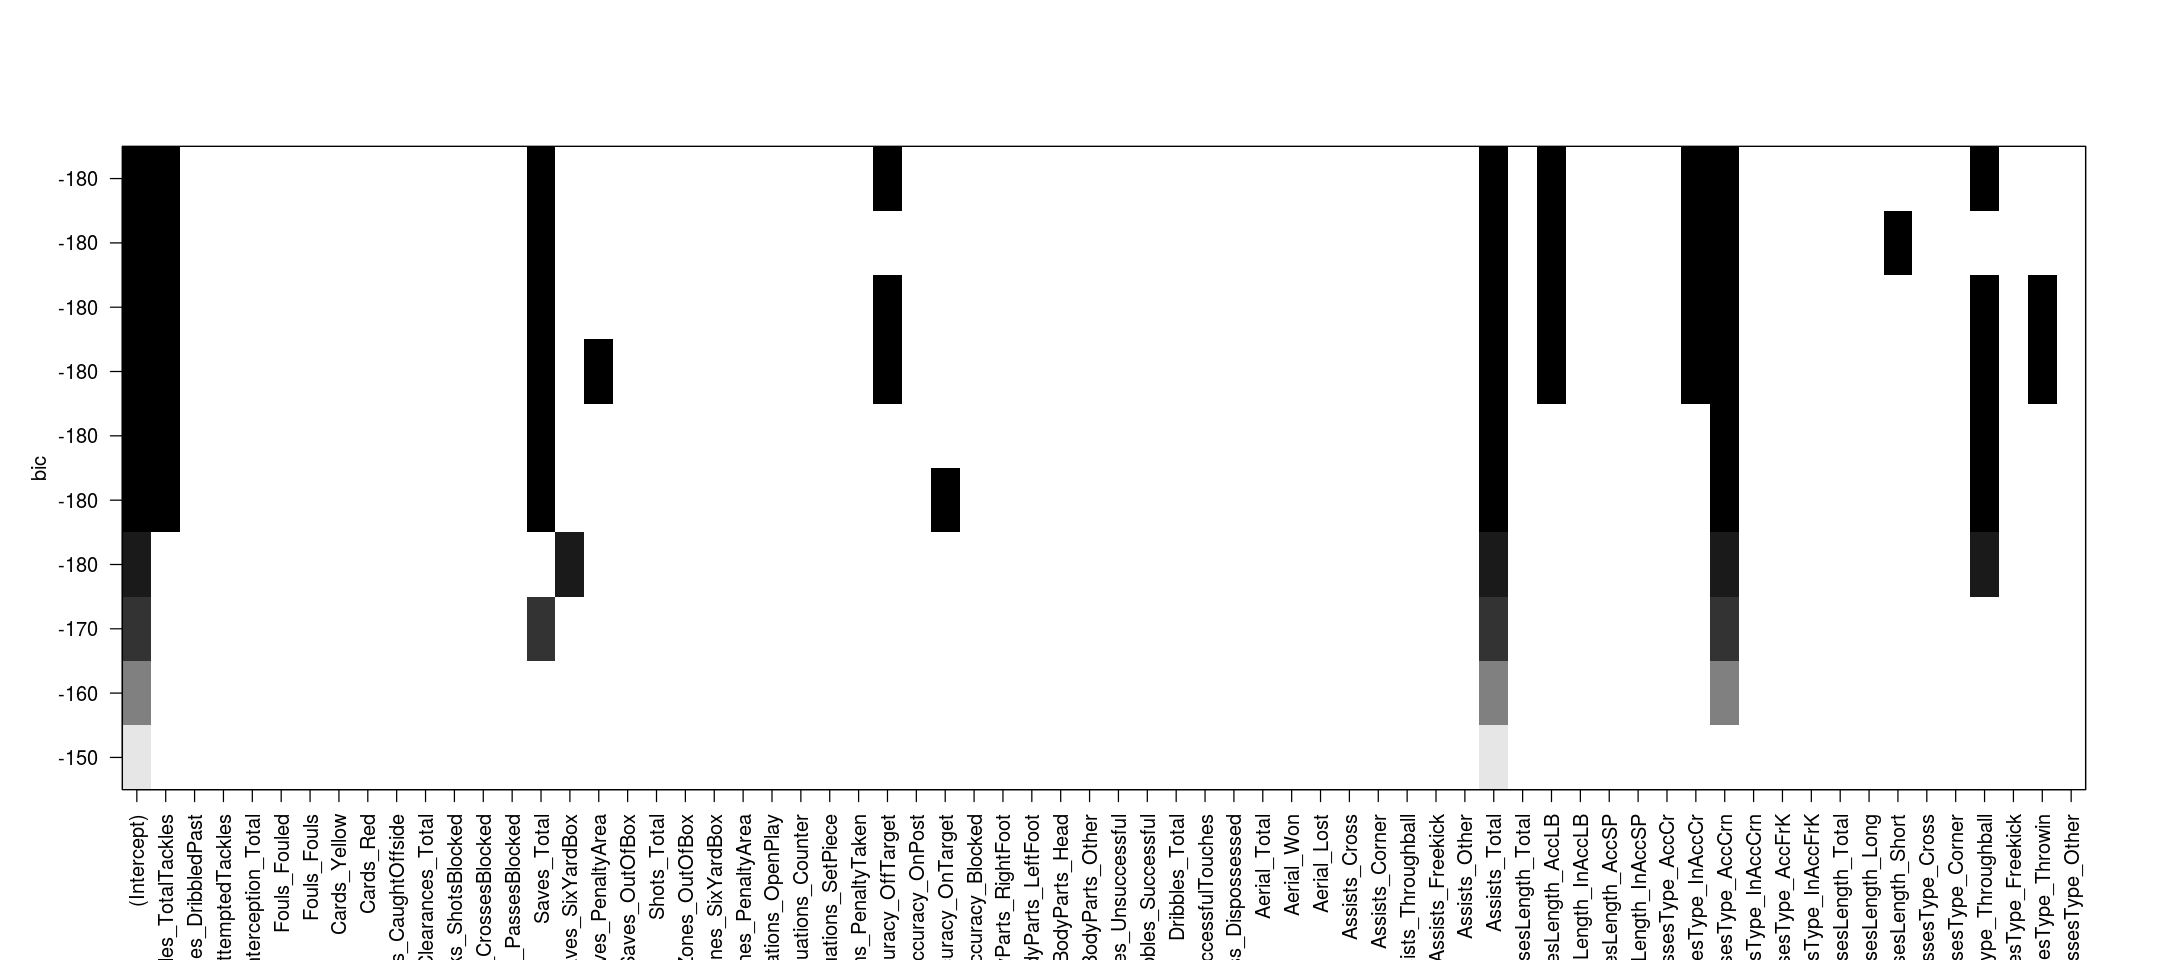

In [169]:
options(repr.plot.width=18, repr.plot.height=8)
plot(choix_points,scale="bic")

In [173]:
nb_min = which.min(summary(choix_points)$bic)
coefs.points = coef(choix_points, nb_min)
coefs.points

(Intercept)      Tackles_TotalTackles               Saves_Total 
               1.53482746                0.02672957               -0.15833902 
  ShotsAccuracy_OffTarget             Assists_Total        PassesLength_AccLB 
               0.07629696                0.64676916                0.01303991 
       PassesType_InAccCr         PassesType_AccCrn KeyPassesType_Throughball 
              -0.03579196                0.16286076                0.30772892

In [217]:
for (i in 1:nb.variables.buts){
    for (j in 1:(length(names(coefs.points))-1)){
        if (choix_points$xnames[i+1] == names(coefs.points)[j+1]){
            df.variables.buts$NombreDePoints[i] = round(coefs.points[j+1],3)
        }
    } 
}

Les variables influentes sur le nombre de points sont les variables ci-dessus.

In [64]:
data_bic_points = data.frame(points,
                     data_but_tot$Tackles_TotalTackles,
                     data_but_tot$Saves_Total, data_but_tot$ShotsAccuracy_OffTarget, 
                     data_but_tot$Assists_Total, data_but_tot$PassesLength_AccLB, 
                     data_but_tot$PassesType_InAccCr,
                     data_but_tot$PassesType_AccCrn, data_but_tot$KeyPassesType_Throughball)

names(data_bic_points) <- c("Points", "Tackles_TotalTackles", 
                     "Saves_Total", "ShotsAccuracy_OffTarget",
                     "Assists_Total", 
                     "PassesLength_AccLB", "PassesType_InAccCr", 
                     "PassesType_AccCrn", "KeyPassesType_Throughball")


In [65]:
rl_points = lm(formula = Points~.,data = data_bic_points)

In [66]:
r_squared = summary(rl_points)$r.squared
print(paste("R^2 pour un modéle linéaire :", r_squared))

[1] "R^2 pour un modéle linéaire : 0.837341705382205"


Le $R^2$ est moins bon que losqu'on explique le nombre de buts avec une régression loglinéaire. On s'en doutait un peu car le fait de calculer les points au classement n'est pas équivalent au nombre de buts. Ca ne dépend que de l'issue du match, et pas de son déroullement.

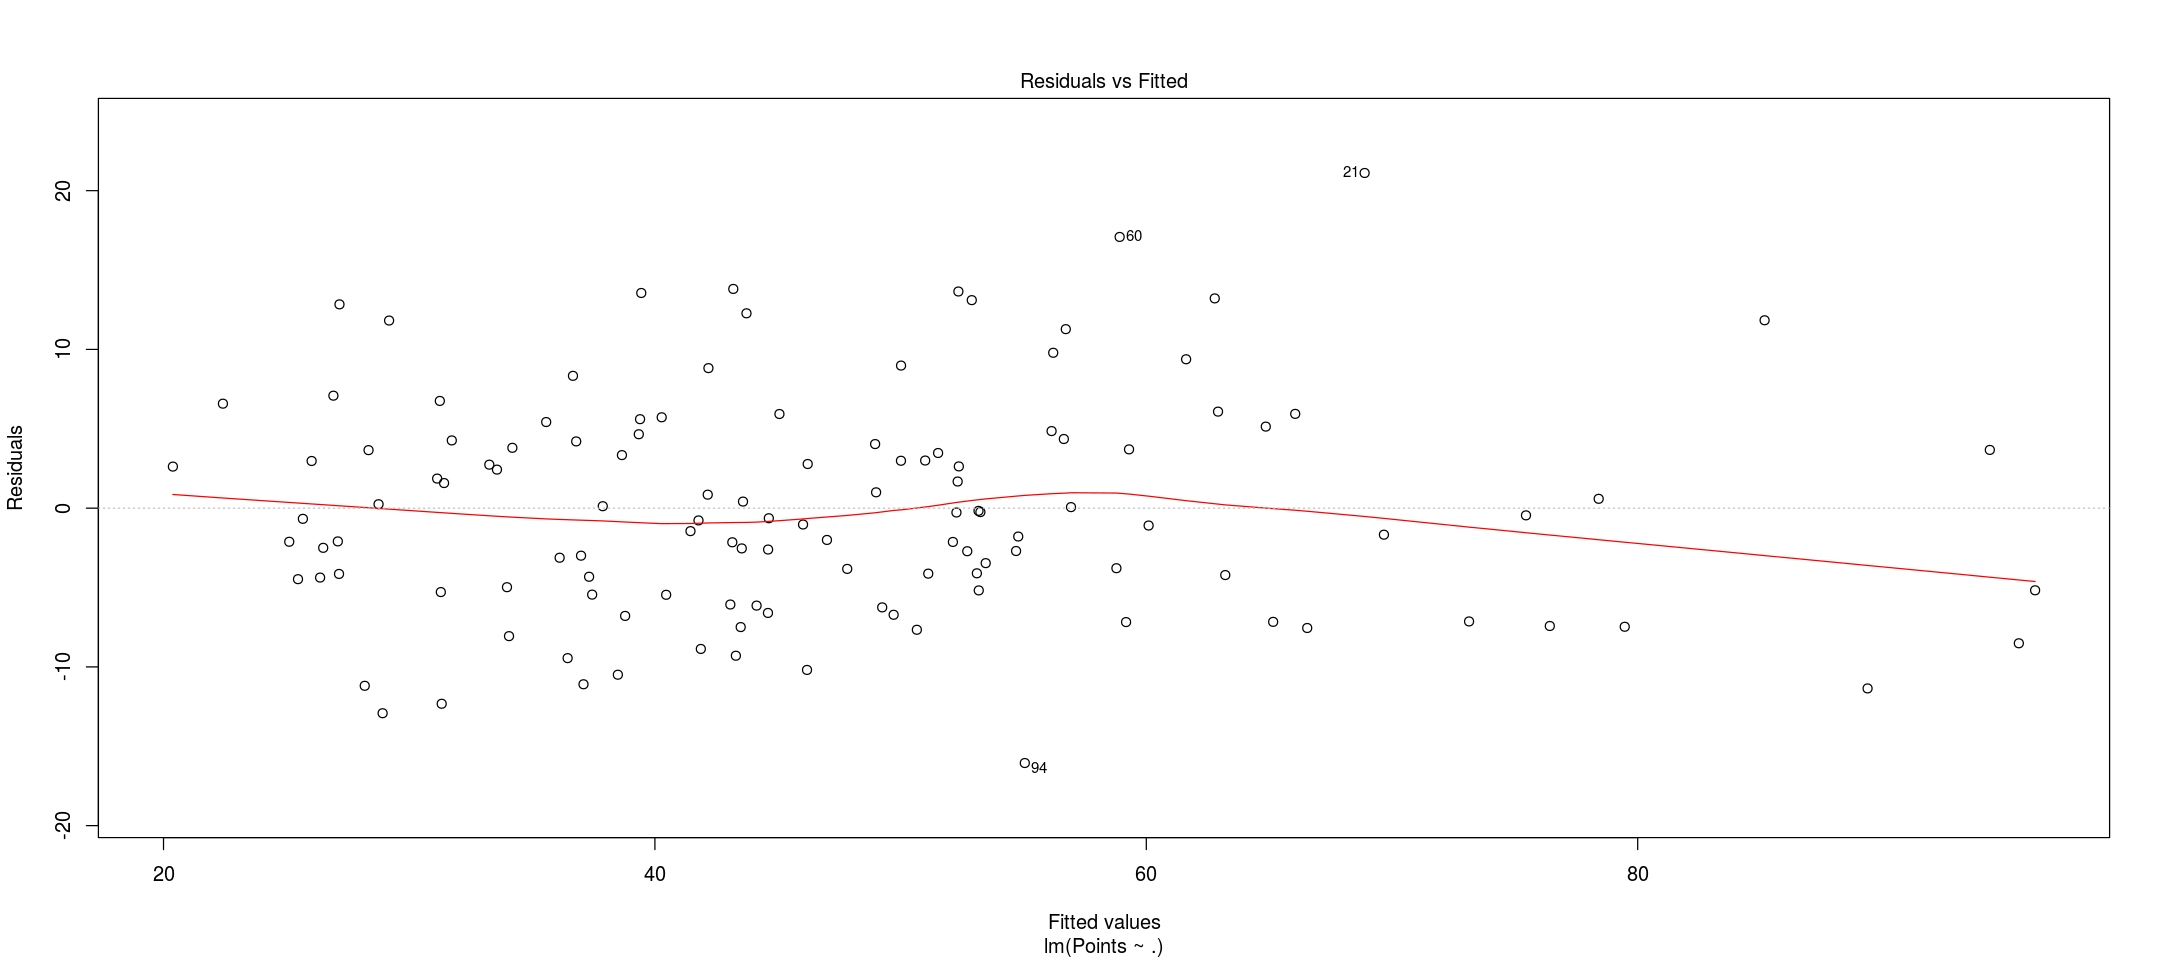

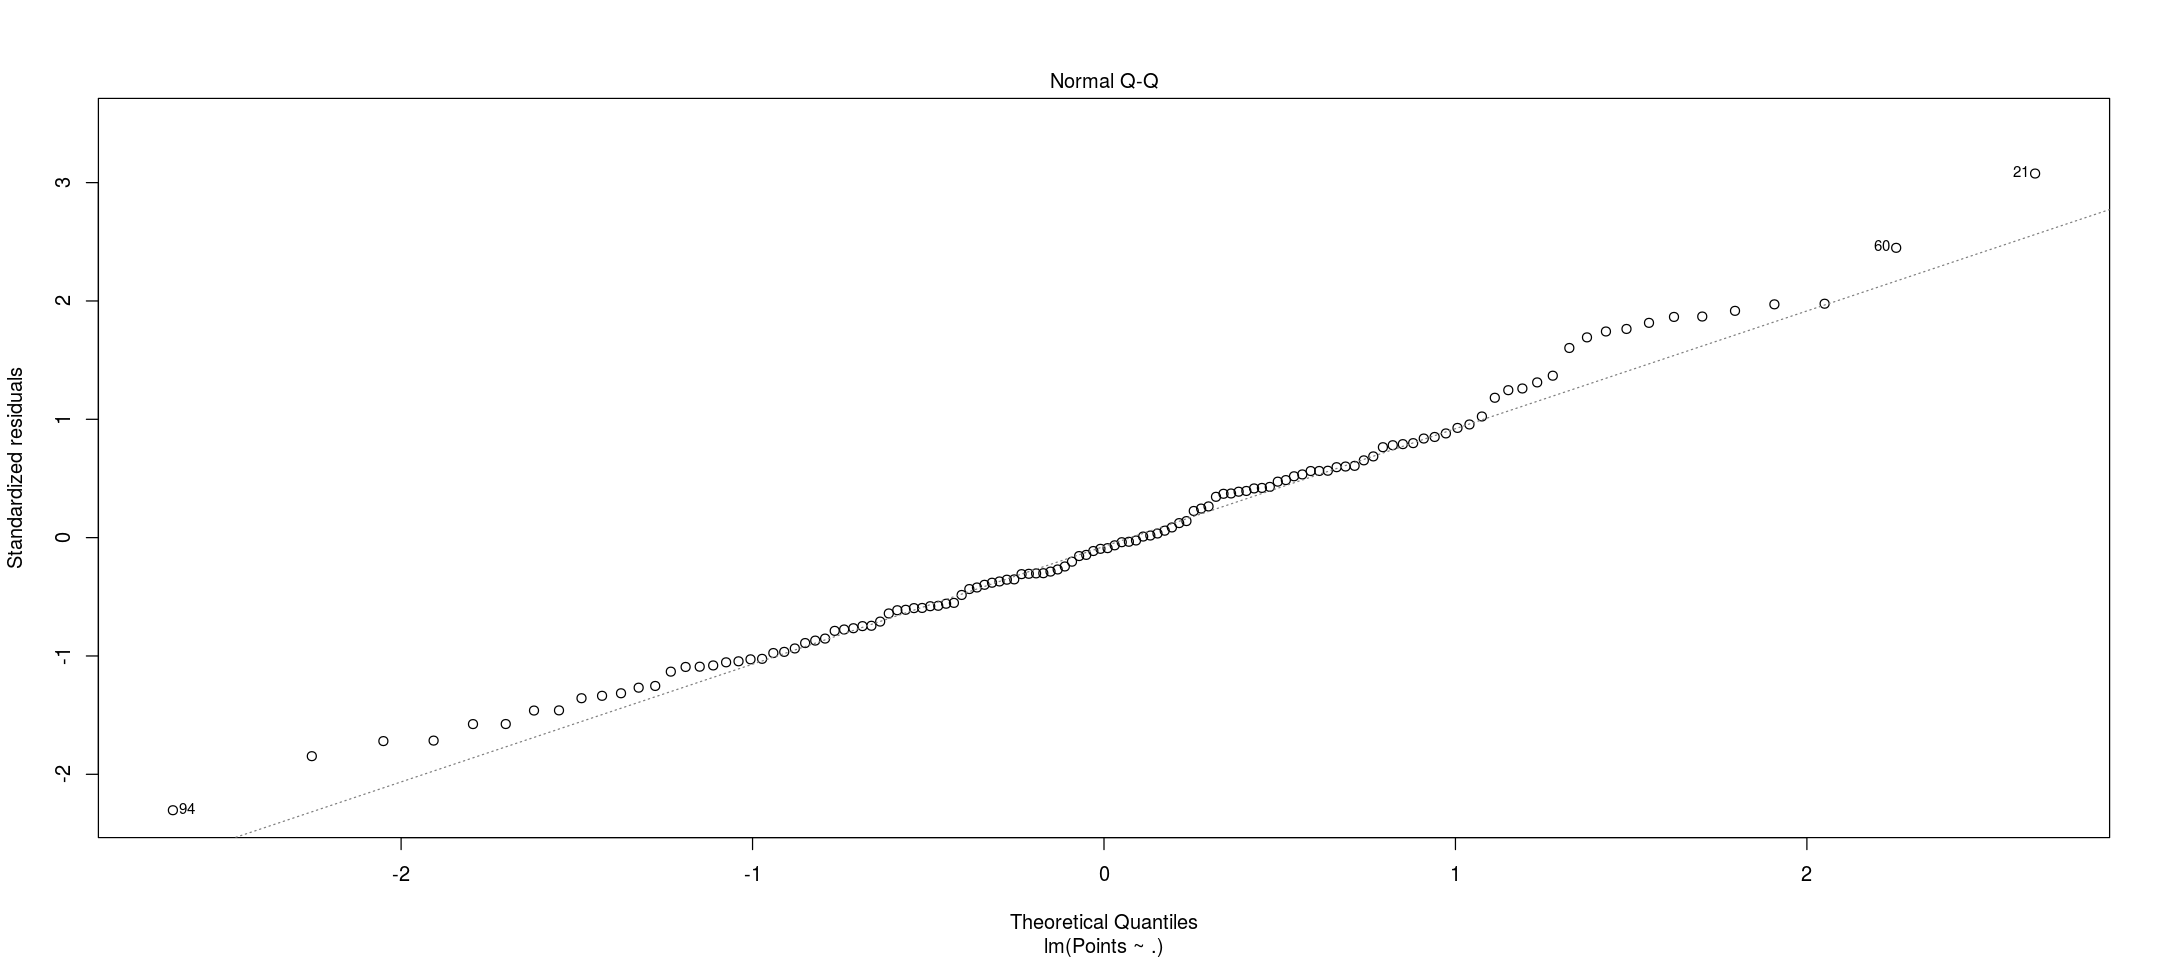

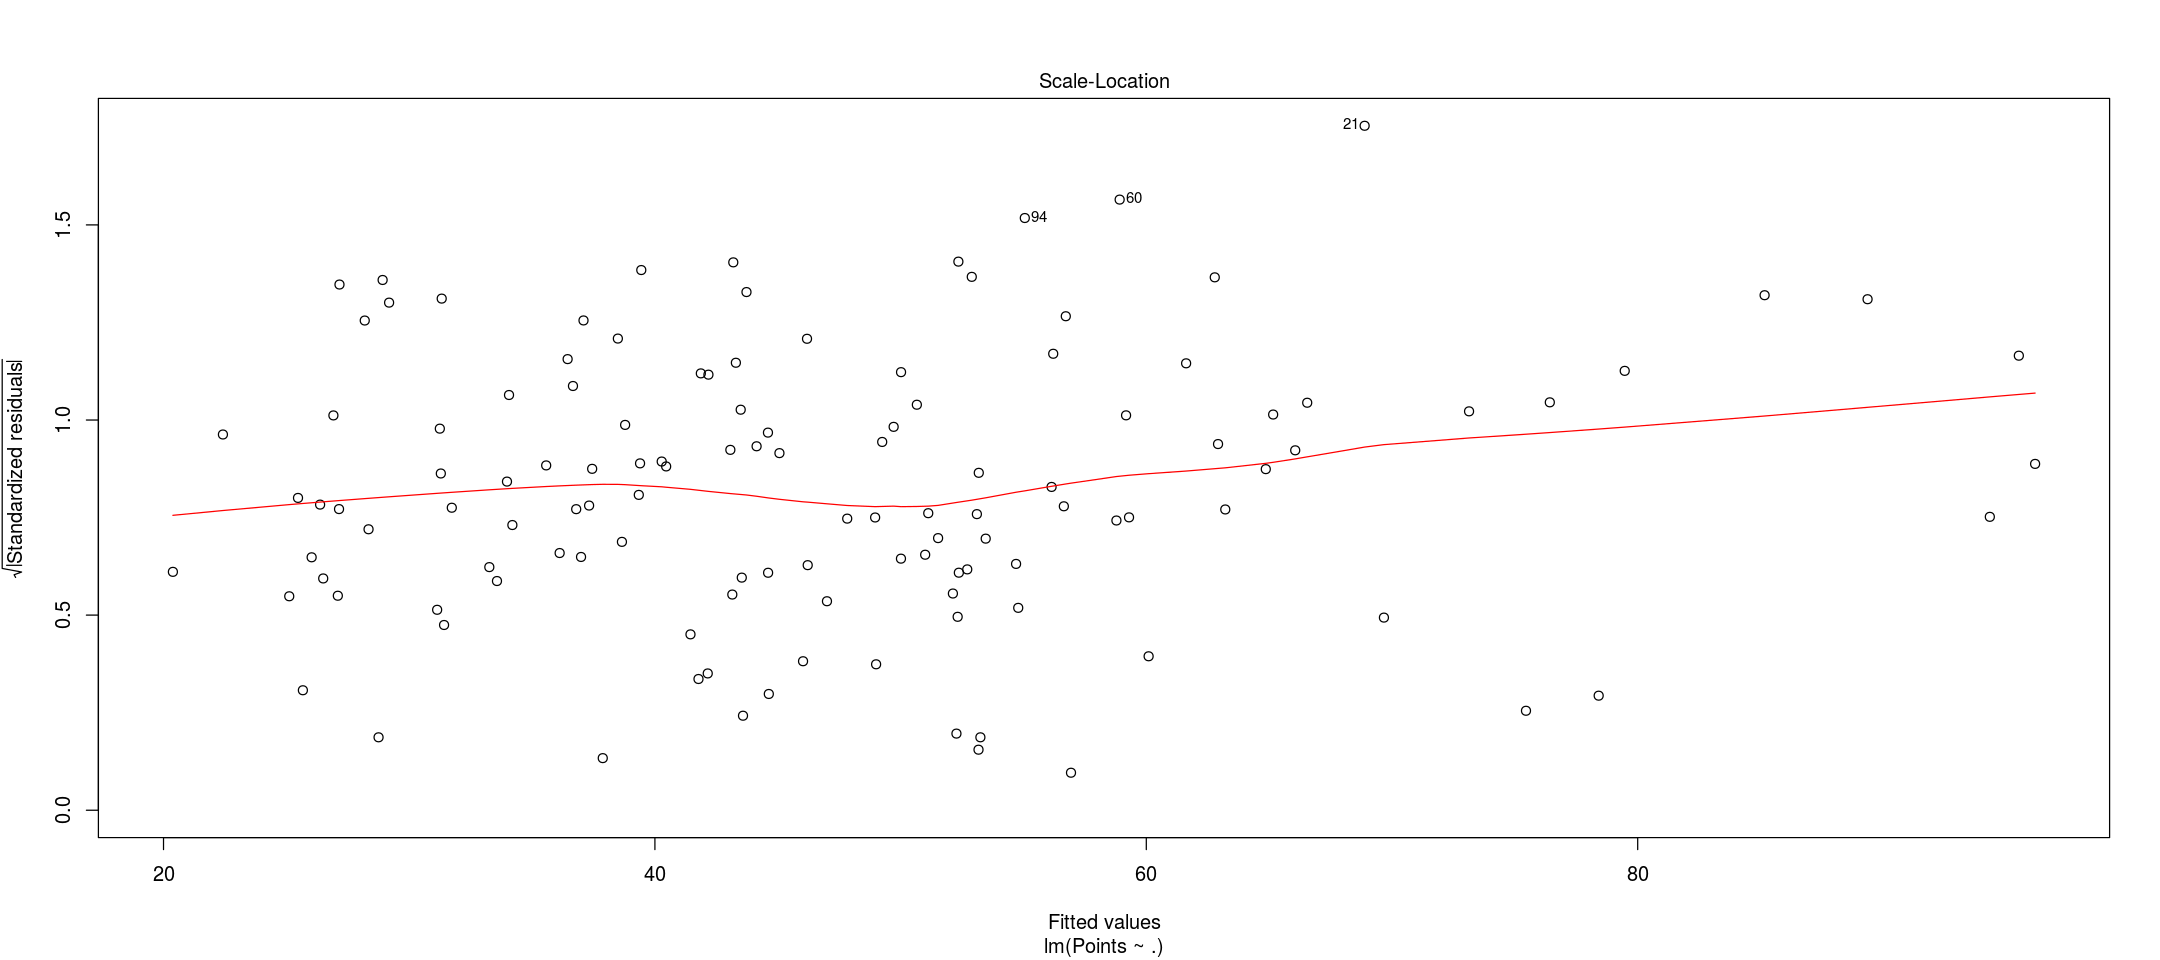

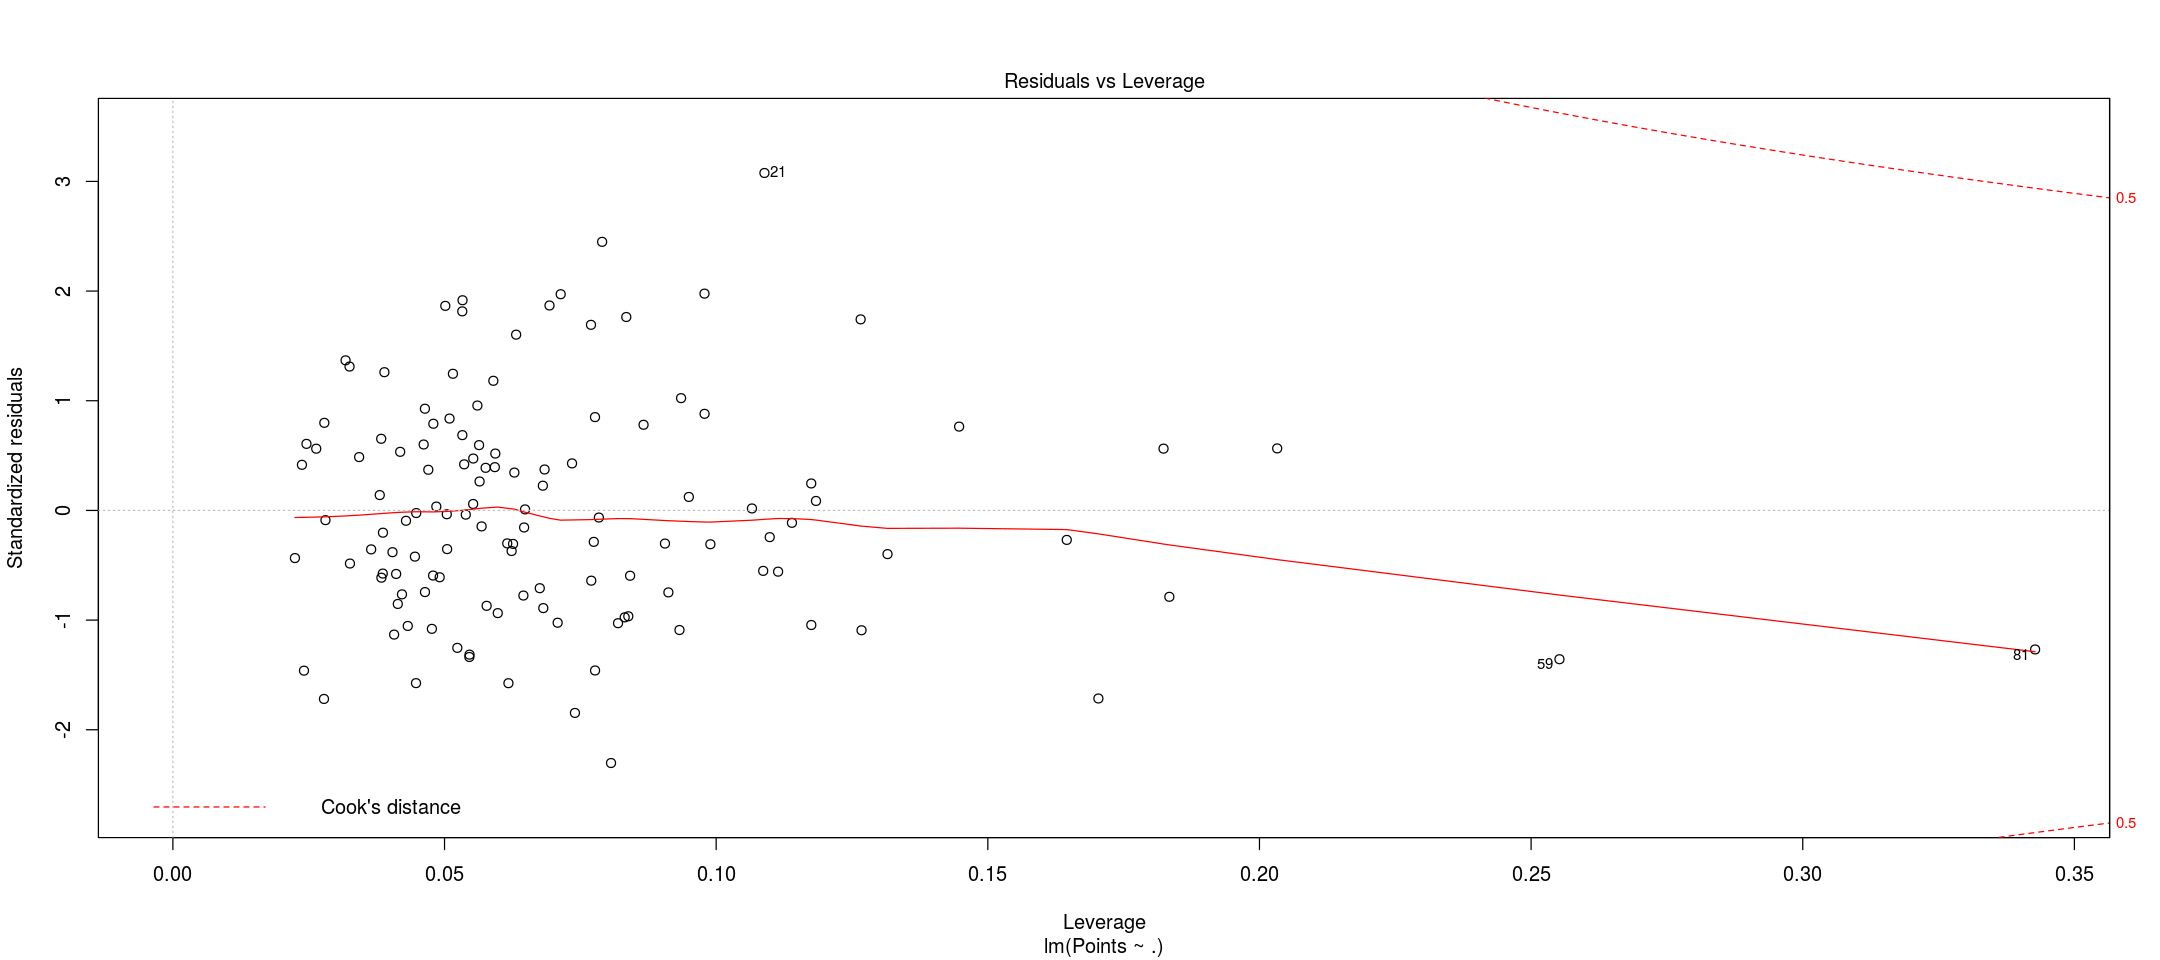

In [68]:
plot(rl_points)

Peut être qu'une autre régression serait à envisager, mais on ne sait pas laquelle.

# REPRÉSENTATION DES RÉSULTATS

In [267]:
df.buts.sans_zeros = df.variables.buts[rowSums(df.variables.buts[,2:6]^2) > 0, ]

In [268]:
mat.variables.buts = data.matrix(df.buts.sans_zeros[,2:6])

In [269]:
rownames(mat.variables.buts) = df.buts.sans_zeros$Noms

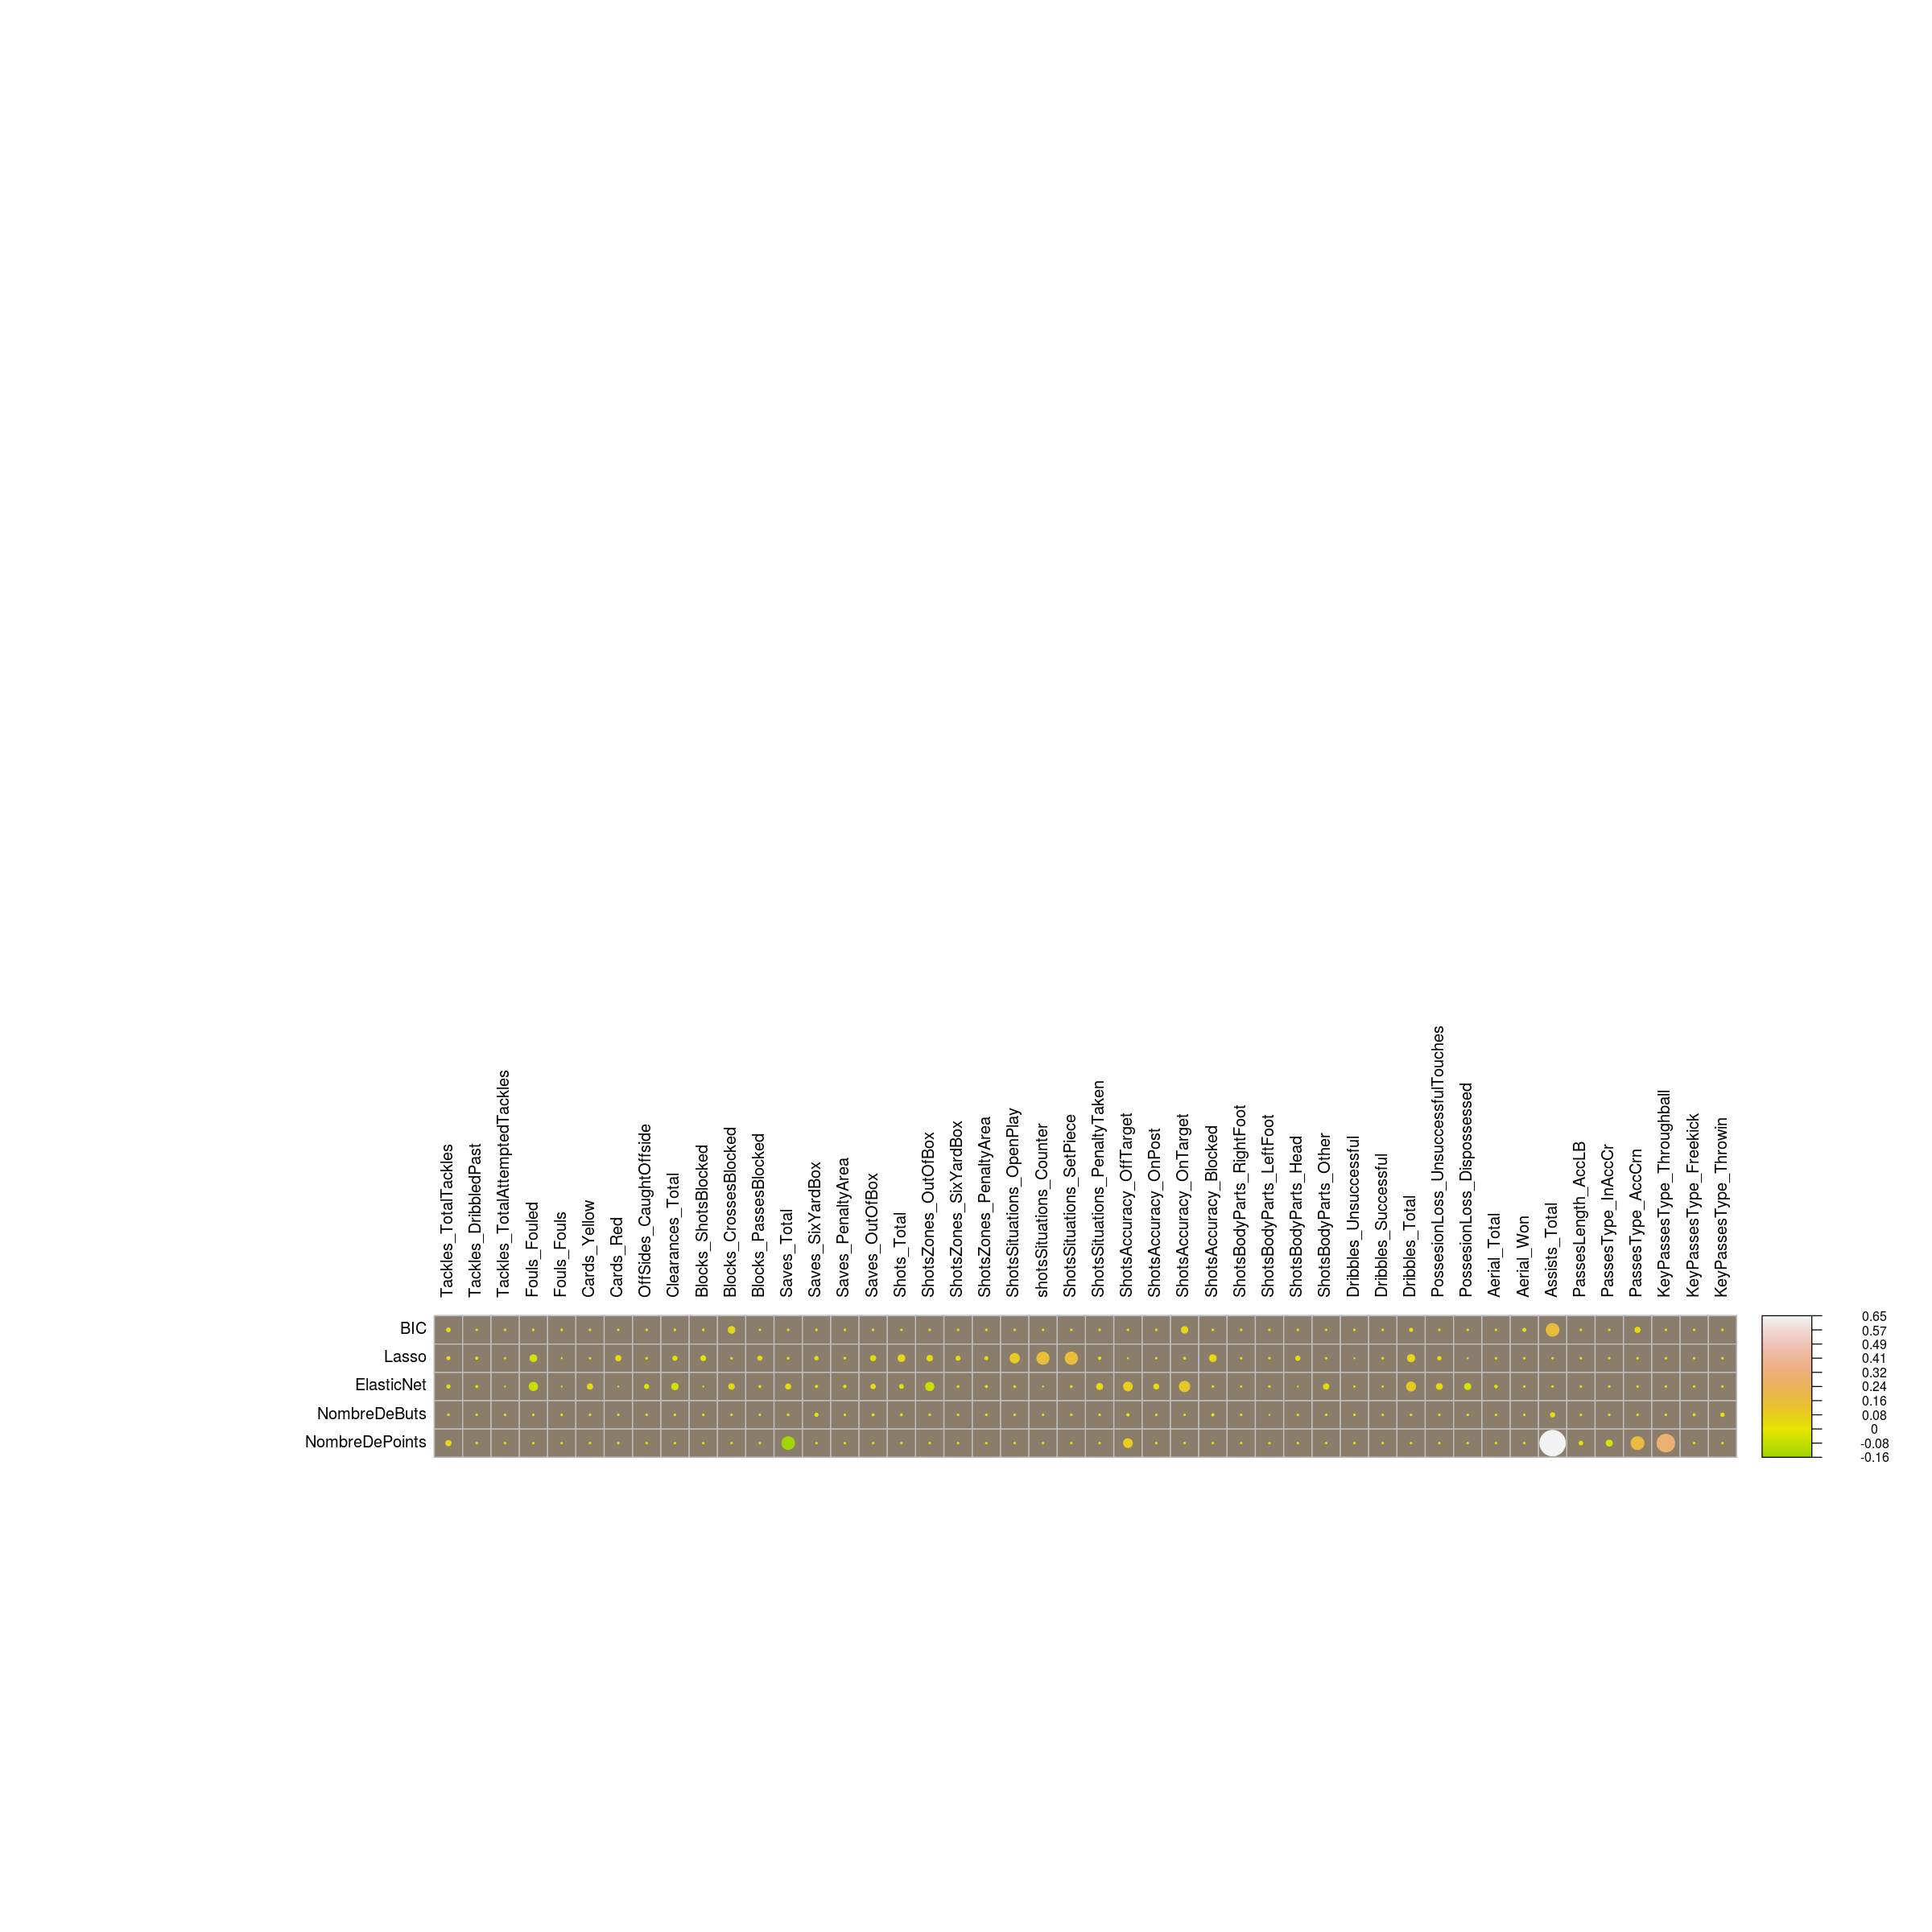

In [316]:
options(repr.plot.width=20, repr.plot.height=20)
corrplot(t(mat.variables.buts), is.corr = FALSE, method = "circle", tl.col = 1, bg = "bisque4", col = terrain.colors(100))#, col = c("blue", "red"))#, col = col1(100))